# <font size="50" color="lightblue"> **Proyecto HELP**</font>

<font size="5" color="white"> Modelado basado en agrupamiento de países para su priorización en el envío de ayuda humanitaria mediante métodos de aprendizaje automático no supervisado: 

**reducción de dimensionalidad (PCA, t-SNE)  + clustering (K-means, DBSCAN, AHC)**.</font>




<font size="4" color="black"> **Luis Felipe Villota Macías (GRUPO 11)**</font>

<font size="4" color="black"> Curso IA Avanzado. IAV3-168 </font>

<font size="4" color="black"> 17 de Mayo - 18 de Octubre , 2024</font>




# Introducción

### **Contexto breve**

“La organización no gubernamental HELP International es una entidad dedicada a contribuir al progreso de países en situaciones de vulnerabilidad socioeconómica y a su alivio en afectaciones causadas por desastres naturales.” (Kokkula, 2020).
“Recientemente, la ONG ha podido recaudar 10 millones [supongo US$] y el CEO quiere utilizarlos de manera estratégica y efectiva. Por lo tanto, se necesita identificar los países que requieran ayuda con más urgencia.” (ibid.).


### **Objeto de consultoría**

Clasificar los países según factores socioeconómicos y de salud para orientar las decisiones del CEO de HELP International sobre a qué países debe dirigirse la ayuda humanitaria con mayor urgencia. Con base en este trabajo, la organización HELP International podrá tomar decisiones estratégicas sobre la distribución de ayuda humanitaria, maximizando el impacto de los recursos disponibles y contribuir a mejorar las condiciones de vida en los países más necesitados.

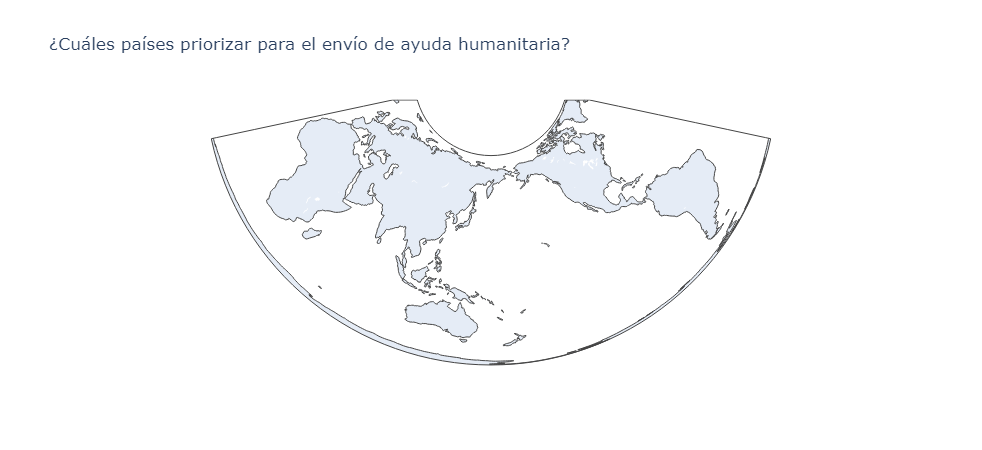

Mapa del mundo con la proyección cónica Albers y paralelas en el hemisferio norte. 

### **Consideraciones sobre el material empírico**

Para el presente ejercicio se utiliza el dataset Unsupervised Learning on Country Data (Dataset for Kmeans Clustering) (2020) publicado por Rohan Kokkula en Kaggle. Este conjunto de datos incluye información relativa a factores socioeconómicos y de salud de diversos países, tales como la mortalidad infantil, los ingresos, el gasto en salud, la inflación, entre otros. Los datos se han utilizado como base para el análisis de agrupamiento y categorización de los países en función de su desarrollo.

Es importante tener en cuenta que las fuentes de este dataset no están verificadas y contiene limitaciones inherentes en cuanto a su actualidad, integralidad y precisión. Por lo tanto, se recomienda hacer una evaluación crítica de los resultados obtenidos y considerar que éste se trata de un ejercicio con datos ficticios – con un propósito únicamente académico – sin perjuicio de la validez metodológica y analítica. En una tarea para toma de decisiones “reales”, la calidad y ética relativa a los datos disponibles deben examinarse, contrastarse y validarse a profundidad y exponerse claramente – entre otras consideraciones.
El conjunto de datos (e información relacionada al caso) se ha utilizado en su forma original.
El dataset está disponible en:
https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data


### **Diccionario de datos (conciso)**

![Captura de pantalla (560).png](<attachment:Captura de pantalla (560).png>)


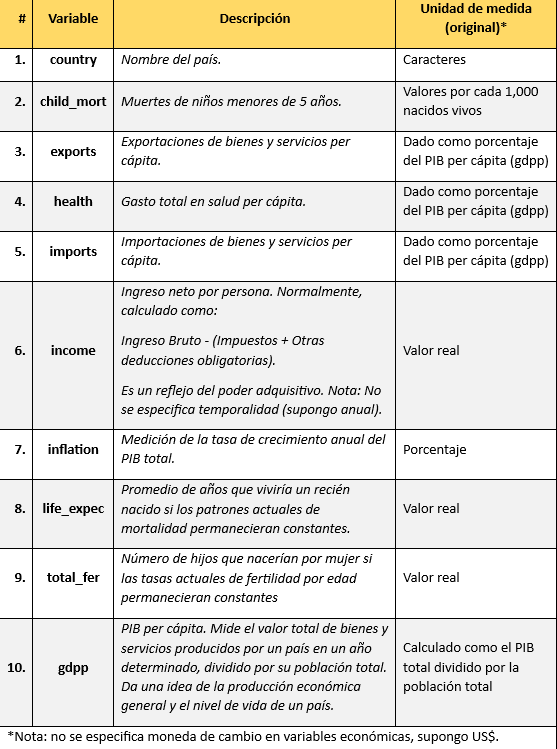

## Carga de librerías y paquetes principales

In [336]:
#
#! from google.colab import files # OJO ACTIVAR EN GOOGLE COLAB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, ward, fcluster
from scipy.stats import pearsonr


# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

## Carga de datos

In [337]:
# 
# * Opción 1:Selección de archivo de datos desde máquina local a Google Colab
# 
# uploaded = files.upload() # seleccionar archivo 'Country-data.csv'

# # Convertir los datos en un Dataframe
# df = pd.read_csv('Country-data.csv')

In [338]:
# 
# * Opción 2: Carga de datos con API de Kaggle
# Hay que ingresar "My Account">"API">"Create New API Token"
# Esto descarga un archivo kaggle.json con "username" y "key"
# files.upload() # se selecciona el archivo kaggle.json

# # Configuración de API
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# # Descargar el dataset desde Kaggle
# !kaggle datasets download -d rohan0301/unsupervised-learning-on-country-data

# # Descomprimir el archivo
# !unzip unsupervised-learning-on-country-data.zip

# # Convertir los datos en un DataFrame
# df = pd.read_csv('Country-data.csv')

In [339]:
#
# * Opción 3 con VS Code
df = pd.read_csv('C:/Users/USER/Desktop/codebaker/all_python/proyecto_curso_AI_avanzado/proyecto_HELP/Country-data.csv')


print(df.head())

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


# Análisis Exploratorio de Datos

En este apartado, analizo el material empírico de manera preliminar. El flujo de trabajo sigue una lógica que intenta asegurar la calidad de los datos en diferentes momentos (iterativos). En este sentido, me baso en la estructura expuesta [aquí](https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4//) por Elgabry (2019) para la "higiene de datos"  y sobre todo en la visión de los epiciclos analíticos presentada en [The Art of Data Science](https://bookdown.org/rdpeng/artofdatascience///) (2017) por Peng y Matsui.

## Dimensiones y características generales

In [340]:
# Dimensiones
dimensiones = df.shape
print(f"La base de datos contiene {dimensiones[0]} observaciones (países) y {dimensiones[1]} columnas o variables.")

# Información general y tipo de datos
df.info()

# Primeras filas del dataset
df.head()

La base de datos contiene 167 observaciones (países) y 10 columnas o variables.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [341]:
# Valores únicos
unique = df.nunique().sort_values()
unique_values = df.apply(lambda x: x.unique())
pd.DataFrame({'Cantidad de valores únicos': unique, 'Valores únicos': unique_values})

Cantidad de valores únicos  \
child_mort                         139   
country                            167   
exports                            147   
gdpp                               157   
health                             147   
imports                            151   
income                             156   
inflation                          156   
life_expec                         127   
total_fer                          138   

                                               Valores únicos  
child_mort  [90.2, 16.6, 27.3, 119.0, 10.3, 14.5, 18.1, 4....  
country     [Afghanistan, Albania, Algeria, Angola, Antigu...  
exports     [10.0, 28.0, 38.4, 62.3, 45.5, 18.9, 20.8, 19....  
gdpp        [553, 4090, 4460, 3530, 12200, 10300, 3220, 51...  
health      [7.58, 6.55, 4.17, 2.85, 6.03, 8.1, 4.4, 8.73,...  
imports     [44.9, 48.6, 31.4, 42.9, 58.9, 16.0, 45.3, 20....  
income      [1610, 9930, 12900, 5900, 19100, 18700, 6700, ...  
inflation   [9.44, 4.49, 16.1, 22.4, 1.44, 20.9, 7.77, 1.1...  
life_expec  [56.2, 76.3, 76.5, 60.1, 76.8, 75.8, 73.3, 82....  
total_fer   [5.82, 1.65, 2.89, 6.16, 2.13, 2.37, 1.69, 1.9...

## Datos faltantes

Datos faltantes por variable:
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


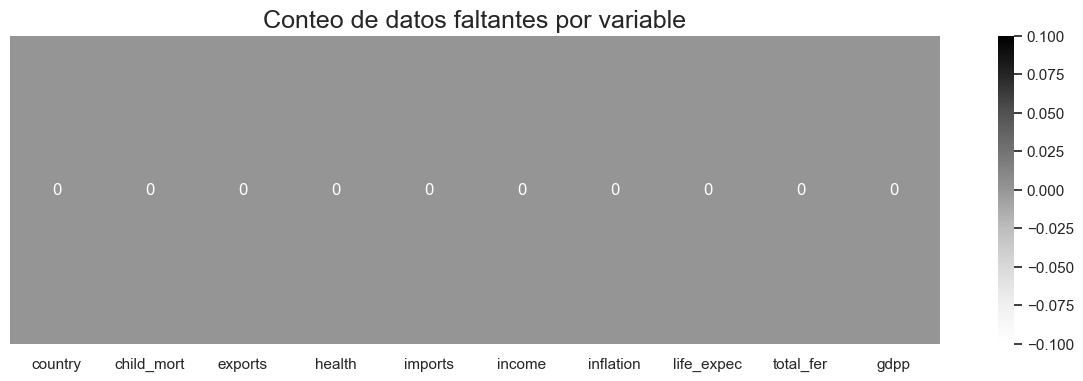

<Axes: >

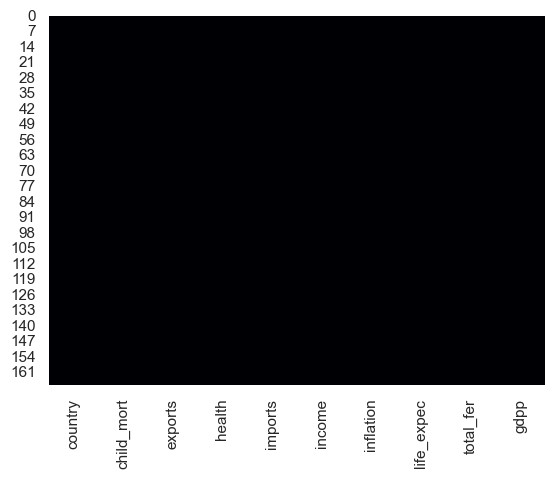

In [342]:
# Chequeo de NAs
missing_values = df.isnull().sum()
print(f"Datos faltantes por variable:\n{missing_values}")

# Visualización
plt.figure(figsize=(15,4))
sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='Greys', annot=True,
             fmt='0.0f').set_title('Conteo de datos faltantes por variable', fontsize=18)
plt.show()

sns.heatmap(df.isnull(),cmap = 'magma',cbar = False)

## Duplicados

In [343]:
# Detección de filas que tienen los mismos valores en todas o en variables seleccionadas.
print('Número de observaciones (filas) duplicadas: ' , len(df[df.duplicated()]))

Número de observaciones (filas) duplicadas:  0


## Estadísticas descriptivas de las variables

In [344]:
# Primer vistazo de estadísticos resumen
df.describe()[1:].T.style.background_gradient(cmap='Blues', axis=1)

In [345]:
# Formato con comas y dos decimales
def format_with_commas(value):
    return f"{value:,.2f}"

# Estilo
styled_df = df.describe()[1:].T.style.background_gradient(cmap='Oranges', axis=1).\
    format(format_with_commas)

# Display 
styled_df

In [346]:
# Ensure 'country' is set as the index
df = df.set_index('country')

# List of the variables of interest
variables = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Create a dictionary to store the results
data = {'min': [], 'min_value': [], 'max': [], 'max_value': []}

# Iterate through each variable to get the min and max countries and their values
for var in variables:
    # Get the country with the minimum value for the variable
    min_country = df[var].idxmin()
    min_value = df[var].min()
    
    # Get the country with the maximum value for the variable
    max_country = df[var].idxmax()
    max_value = df[var].max()
    
    # Append the results to the dictionary
    data['min'].append(min_country)
    data['min_value'].append(min_value)
    data['max'].append(max_country)
    data['max_value'].append(max_value)

# Create a DataFrame from the dictionary, using the variables as the index
min_max_df = pd.DataFrame(data, index=variables)

# Format the DataFrame to display values with commas and two decimal places
styled_min_max_df = min_max_df.style.format({
    'min_value': '{:,.2f}',
    'max_value': '{:,.2f}'
})

# Display the styled DataFrame
styled_min_max_df


## Distribuciones (histogramas de las variables)

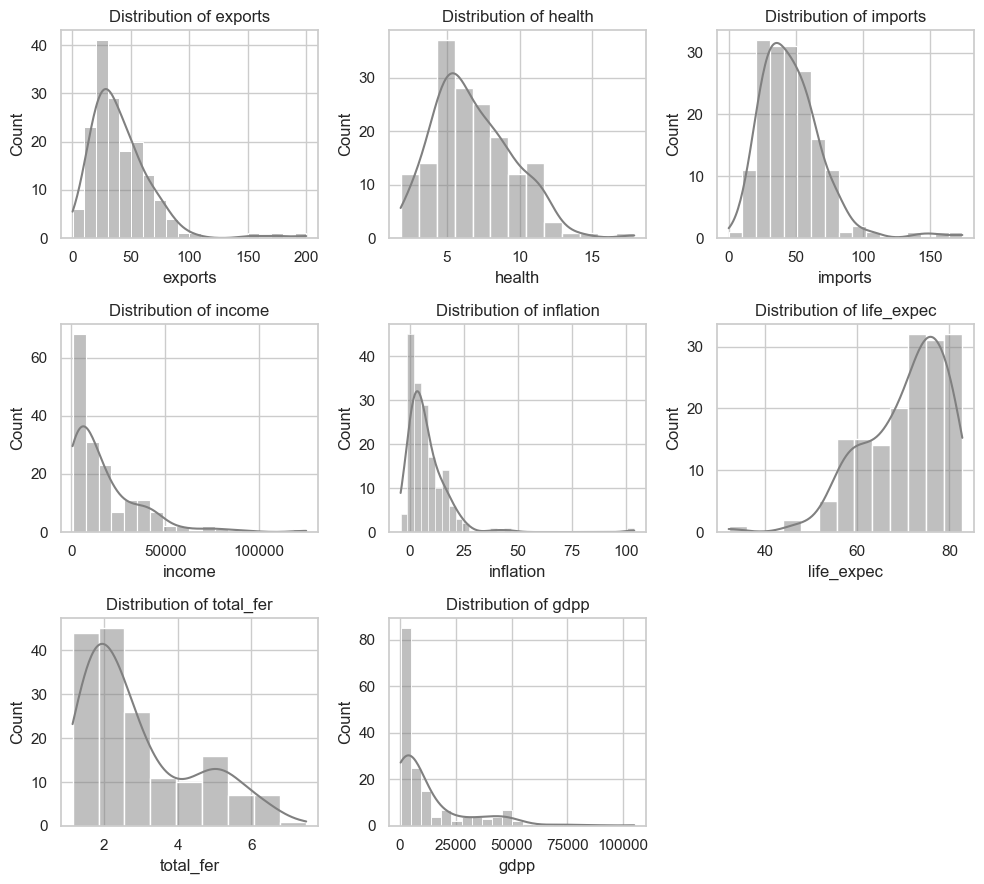

In [347]:
# Configuración de la figura en matplotlib
plt.figure(figsize=(10, 9))

# Histogramas para cada variable
for i, col in enumerate(df.columns[1:], 1):  # sin la variable "Country"
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color='grey', line_kws={'color': 'lightblue'})  # KDE line in red, bars in skyblue
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


## Pandas Profiling Report (inicial)

In [224]:
#
# !pip install ydata-profiling # OJO ACTIVAR EN GOOGLE COLAB

from ydata_profiling import ProfileReport

ProfileReport(df, minimal=True, progress_bar=False, samples=None, correlations=None, interactions=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': '#583101'}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

# Transformaciones

### De porcentajes a valores reales (imports, exports, health)

In [350]:
# De porcentajes a valores absolutos para procesar  interpretar y comparar magnitudes reales: 'imports', 'exports', 'health' están expresadas como porcentajes del 'gdpp' (PIB per cápita de cada país).

# Hacemos una regla de tres con esas variables.

df_transformed = df.copy() # nuevo DataFrame para evitar modificar la raw data
df_transformed['health'] = df_transformed['health'] * df_transformed['gdpp']/100
df_transformed['exports'] = df_transformed['exports'] * df_transformed['gdpp']/100
df_transformed['imports'] = df_transformed['imports'] * df_transformed['gdpp']/100
df_transformed



child_mort  exports    health   imports  income  \
country                                                                
Afghanistan                90.2    55.30   41.9174   248.297    1610   
Albania                    16.6  1145.20  267.8950  1987.740    9930   
Algeria                    27.3  1712.64  185.9820  1400.440   12900   
Angola                    119.0  2199.19  100.6050  1514.370    5900   
Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   
...                         ...      ...       ...       ...     ...   
Vanuatu                    29.2  1384.02  155.9250  1565.190    2950   
Venezuela                  17.1  3847.50  662.8500  2376.000   16500   
Vietnam                    23.3   943.20   89.6040  1050.620    4490   
Yemen                      56.3   393.00   67.8580   450.640    4480   
Zambia                     83.1   540.20   85.9940   451.140    3280   

                     inflation  life_expec  total_fer   gdpp  
country                                                       
Afghanistan               9.44        56.2       5.82    553  
Albania                   4.49        76.3       1.65   4090  
Algeria                  16.10        76.5       2.89   4460  
Angola                   22.40        60.1       6.16   3530  
Antigua and Barbuda       1.44        76.8       2.13  12200  
...                        ...         ...        ...    ...  
Vanuatu                   2.62        63.0       3.50   2970  
Venezuela                45.90        75.4       2.47  13500  
Vietnam                  12.10        73.1       1.95   1310  
Yemen                    23.60        67.5       4.67   1310  
Zambia                   14.00        52.0       5.40   1460  

[167 rows x 9 columns]

### Nueva variable: agrupación de países por continentes

In [226]:
# Estrategia y código tomado de Melissa Monfared (2024) en https://www.kaggle.com/code/melissamonfared/country-clustering-eda-pca?scriptVersionId=178972750&cellId=40

# Extracción de información sobre continentes desde la web
url = "https://statisticstimes.com/geography/countries-by-continents.php"
continent_data = pd.read_html(url, match="Continent")[0]

# Selección de columnas: nombre del país o área y continente respectivo
continent_data = continent_data[["Country or Area", "Continent"]]

# Junte de las bases de datos a través de la variable 'country'
df_joint_1 = pd.merge(df_transformed, continent_data, left_on="country", right_on="Country or Area", how="left")

# Verificación de países sin continente asignado
unmatched_countries = df_joint_1[df_joint_1['Continent'].isna()]['country']

# Nombre de países sin match
print("Países sin continente asignado:")
print(len(df_joint_1[df_joint_1['Continent'].isna()]['country']))
print(unmatched_countries)

Países sin continente asignado:
22
19                            Bolivia
23                             Brunei
30                         Cape Verde
37                   Congo, Dem. Rep.
38                        Congo, Rep.
40                      Cote d'Ivoire
43                     Czech Republic
71                               Iran
83                    Kyrgyz Republic
84                                Lao
92                     Macedonia, FYR
101             Micronesia, Fed. Sts.
102                           Moldova
125                            Russia
134                   Slovak Republic
138                       South Korea
141    St. Vincent and the Grenadines
147                          Tanzania
158                    United Kingdom
159                     United States
163                         Venezuela
164                           Vietnam
Name: country, dtype: object


In [227]:
# Solución: completar manualmente

# DataFrame coyuntural indexado por país para completar las asignaciones
continent_fill = pd.DataFrame(
    {
        "Bolivia": "South America",
        "Brunei": "Asia",
        "Ivory Coast": "Africa",
        "Cape Verde": "Oceania",
        "Congo, Dem. Rep.": "Africa",
        "Congo, Rep.": "Africa",
        "Czech Republic": "Europe",
        "Kyrgyz Republic": "Asia",
        "Iran": "Asia",
        "Lao": "Asia",
        "Macedonia, FYR": "Europe",
        "Micronesia, Fed. Sts.": "Oceania",
        "Moldova": "Europe",
        "Russia": "Europe",
        "South Korea": "Asia",
        "St. Vincent and the Grenadines": "North America",
        "United Kingdom": "Europe",
        "United States": "North America",
        "Venezuela": "South America",
        "Vietnam": "Asia",
        "Cote d'Ivoire": "Africa",
        "Slovak Republic": "Europe",
        "Tanzania": "Africa"
    },
    index=["country"]
)

# Arreglo de columnas a filas y se agrega nombre a la columna de continente
continent_fill = continent_fill.melt(var_name="country", value_name="Compleción manual")

In [228]:
# Nuevo junte de las bases
df_joint_2 = pd.merge(df_joint_1, continent_fill, on="country", how='left')
# Relleno de valores faltantes
df_joint_2["Continent"] = df_joint_2["Continent"].fillna(df_joint_2["Compleción manual"])
# Elimanción de columnas incidentales ahora
df_clean = df_joint_2.drop(columns=["Compleción manual", "Country or Area"])
# Conteo de países agrupados en continente
print(df_clean["Continent"].value_counts(dropna=False))
# Suma del conteo
counts_df_clean = df_clean["Continent"].value_counts(dropna=False)
counts_df_clean.sum()

Continent
Africa           46
Asia             45
Europe           39
North America    15
South America    12
Oceania          10
Name: count, dtype: int64


167

Obviamente, vemos que no están todos los países del mundo. Además, la clasificación no es precisa (p. ej. América es un solo continente y se divide en dos aquí, pero en los demás continentes no se hace algo así). Hubiera sido mejor una clasificación consistente e intermedia entre regiones y continentes (p. ej. para tener mejor análisis de asimetrías...economías de territorios remotos... las islas...en el Caribe, etc).

# Asociaciones

### Matriz de correlaciones

In [229]:
df_clean

country  child_mort  exports    health   imports  income  \
0            Afghanistan        90.2    55.30   41.9174   248.297    1610   
1                Albania        16.6  1145.20  267.8950  1987.740    9930   
2                Algeria        27.3  1712.64  185.9820  1400.440   12900   
3                 Angola       119.0  2199.19  100.6050  1514.370    5900   
4    Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   
..                   ...         ...      ...       ...       ...     ...   
162              Vanuatu        29.2  1384.02  155.9250  1565.190    2950   
163            Venezuela        17.1  3847.50  662.8500  2376.000   16500   
164              Vietnam        23.3   943.20   89.6040  1050.620    4490   
165                Yemen        56.3   393.00   67.8580   450.640    4480   
166               Zambia        83.1   540.20   85.9940   451.140    3280   

     inflation  life_expec  total_fer   gdpp      Continent  
0         9.44        56.2       5.82    553           Asia  
1         4.49        76.3       1.65   4090         Europe  
2        16.10        76.5       2.89   4460         Africa  
3        22.40        60.1       6.16   3530         Africa  
4         1.44        76.8       2.13  12200  North America  
..         ...         ...        ...    ...            ...  
162       2.62        63.0       3.50   2970        Oceania  
163      45.90        75.4       2.47  13500  South America  
164      12.10        73.1       1.95   1310           Asia  
165      23.60        67.5       4.67   1310           Asia  
166      14.00        52.0       5.40   1460         Africa  

[167 rows x 11 columns]

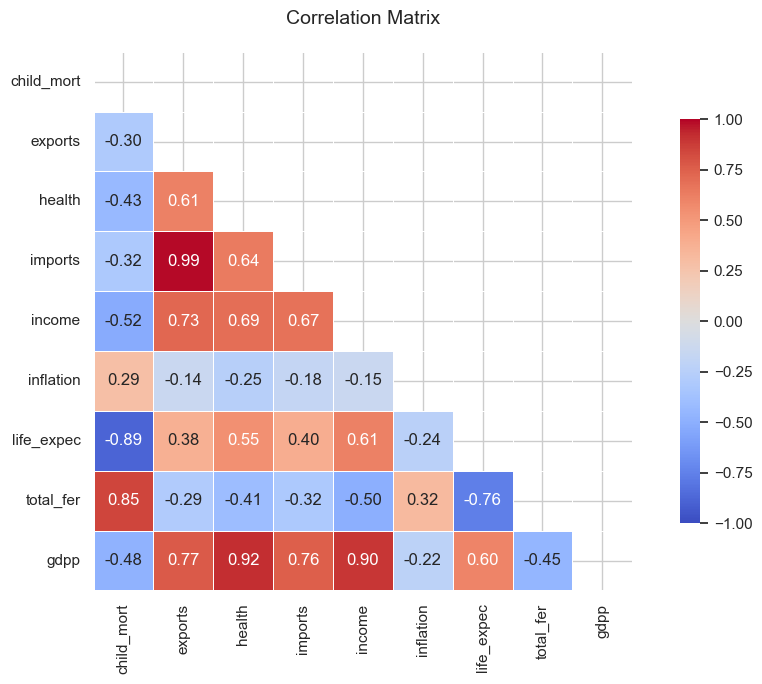

In [230]:
# Sólo variables numéricas
corr_matrix = df_clean.corr(numeric_only=True)

# Mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 7))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, square=True, cbar_kws={"shrink": 0.75}, vmin=-1, vmax=1)

# Add title
plt.title('Correlation Matrix', fontsize=14, pad=20)

# Show plot
plt.tight_layout()
plt.show()


### Tabla de correlaciones

In [231]:
# Unstack the correlation matrix and reset the index to create a DataFrame
corr_pairs = corr_matrix.unstack().reset_index()

# Rename the columns for clarity
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Remove self-correlations (where Variable 1 equals Variable 2)
corr_pairs = corr_pairs[corr_pairs['Variable 1'] != corr_pairs['Variable 2']]

# Drop duplicate pairs (e.g., 'A vs B' and 'B vs A')
corr_pairs['Abs Correlation'] = corr_pairs['Correlation'].abs()  # Work with absolute values for sorting
corr_pairs = corr_pairs.drop_duplicates(subset=['Abs Correlation'])

# Sort the pairs by correlation in descending order
sorted_corr_pairs = corr_pairs.sort_values(by='Correlation', ascending=False).drop(columns='Abs Correlation')

# Display the sorted correlation pairs
print(sorted_corr_pairs)

    Variable 1  Variable 2  Correlation
12     exports     imports     0.987686
26      health        gdpp     0.916593
44      income        gdpp     0.895571
7   child_mort   total_fer     0.848478
17     exports        gdpp     0.768894
35     imports        gdpp     0.755114
13     exports      income     0.725351
22      health      income     0.690857
31     imports      income     0.672056
21      health     imports     0.638581
11     exports      health     0.612919
42      income  life_expec     0.611962
62  life_expec        gdpp     0.600089
24      health  life_expec     0.545626
33     imports  life_expec     0.397515
15     exports  life_expec     0.377694
52   inflation   total_fer     0.316921
5   child_mort   inflation     0.288276
14     exports   inflation    -0.141553
41      income   inflation    -0.147756
32     imports   inflation    -0.179458
53   inflation        gdpp    -0.221631
51   inflation  life_expec    -0.239705
23      health   inflation    -0.253956


### Visualizaciones (parejas de variables)



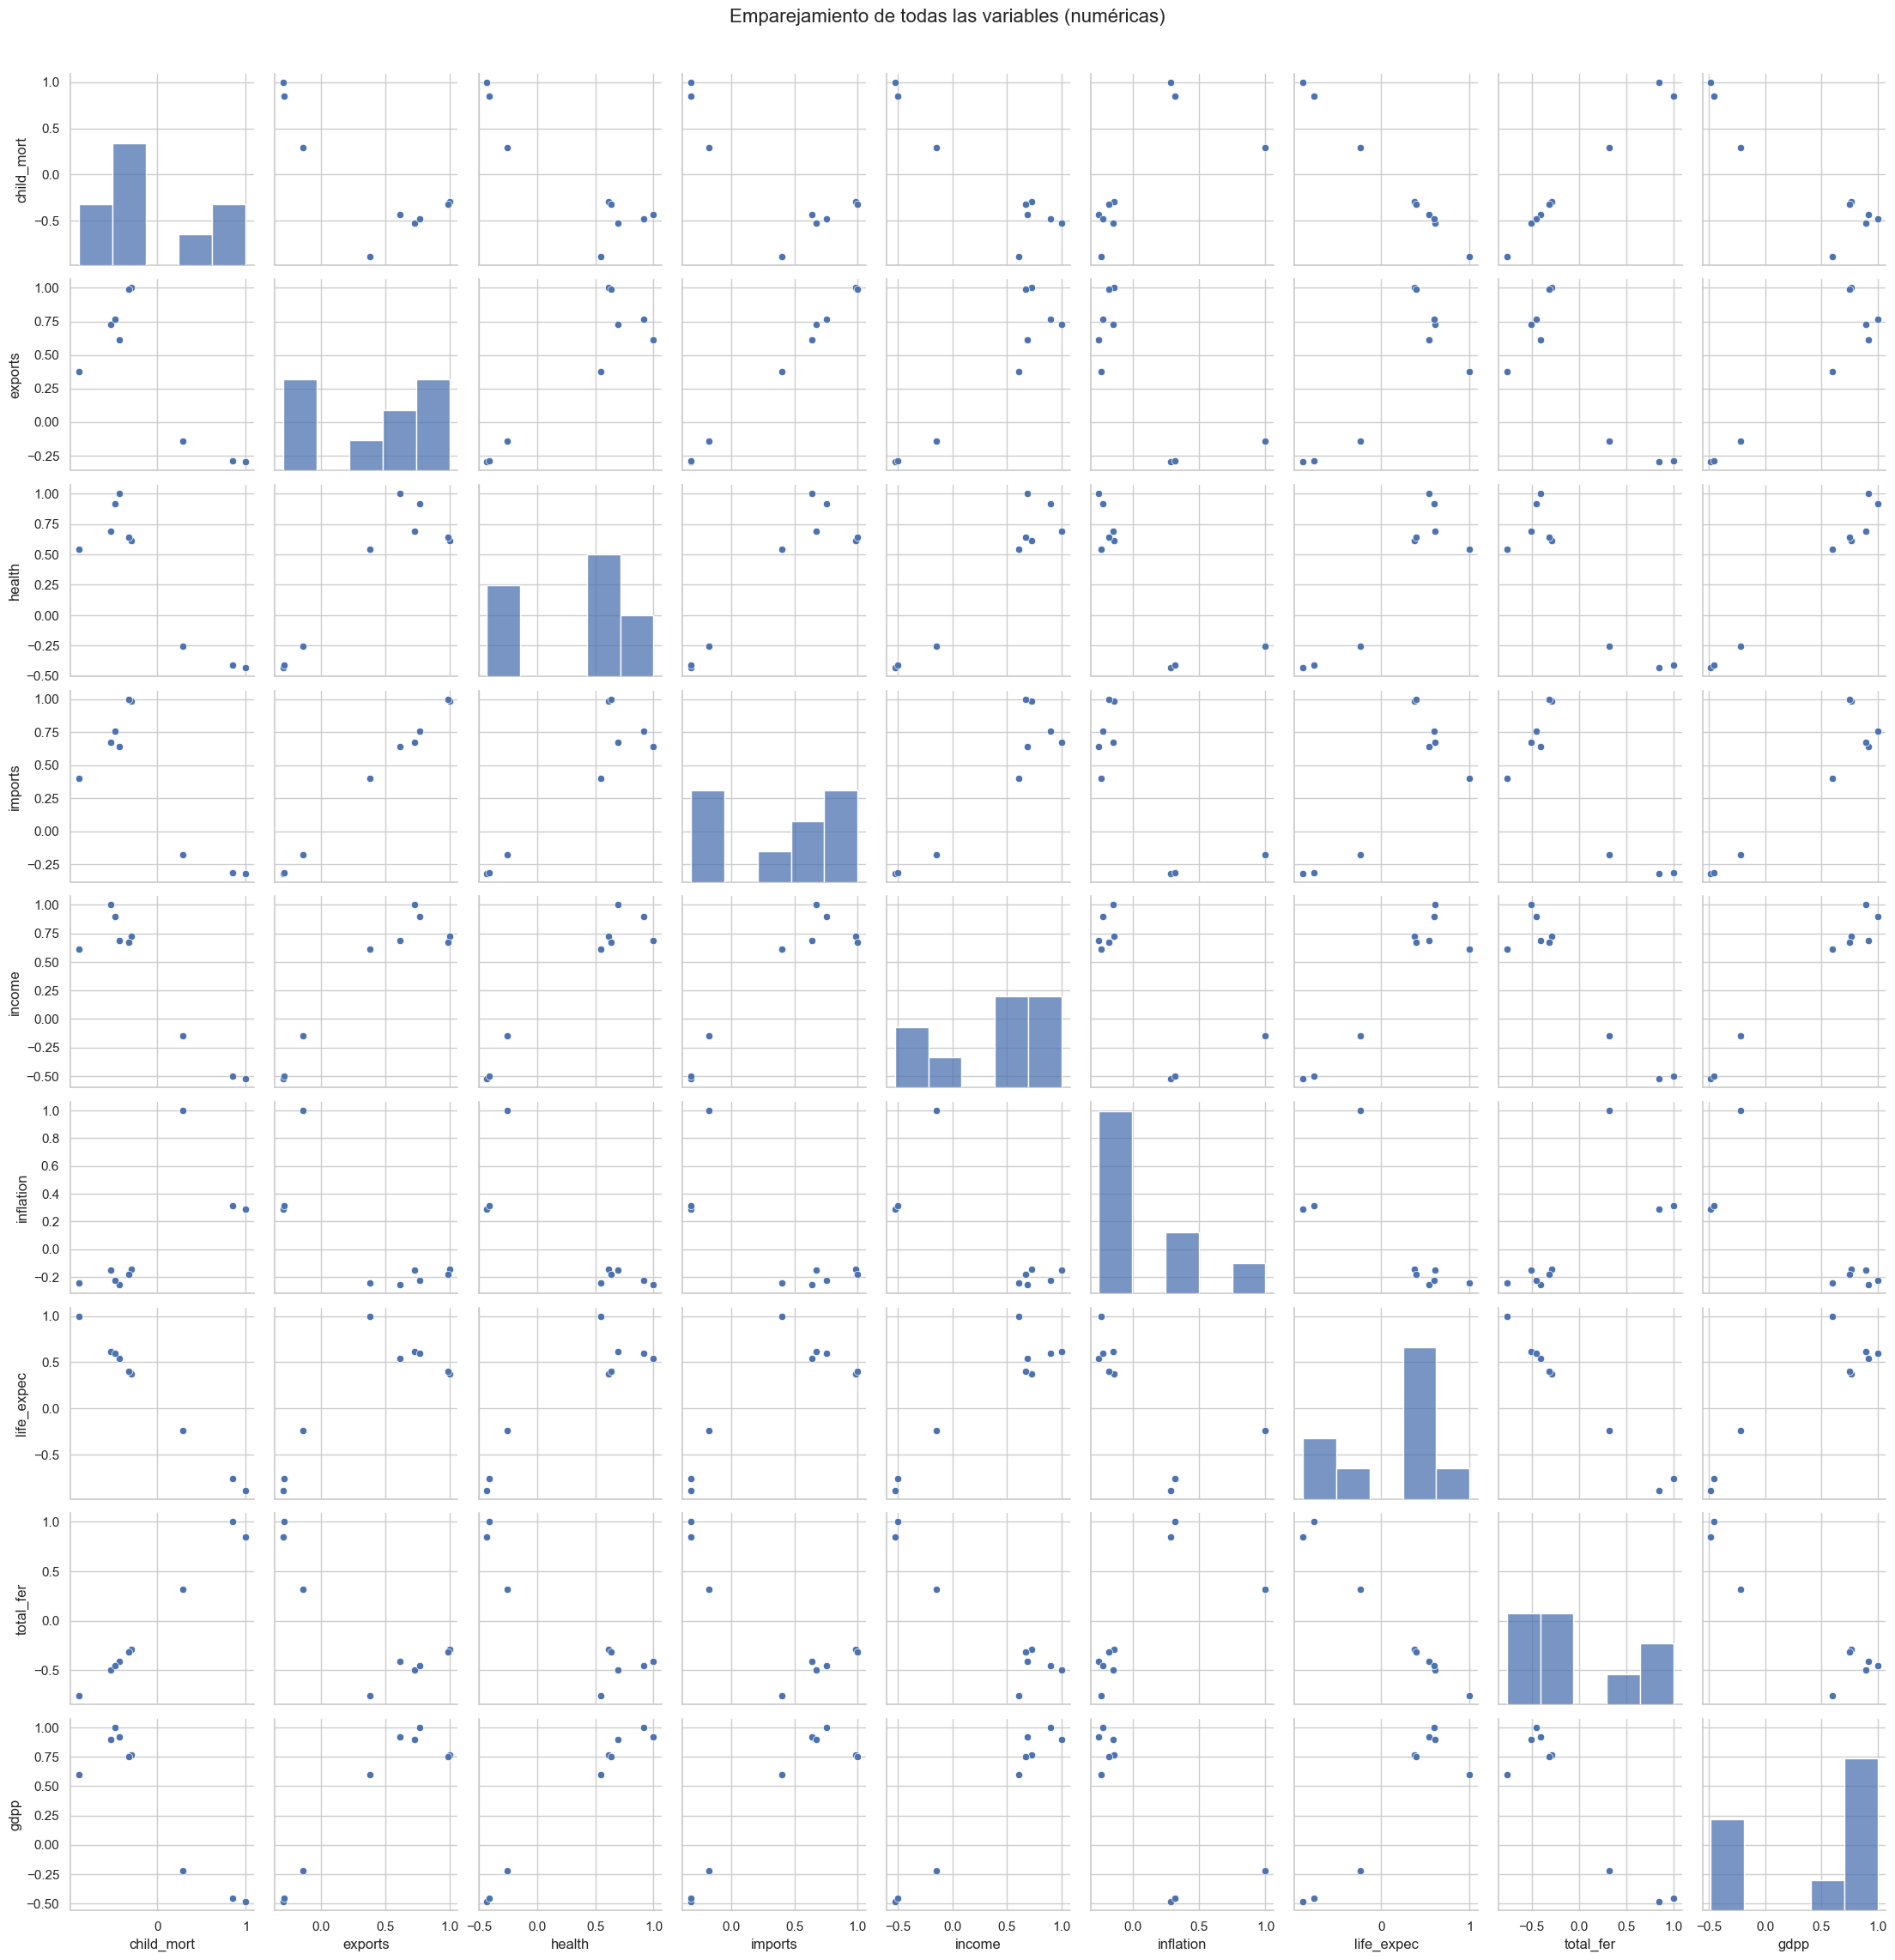

In [232]:
# Todas las variables numéricas

sns.pairplot(corr_matrix)
plt.suptitle('Emparejamiento de todas las variables (numéricas)', y=1.02, fontsize=16)
plt.show()

### Consideraciones  

*   `imports` y `exports` están extremamente
correlacionadas. Una posible explicación es que los países que tienen economías abiertas y orientadas al comercio tienden a importar y exportar en grandes volúmenes, lo que genera una relación directa entre estas dos variables (y promueve una interdependencia).

* `gdpp` tiene una correlación significativa con la `health` y `income`. Los países más ricos tienden a invertir más en salud y tener mejores sistemas. Y, el `gdpp` es una función directa del `income` de la gente.

* ` child_mort` se correlaciona significativamente con `life_expec` (negativamente, la esperanza se vida se alarga cuando menos niños han muerto) y `total_fer` (positivamente, entre más niños nacen pues más pueden morir).

* Si los factores económicos `income`, `gdpp`, `exports` decrecen e `inflation` sube, eso impacta negativamente a `life_expec` y `child_mort`.

* Por el contrario, entre más `health` hay más `life_expec` y menos `child_mort`.

* Una relación interesante es la que existe entre `life_expec` y `income`, están asociadas positivamente de una manera moderada.

* `inflation` tiene las correlaciones más bajas con otras variables.

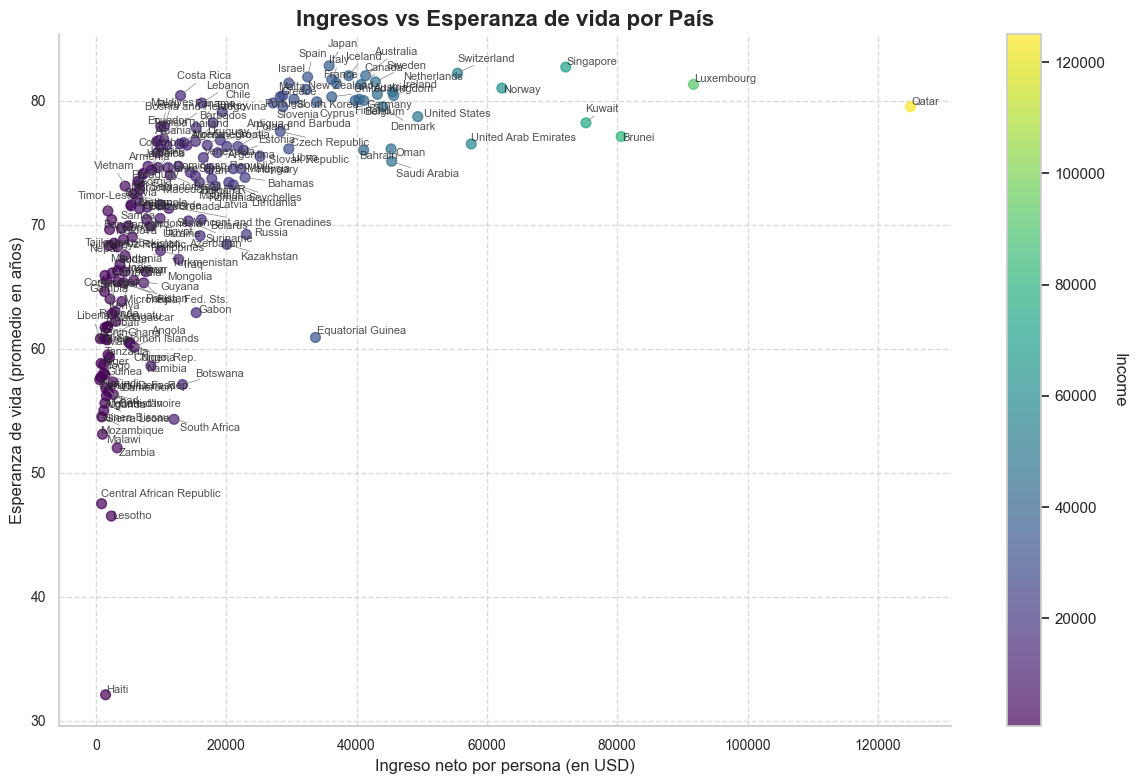

In [233]:
# @title life_expec vs income
#! %%time # OJO ACTIVAR EN GOOGLE COLAB
# !pip install adjustText # OJO ACTIVAR EN GOOGLE COLAB
from adjustText import adjust_text

# Estilo seaborn
plt.style.use('seaborn-v0_8-deep') # Cambió por VS Code

# Configurar figura
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot para 'income' vs 'life_expec'
scatter = ax.scatter(df_clean['income'], df_clean['life_expec'], s=50, alpha=0.7, c=df['income'], cmap='viridis')

# Cada punto con el nombre del país
texts = []
for i, row in df.iterrows():
    texts.append(ax.text(row['income'], row['life_expec'], row['country'], fontsize=8, alpha=0.8))

# Ajuste de texto debido al elevado número de observaciones
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

# Configuración de márgenes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Rótulos y títulos
ax.set_xlabel('Ingreso neto por persona (en USD)', fontsize=12)
ax.set_ylabel('Esperanza de vida (promedio en años)', fontsize=12)
ax.set_title('Ingresos vs Esperanza de vida por País', fontsize=16, fontweight='bold')

# Colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Income', rotation=270, labelpad=15)

# Rótulos (configuraciónes avanzadas)
ax.tick_params(axis='both', which='major', labelsize=10)

# Grid
ax.grid(True, linestyle='--', alpha=0.7)

# Ajuste de display
plt.tight_layout()
plt.show()

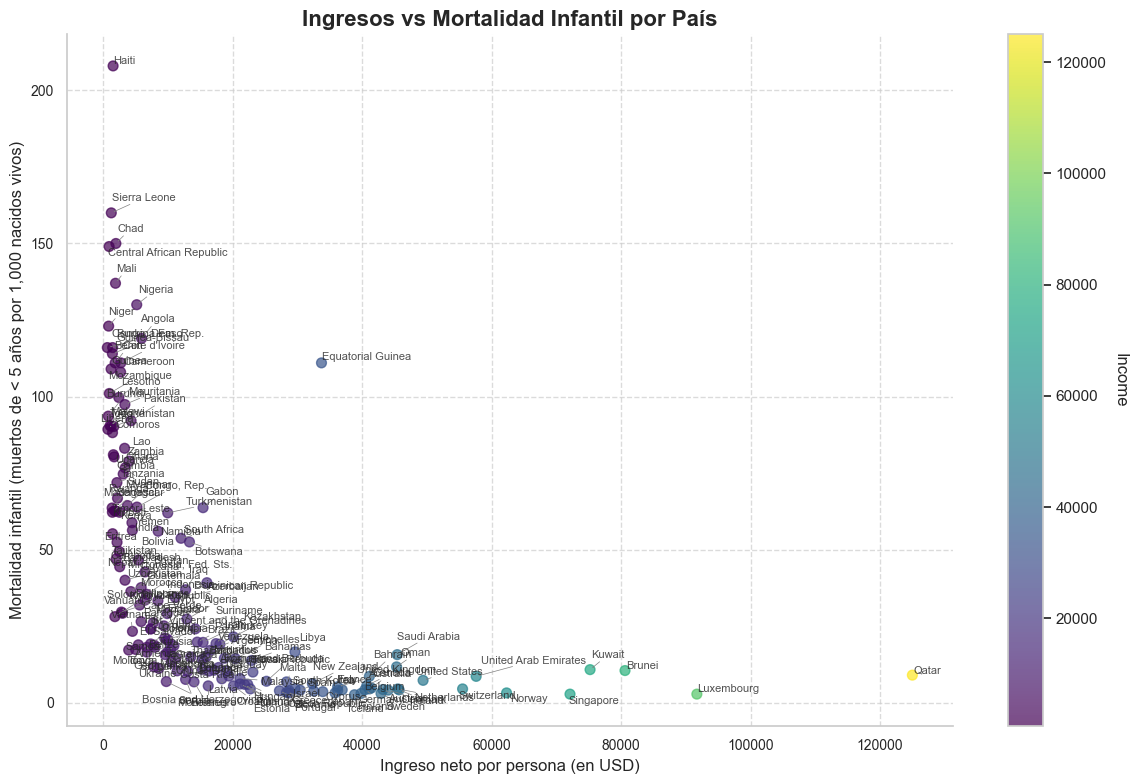

In [234]:
# @title child_mort vs income

#! %%time OJO ACTIVAR EN GOOGLE COLAB

# Estilo seaborn
plt.style.use('seaborn-v0_8-deep') # Cambió por VS Code

# Configurar figura
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot para 'income' vs 'child_mort'
scatter = ax.scatter(df_clean['income'], df_clean['child_mort'], s=50, alpha=0.7, c=df['income'], cmap='viridis')

# Cada punto con el nombre del país
texts = []
for i, row in df.iterrows():
    texts.append(ax.text(row['income'], row['child_mort'], row['country'], fontsize=8, alpha=0.8))

# Ajuste de texto debido al elevado número de observaciones
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

# Configuración de márgenes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Rótulos y títulos
ax.set_xlabel('Ingreso neto por persona (en USD)', fontsize=12)
ax.set_ylabel('Mortalidad infantil (muertos de < 5 años por 1,000 nacidos vivos)', fontsize=12)
ax.set_title('Ingresos vs Mortalidad Infantil por País', fontsize=16, fontweight='bold')

# Colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Income', rotation=270, labelpad=15)

# Rótulos (configuraciónes avanzadas)
ax.tick_params(axis='both', which='major', labelsize=10)

# Grid
ax.grid(True, linestyle='--', alpha=0.7)

# Ajuste de display
plt.tight_layout()
plt.show()


### Outliers

In [352]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Definición de columnas y filas
num_cols = 3
num_rows = -(-len(df_clean.columns[1:-1]) // num_cols)  # Número de filas necesarias

# Crear subgráfica con espacio para las variables
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=df_clean.columns[1:-1])

# Añadir cada boxplot a la subgráfica correspondiente
for i, col in enumerate(df_clean.columns[1:-1], 1):  # Empezar en 1 para filas/columnas
    row = (i - 1) // num_cols + 1
    col_num = (i - 1) % num_cols + 1
    fig.add_trace(
        go.Box(y=df_clean[col], name=col, text=df_clean['country'], hoverinfo='text+y'),
        row=row, col=col_num
    )

# Diseño y ajustar el tamaño de la figura
fig.update_layout(
    height=800 * num_rows,  # altura en función de las filas
    width=1200,  # ancho total
    title_text="Interactive Boxplots for Each Variable",
    showlegend=False
)

# Mostrar
fig.show()

### Visualizaciones varias

In [236]:

# !pip install -U kaleido OJO ACTIVAR EN GOOGLE COLAB
import kaleido
import plotly.express as px
for i in df_clean.drop('country', axis=1).columns:
    fig = px.choropleth(df_clean, locationmode='country names', locations='country',projection='kavrayskiy7',
                         title=i+' Per Country',color=i,color_continuous_scale="Teal")
    fig.update_geos(fitbounds="locations", visible=True)
    fig.show(engine='kaleido')

In [237]:
fig = px.box(df_clean, x='Continent', y='income',
             title='Distribución de ingreso neto por persona por Continente',
             labels={'Continent': 'Continent', 'income': 'income'},
             color='Continent',points="all",
             height=400,template='plotly_white')
fig.update_layout(xaxis_title='Continent', yaxis_title='income')
fig.show()

In [238]:
fig = px.box(df_clean, x='Continent', y='life_expec',
             title='Distribución de esperanza de vida por Continente',
             labels={'Continent': 'Continent', 'life_expec': 'life_expec'},
             color='Continent',points="all",
             height=400,template='plotly_white')
fig.update_layout(xaxis_title='Continent', yaxis_title='life_expec')
fig.show()

In [239]:
fig = px.box(df_clean, x='Continent', y='inflation',
             title='Distribución de inflación por Continente',
             labels={'Continent': 'Continent', 'inflation': 'inflation'},
             color='Continent',points="all",
             height=400,template='plotly_white')
fig.update_layout(xaxis_title='Continent', yaxis_title='inflation')
fig.show()

In [240]:
fig = px.box(df_clean, x='Continent', y='child_mort',
             title='Distribución de mortalidad infantil por Continente',
             labels={'Continent': 'Continent', 'child_mort': 'child_mort'},
             color='Continent',points="all",
             height=400,template='plotly_white')
fig.update_layout(xaxis_title='Continent', yaxis_title='child_mort')
fig.show()

In [241]:
fig = px.box(df_clean, x='Continent', y='exports',
             title='Distribución de exportaciones por Continente',
             labels={'Continent': 'Continent', 'exports': 'exports'},
             color='Continent',points="all",
             height=400,template='plotly_white')
fig.update_layout(xaxis_title='Continent', yaxis_title='exports')
fig.show()

In [242]:
fig = px.scatter_3d(df_clean, x='income', y='health', z='life_expec', color='Continent', opacity=0.7,template = 'plotly_white')
fig.update_traces(marker=dict(size=5))
fig.show()

Al parecer un combinación de altos ingresos netos por persona y un mayor gasto en salud, tiende a alargar la esperanza de vida (trayectoria general). Interesantemente, algunos países asiáticos parece que tuvieran otro camino (alta esperanza de vida a medida que hay más ingresos pero con bajos gastos en salud). 

## Pandas Profiling Report (final)

In [243]:
ProfileReport(df_clean, minimal=True, progress_bar=False, samples=None, correlations=None, interactions=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': '#583101'}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

# Modelado

# Estandarización de los datos

Debido a que las variables originales (o variables estadísticas) no tienen los mismos rangos ni escalas, entonces se estandarizan antes de aplicar los algoritmos de aprendizaje automático (en este caso, relativos a la reducción de dimensionalidad y modelos de agrupamiento) - que pueden ser sensibles a estos elementos (Greenacre et al., 2022).

Aquí uso StandardScaler como técnica de preprocesamiento que transforma los datos para que cada característica (columna, indicador, dimensión o variable) tenga una media de 0 y una varianza de 1 (ibid.).

La estandarización o Z-score se hace primero calculando la media y la desviación estándar de cada columna. Luego, a cada observación (valor) de las variables se le resta la media y se le divide por la desviación estándar del respectivo indicador. El propósito de esto es asegurar que todas las variables contribuyan de manera equitativa al modelo, en lugar de que aquellas con valores más grandes tengan más peso. Las distribuciones se mantienen igual.

In [244]:
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Se quitan la variables de texto y se estandarizan los datos
df_clean_copy = df_clean.copy()
df_clean_copy = df_clean_copy.set_index(keys= 'country', drop=True).drop('Continent', axis=1)
scaler = StandardScaler().fit(df_clean_copy)
df_scaled = scaler.transform(df_clean_copy)

# Convertir a un DataFrame limpio y escalado para modelar
df_clean_scaled = pd.DataFrame(df_scaled, columns = df_clean_copy.columns, index =df_clean_copy.index[:])

In [245]:
df_clean_scaled

child_mort   exports    health   imports    income  \
country                                                                   
Afghanistan            1.291532 -0.411011 -0.565040 -0.432276 -0.808245   
Albania               -0.538949 -0.350191 -0.439218 -0.313677 -0.375369   
Algeria               -0.272833 -0.318526 -0.484826 -0.353720 -0.220844   
Angola                 2.007808 -0.291375 -0.532363 -0.345953 -0.585043   
Antigua and Barbuda   -0.695634 -0.104331 -0.178771  0.040735  0.101732   
...                         ...       ...       ...       ...       ...   
Vanuatu               -0.225578 -0.336864 -0.501562 -0.342488 -0.738527   
Venezuela             -0.526514 -0.199393 -0.219310 -0.287205 -0.033542   
Vietnam               -0.372315 -0.361463 -0.538488 -0.377572 -0.658404   
Yemen                  0.448417 -0.392166 -0.550596 -0.418479 -0.658924   
Zambia                 1.114951 -0.383952 -0.540498 -0.418445 -0.721358   

                     inflation  life_expec  total_fer      gdpp  
country                                                          
Afghanistan           0.157336   -1.619092   1.902882 -0.679180  
Albania              -0.312347    0.647866  -0.859973 -0.485623  
Algeria               0.789274    0.670423  -0.038404 -0.465376  
Angola                1.387054   -1.179234   2.128151 -0.516268  
Antigua and Barbuda  -0.601749    0.704258  -0.541946 -0.041817  
...                        ...         ...        ...       ...  
Vanuatu              -0.489784   -0.852161   0.365754 -0.546913  
Venezuela             3.616865    0.546361  -0.316678  0.029323  
Vietnam               0.409732    0.286958  -0.661206 -0.637754  
Yemen                 1.500916   -0.344633   1.140944 -0.637754  
Zambia                0.590015   -2.092785   1.624609 -0.629546  

[167 rows x 9 columns]

In [246]:
# Comprobación de medias y varianzas

medias_post = np.mean(df_clean_scaled, axis=0)
varianzas_post = np.var(df_clean_scaled, axis=0)

print("Media de los datos escalados:\n", medias_post)
print("Varianza de los datos escalados:\n", varianzas_post)

Media de los datos escalados:
 child_mort   -3.722904e-17
exports       6.382120e-17
health       -2.659217e-17
imports       4.254747e-17
income       -7.977650e-17
inflation    -1.063687e-17
life_expec    3.696311e-16
total_fer     3.044803e-16
gdpp          5.850277e-17
dtype: float64
Varianza de los datos escalados:
 child_mort    1.0
exports       1.0
health        1.0
imports       1.0
income        1.0
inflation     1.0
life_expec    1.0
total_fer     1.0
gdpp          1.0
dtype: float64


Debido a la precisión numérica (de los floating-points) y a las características de los datos originales (p.ej., su distribución), las medias no son exactamente 0. Sin embargo, después de aplicar StandardScaler los valores están muy cerca a esos conceptos ideales de estandarización y las pequeñas desviaciones son normales y no afectan el proceso de escalado.



In [247]:
# Obtener estadísticas descriptivas incluyendo la varianza
stats = df_clean_scaled.describe()

# Agregar la varianza a las estadísticas
stats.loc['variance'] = df_clean_scaled.var()

# Mostrar las estadísticas relevantes
print(stats.loc[['min', 'max', 'variance']])

          child_mort   exports    health   imports    income  inflation  \
min        -0.887138 -0.414037 -0.581240 -0.449160 -0.860326  -1.137852   
max         4.221297  9.839814  4.235432  9.716681  5.611542   9.129718   
variance    1.006024  1.006024  1.006024  1.006024  1.006024   1.006024   

          life_expec  total_fer      gdpp  
min        -4.337186  -1.191250 -0.696801  
max         1.380962   3.009349  5.036507  
variance    1.006024   1.006024  1.006024  


In [248]:
# Suma de las varianzas

print("La varianza total en este caso es:\n", df_clean_scaled.var().sum())

La varianza total en este caso es:
 9.05421686746988


# Reducción de dimensionalidad:

En términos algebraicos 'low-rank matrix approximation' (rank 2) desde otra matriz con rango más alto, mientras se preserva la información esencial (Greenacre et. al, 2022; StatisticalSongs, 2011).

### PCA

El PCA (Principal Component Analysis) es una técnica estadística multivariada que transforma las variables originales de un conjunto de datos en nuevas variables llamadas componentes principales, las cuales retienen la mayor varianza posible de todas esas variables iniciales (Greenacre et al., 2022).

Estas nuevas componentes son combinaciones lineales de las variables originales y se ordenan de manera que la primera componente captura la mayor cantidad de varianza, la segunda la segunda mayor cantidad, y así sucesivamente, con cada componente adicional siendo ortogonal a las anteriores (no correlacionadas para capturar features distintos de los datos) (StatQuest with Josh Starmer, 2018). Esto implica una transformación del espacio de coordenadas original, definido por las variables del conjunto de datos, a un nuevo espacio de coordenadas, definido por las componentes principales (ibid.).

En este nuevo espacio, las componentes principales actúan como los nuevos ejes (direcciones) que facilitan la reducción de dimensionalidad, la visualización, la eliminación de ruido y la identificación de patrones subyacentes en conjuntos de datos (ibid.). La técnica fue desarrollada por Karl Pearson en 1901 y posteriormente generalizada por Harold Hotelling en 1933 (IBM Technology, 2024).

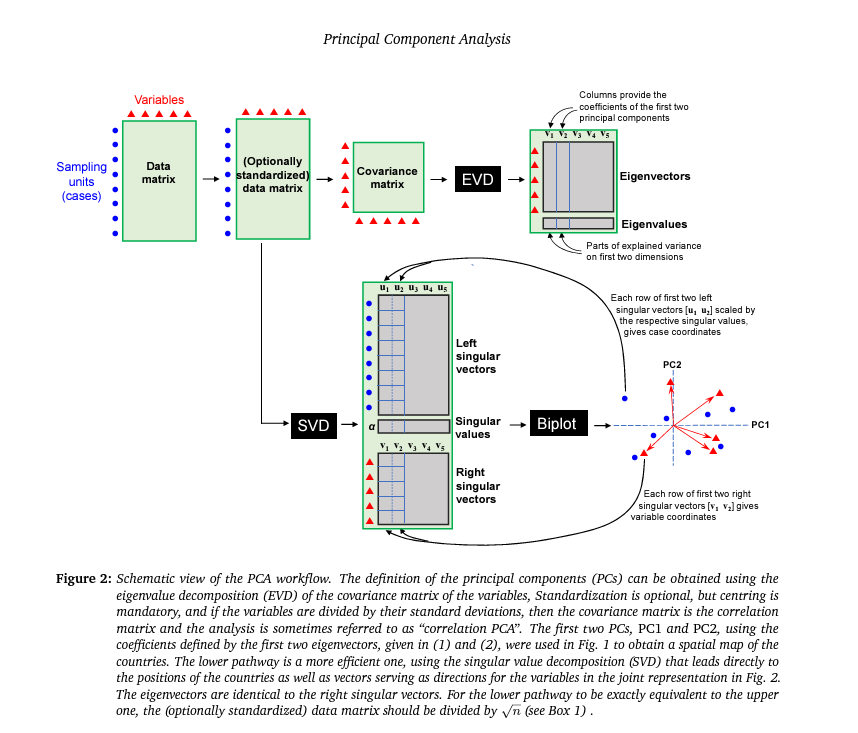


Tomado de Greenacre et al. (2022: 3).

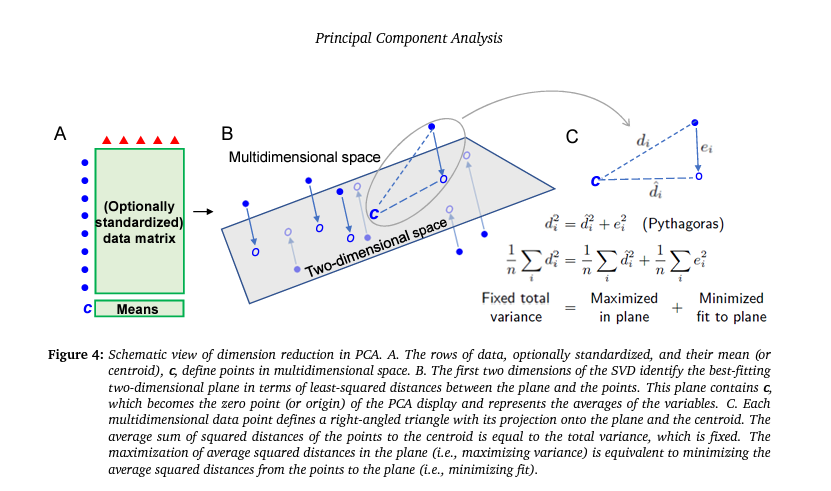

Tomado de Greenacre et al. (2022: 7).

In [249]:
# Objeto PCA con n_components=None que retiene todas las componentes. En este caso serían 9, porque hay 9 dimensiones (variables)
pca = PCA(n_components=None)

In [250]:
type(pca)

sklearn.decomposition._pca.PCA

In [251]:
# Aplicación de PCA. Resulta en un Fortran-ordered array de datos transformados en el espacio de los componentes principales
model_dim_red_pca = pca.fit_transform(df_clean_scaled)

Aquí se ajusta el modelo PCA a los datos y se transforman a un nuevo espacio de componentes principales. Aquí el PCA está basado en el método de Singular Value Decomposition (SVD)... 

In [252]:
model_dim_red_pca

array([[-2.63557499e+00,  1.47226739e+00, -5.49488868e-01, ...,
        -4.02106673e-01, -1.52246778e-02, -2.14526223e-02],
       [-2.42055643e-02, -1.42989187e+00, -1.41232909e-02, ...,
         2.62749660e-01, -3.75846547e-04,  3.38831728e-02],
       [-4.59557398e-01, -6.75495376e-01,  9.59354680e-01, ...,
         2.26680500e-01, -4.17041908e-02,  3.26636757e-02],
       ...,
       [-5.94449148e-01, -1.07633467e+00,  5.28874919e-01, ...,
         1.27676529e-01,  3.75433341e-02,  7.38600849e-02],
       [-1.80237235e+00,  5.88729402e-01,  1.18085099e+00, ...,
        -1.30849147e-01, -1.19704727e-02,  6.63306309e-03],
       [-2.64450479e+00,  1.57195347e+00, -1.74684997e-01, ...,
        -7.51162884e-01, -5.94382085e-03, -3.54065192e-02]])

In [253]:
# DataFrame con las componentes principales
df_pca = pd.DataFrame(model_dim_red_pca, columns=[f'PC{i+1}' for i in range(model_dim_red_pca.shape[1])], index=df_clean_copy.index)

El resultado es un DataFrame donde:

*   Cada fila es una observación (país)
*   Cada columna es un PC
*   Los valores son las coordenadas (principales) de cada país en el espacio de los PCs

In [254]:
df_pca

PC1       PC2       PC3       PC4       PC5  \
country                                                                 
Afghanistan         -2.635575  1.472267 -0.549489  0.242326  0.023530   
Albania             -0.024206 -1.429892 -0.014123 -0.450645 -0.125821   
Algeria             -0.459557 -0.675495  0.959355 -0.218456 -0.113275   
Angola              -2.722630  2.172332  0.600215  0.433978  0.005433   
Antigua and Barbuda  0.648597 -1.023437 -0.257430 -0.289201  0.072694   
...                       ...       ...       ...       ...       ...   
Vanuatu             -1.175210 -0.275652 -0.667131 -0.279628 -0.119733   
Venezuela           -0.314228 -0.016266  3.680273 -0.011835 -0.460468   
Vietnam             -0.594449 -1.076335  0.528875 -0.508854 -0.328297   
Yemen               -1.802372  0.588729  1.180851  0.020241 -0.315724   
Zambia              -2.644505  1.571953 -0.174685  0.178965  0.081814   

                          PC6       PC7       PC8       PC9  
country                                                      
Afghanistan          0.295663 -0.402107 -0.015225 -0.021453  
Albania             -0.059231  0.262750 -0.000376  0.033883  
Algeria              0.415597  0.226681 -0.041704  0.032664  
Angola               0.450064  0.296409  0.002103 -0.029095  
Antigua and Barbuda  0.240630  0.054647  0.009627 -0.089558  
...                       ...       ...       ...       ...  
Vanuatu             -0.056193 -0.687250  0.084313  0.018204  
Venezuela           -0.181382 -0.068043  0.192189 -0.000312  
Vietnam             -0.219081  0.127677  0.037543  0.073860  
Yemen                0.490287 -0.130849 -0.011970  0.006633  
Zambia              -0.206057 -0.751163 -0.005944 -0.035407  

[167 rows x 9 columns]

In [255]:
#@title Varianza explicada por cada componente principal


print(f"Varianza explicada por cada componente principal: {pca.explained_variance_}") # cantidad de varianza que cada componente principal captura del conjunto de datos original. Los valores están en la misma escala que los datos originales (después de la estandarización)

explained_variance_ratio = pca.explained_variance_ratio_
print(f"Varianza (ratio) explicada por cada componente principal: {explained_variance_ratio}") # varianza explicada por cada componente dividida por la varianza total. Los valores son proporciones (o porcentajes si se multiplican por 100) y siempre suman 1 (o 100%).

# Gráfico de la varianza explicada acumulada

explained_variance_cumulative = explained_variance_ratio.cumsum()
fig = px.line(
    x=[f'PC{i+1}' for i in range(len(explained_variance_cumulative))],
    y=explained_variance_cumulative,
    title="Varianza explicada acumulada por las componentes principales",
    labels={'x': 'Componentes principales', 'y': 'Varianza explicada acumulada'}
)
fig.add_scatter(
    x=[f'PC{i+1}' for i in range(len(explained_variance_cumulative))],
    y=explained_variance_cumulative,
    mode='markers'
)
fig.show()

Varianza explicada por cada componente principal: [5.33631081e+00 1.67006556e+00 8.97406142e-01 5.49797220e-01
 2.74267850e-01 2.22718073e-01 8.50864327e-02 1.40921616e-02
 4.47261467e-03]
Varianza (ratio) explicada por cada componente principal: [5.89372984e-01 1.84451685e-01 9.91147170e-02 6.07227801e-02
 3.02917253e-02 2.45982702e-02 9.39743701e-03 1.55641971e-03
 4.93981394e-04]


El número de PCs es igual al número de variables - se repite el proceso hasta completar el 100% de la varianza explicada.   

Según Greenacre et al. (2022:2), 'la estandarización permite que los coeficientes de las variables o cargas, muestren la fuerza de la contribución a un componente principal'. Y que, 'sus signos indican la influencia negativa o positiva' (ibid.). O sea, las cargas pueden interpretarse como correlaciones entre cada variable original y la PC respectiva.

In [256]:
#@title Interpretación: Carga de las variables en cada componente

pca_loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])], index=df_clean_scaled.columns) # matriz de cargas transpuesta
print("Cargas de las variables en las componentes principales:")
print(pca_loadings)

Cargas de las variables en las componentes principales:
                 PC1       PC2       PC3       PC4       PC5       PC6  \
child_mort -0.316392  0.476267 -0.150012  0.148052  0.101995 -0.196585   
exports     0.342887  0.397311 -0.030574 -0.449425 -0.038538  0.038911   
health      0.358535  0.155053 -0.075703  0.599712 -0.493200 -0.180699   
imports     0.344865  0.370781 -0.072174 -0.461798 -0.252787  0.012180   
income      0.380041  0.128384  0.145764  0.154806  0.794075  0.038147   
inflation  -0.143085  0.221261  0.948419  0.007628 -0.136423 -0.108403   
life_expec  0.343857 -0.369820  0.196752  0.018395 -0.154041  0.586010   
total_fer  -0.302842  0.459715 -0.077834  0.213928 -0.020336  0.753901   
gdpp        0.399988  0.200624  0.010339  0.364772  0.087501 -0.045382   

                 PC7       PC8       PC9  
child_mort  0.761267 -0.006444  0.004951  
exports    -0.013670  0.055264  0.717924  
health     -0.064616 -0.430072  0.130346  
imports     0.027182 -0.131135 

In [257]:
# Obtener la varianza explicada por cada componente en porcentaje
explained_variance_ratio = pca.explained_variance_ratio_ * 100  # Convertir a porcentaje

# Crear un DataFrame para organizar la información
pca_contrib_df = pd.DataFrame()

# Iterar sobre cada componente principal
for i in range(len(explained_variance_ratio)):
    component = pca_loadings.iloc[:, i].sort_values(ascending=False)  # Ordenar contribuciones en orden descendente
    component_name = f'PC{i+1} ({explained_variance_ratio[i]:.2f}% varianza explicada)'
    pca_contrib_df[component_name] = component  # Agregar la columna con las cargas y varianza explicada

# Mostrar el DataFrame organizado
pca_contrib_df


PC1 (58.94% varianza explicada)  PC2 (18.45% varianza explicada)  \
gdpp                               0.399988                         0.200624   
income                             0.380041                         0.128384   
health                             0.358535                         0.155053   
imports                            0.344865                         0.370781   
life_expec                         0.343857                        -0.369820   
exports                            0.342887                         0.397311   
inflation                         -0.143085                         0.221261   
total_fer                         -0.302842                         0.459715   
child_mort                        -0.316392                         0.476267   

            PC3 (9.91% varianza explicada)  PC4 (6.07% varianza explicada)  \
gdpp                              0.010339                        0.364772   
income                            0.145764                        0.154806   
health                           -0.075703                        0.599712   
imports                          -0.072174                       -0.461798   
life_expec                        0.196752                        0.018395   
exports                          -0.030574                       -0.449425   
inflation                         0.948419                        0.007628   
total_fer                        -0.077834                        0.213928   
child_mort                       -0.150012                        0.148052   

            PC5 (3.03% varianza explicada)  PC6 (2.46% varianza explicada)  \
gdpp                              0.087501                       -0.045382   
income                            0.794075                        0.038147   
health                           -0.493200                       -0.180699   
imports                          -0.252787                        0.012180   
life_expec                       -0.154041                        0.586010   
exports                          -0.038538                        0.038911   
inflation                        -0.136423                       -0.108403   
total_fer                        -0.020336                        0.753901   
child_mort                        0.101995                       -0.196585   

            PC7 (0.94% varianza explicada)  PC8 (0.16% varianza explicada)  \
gdpp                             -0.044023                        0.799022   
income                           -0.023113                       -0.393811   
health                           -0.064616                       -0.430072   
imports                           0.027182                       -0.131135   
life_expec                        0.581208                       -0.002966   
exports                          -0.013670                        0.055264   
inflation                        -0.022077                        0.006070   
total_fer                        -0.273145                       -0.034293   
child_mort                        0.761267                       -0.006444   

            PC9 (0.05% varianza explicada)  
gdpp                             -0.128464  
income                           -0.079011  
health                            0.130346  
imports                          -0.665687  
life_expec                        0.031594  
exports                           0.717924  
inflation                        -0.011281  
total_fer                        -0.023682  
child_mort                        0.004951

En palabras de Greenacre et. al (2022), se puede pensar en PC1 como crear una nueva variable (resumen) que se correlaciona lo más posible con todas las variables originales al mismo tiempo. Esta nueva variable (PC1) captura la mayor cantidad de información compartida entre las 9 variables originales, representando así la esencia o el "factor común" más importante de todos los datos. Es como encontrar el "hilo conductor" en una sola dimensión.

In [258]:
# Otra forma de calcular 
# Matriz de covarianza de los datos
cov_matrix = np.cov(df_clean_scaled, rowvar=False)

# Calcular los eigenvalores y eigenvectores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Varianza total (suma de todos los eigenvalores)
total_variance = np.sum(eigenvalues)

# Varianza explicada por cada componente principal
otra_forma_explained_variance_ratio = eigenvalues / total_variance

# Varianza explicada por PC1
varianza_PC1 = explained_variance_ratio[0]

print("Matriz de covarianza:\n", cov_matrix)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)
print("Varianza total:\n", total_variance)
print("Varianza explicada por cada PC:\n", otra_forma_explained_variance_ratio)
print("Varianza explicada por PC1:\n", varianza_PC1)

Matriz de covarianza:
 [[ 1.0060241  -0.29902078 -0.43303092 -0.32106013 -0.52747354  0.29001277
  -0.89201752  0.85358942 -0.485942  ]
 [-0.29902078  1.0060241   0.61661082  0.99363602  0.72972099 -0.14240581
   0.37996936 -0.29284952  0.77352564]
 [-0.43303092  0.61661082  1.0060241   0.6424278   0.69501914 -0.25548605
   0.5489131  -0.41044155  0.92211502]
 [-0.32106013  0.99363602  0.6424278   1.0060241   0.6761047  -0.18053926
   0.39990995 -0.3189708   0.75966324]
 [-0.52747354  0.72972099  0.69501914  0.6761047   1.0060241  -0.14864609
   0.61564899 -0.50486319  0.90096644]
 [ 0.29001277 -0.14240581 -0.25548605 -0.18053926 -0.14864609  1.0060241
  -0.24114897  0.31883023 -0.22296618]
 [-0.89201752  0.37996936  0.5489131   0.39990995  0.61564899 -0.24114897
   1.0060241  -0.76545827  0.60370413]
 [ 0.85358942 -0.29284952 -0.41044155 -0.3189708  -0.50486319  0.31883023
  -0.76545827  1.0060241  -0.45765069]
 [-0.485942    0.77352564  0.92211502  0.75966324  0.90096644 -0.22296618


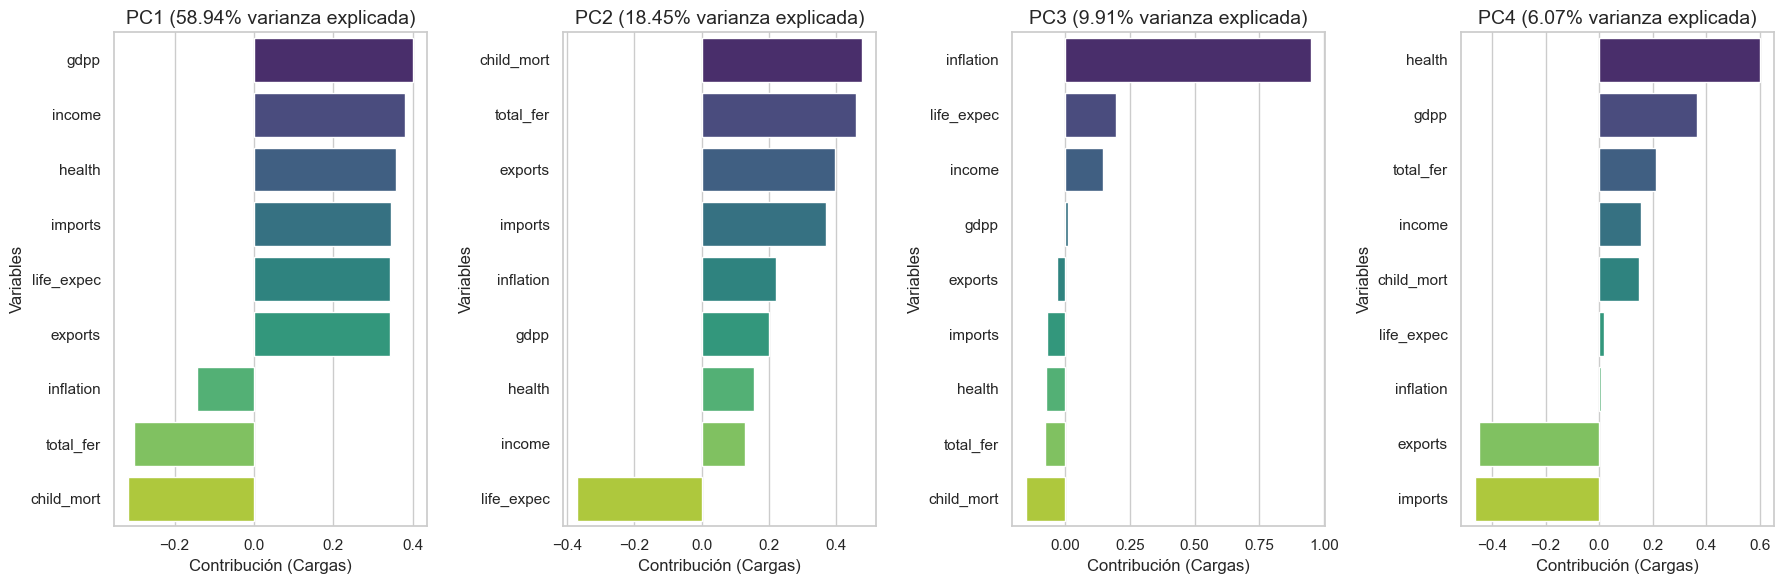

In [259]:
# Crear una figura con subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 6))  # Subplots para las primeras 4 componentes

# Iterar sobre las primeras 4 componentes principales
for i in range(4):
    # Ordenar las contribuciones de las variables en orden descendente para la componente actual
    component = pca_loadings.iloc[:, i].sort_values(ascending=False)

    # Crear un gráfico de barras para cada componente
    sns.barplot(x=component.values, y=component.index, ax=axes[i], palette="viridis")

    # Configurar los títulos y etiquetas
    axes[i].set_title(f'PC{i+1} ({explained_variance_ratio[i]:.2f}% varianza explicada)', fontsize=14)
    axes[i].set_xlabel('Contribución (Cargas)', fontsize=12)
    axes[i].set_ylabel('Variables', fontsize=12)

# Ajustar diseño para que no se superpongan los gráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### Consideraciones:
Según los resultados, las 4 primeras componentes principales retienen y explican ~95% de varianza de los datos. De acuerdo con las cargas de encontradas en esas componentes tenemos que:

* PC1: relativa al "Desarrollo Económico". Esta componente está fuertemente influenciada por indicadores de desarrollo económico y bienestar, como el PIB per cápita, los ingresos y el gasto en salud. La esperanza de vida también contribuye positivamente, sugiriendo que estos países tienden a tener economías estables y sistemas de salud eficientes. Por otro lado, la alta mortalidad infantil, la tasa de fertilidad y la inflación están negativamente correlacionadas, indicando que los países con alta puntuación en esta componente generalmente presentan menores problemas de salud infantil, tasas de fertilidad controladas y baja inflación.

* PC2: relativa al "Bienestar Social y Disparidad Económica". Esta componente sugiere una dualidad entre el bienestar social y la actividad económica. La alta mortalidad infantil y la tasa de fertilidad elevada indican desafíos en términos de salud y desarrollo social. A su vez, las exportaciones e importaciones contribuyen positivamente, lo que sugiere que, a pesar de los problemas sociales, existe un cierto nivel de actividad económica. La relación negativa con la esperanza de vida implica que los países con alta puntuación en esta componente tienden a tener una menor longevidad debido a los problemas sociales. Podría apuntar a la desigualdad social en contexto de comercio activo.

* PC3: "Inflación y Sostenibilidad del Desarrollo". La inflación domina esta componente. Los países con alta puntuación en esta componente enfrentan problemas de estabilidad económica (el valor de su moneda es débil), a pesar de tener una ligera asociación positiva con la esperanza de vida y los ingresos. Las relaciones negativas con la mortalidad infantil, la tasa de fertilidad y el gasto en salud sugieren que estos países pueden haber logrado cierta sostenibilidad en estos indicadores sociales, pero el alto nivel de inflación podría amenazar este progreso. Podrían ser economías en crecimiento.

* PC4: "Inversión en Salud versus Competitividad Económica". Hay una fuerte inversión en salud y una correlación positiva con el PIB per cápita, lo que sugiere que los países con alta puntuación en esta componente están priorizando el bienestar social a través de políticas de salud pública. Sin embargo, esta inversión parece estar en conflicto con la competitividad económica internacional, ya que las exportaciones e importaciones tienen una relación negativa. Esto podría implicar que estos países enfrentan desafíos para mantener una economía abierta y competitiva mientras priorizan el gasto en salud. Puede que sea un reflejo del compromiso social frente a competitividad comercial.

In [260]:

n_components = pca.components_.shape[1]

# DataFrame con las cargas de las variables para todas las componentes principales
feature_contributions = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(n_components)],  # Crear nombres para todas las componentes
    index=df_clean_scaled.columns
)

# Obtener las top 5 features para PC1, PC2 y PC3, ordenando por valor absoluto de las cargas
top_5_features_pc1 = feature_contributions['PC1'].abs().sort_values(ascending=False).head(5)
top_5_features_pc2 = feature_contributions['PC2'].abs().sort_values(ascending=False).head(5)
top_5_features_pc3 = feature_contributions['PC3'].abs().sort_values(ascending=False).head(5)
top_5_features_pc4 = feature_contributions['PC4'].abs().sort_values(ascending=False).head(5)


# Mostrar las top 5 features de cada componente principal
print("Top 5 features que más contribuyen a PC1:")
print(top_5_features_pc1)

print("\nTop 5 features que más contribuyen a PC2:")
print(top_5_features_pc2)

print("\nTop 5 features que más contribuyen a PC3:")
print(top_5_features_pc3)

print("\nTop 5 features que más contribuyen a PC4:")
print(top_5_features_pc4)


Top 5 features que más contribuyen a PC1:
gdpp          0.399988
income        0.380041
health        0.358535
imports       0.344865
life_expec    0.343857
Name: PC1, dtype: float64

Top 5 features que más contribuyen a PC2:
child_mort    0.476267
total_fer     0.459715
exports       0.397311
imports       0.370781
life_expec    0.369820
Name: PC2, dtype: float64

Top 5 features que más contribuyen a PC3:
inflation     0.948419
life_expec    0.196752
child_mort    0.150012
income        0.145764
total_fer     0.077834
Name: PC3, dtype: float64

Top 5 features que más contribuyen a PC4:
health       0.599712
imports      0.461798
exports      0.449425
gdpp         0.364772
total_fer    0.213928
Name: PC4, dtype: float64


In [261]:
# Ratio de la varianza explicada
bi_plot_pca_explained_variance = pca.explained_variance_ratio_

# Gráfico 2D de las dos primeras componentes principales
fig_2d = px.scatter(
    df_pca, x='PC1', y='PC2',
    title="Biplot: Las dos primeras componentes principales",
    labels={
        'PC1': f'PC1: Desarollo económico ({bi_plot_pca_explained_variance[0]:.2%})',
        'PC2': f'PC2: Bienestar en riesgo por disparidad económica ({bi_plot_pca_explained_variance[1]:.2%})'
    },
    hover_name=df_pca.index,
    hover_data={'PC1': ':.2f', 'PC2': ':.2f'}
)


fig_2d.show()

In [262]:
# Gráfico 3D de las 3 primeras componentes principales
fig_3d = px.scatter_3d(
    df_pca, x='PC1', y='PC2', z='PC3',
    opacity=0.3,
    template='plotly_white',
    title="Visualización 3D de las tres primeras componentes principales",
      labels={
        'PC1':'Desarollo económico',
        'PC2':'Bienestar y disparidad económica',
        'PC3':'Inflación'
    },
    hover_name=df_pca.index
)

fig_3d.update_traces(marker=dict(size=5))

fig_3d.show()

In [263]:
# DataFrame transformado después de PCA

# Keep only the first 4 columns and rename the remaining ones
df_4_pca = df_pca.iloc[:, :4]  # Keep only the first 4 columns

df_4_pca = df_4_pca.rename(columns={
    'PC1': 'desarrollo_eco',
    'PC2': 'bienestar_dispar',
    'PC3': 'inflación',
    'PC4': 'gasto_salud'
})

df_4_pca


desarrollo_eco  bienestar_dispar  inflación  gasto_salud
country                                                                      
Afghanistan               -2.635575          1.472267  -0.549489     0.242326
Albania                   -0.024206         -1.429892  -0.014123    -0.450645
Algeria                   -0.459557         -0.675495   0.959355    -0.218456
Angola                    -2.722630          2.172332   0.600215     0.433978
Antigua and Barbuda        0.648597         -1.023437  -0.257430    -0.289201
...                             ...               ...        ...          ...
Vanuatu                   -1.175210         -0.275652  -0.667131    -0.279628
Venezuela                 -0.314228         -0.016266   3.680273    -0.011835
Vietnam                   -0.594449         -1.076335   0.528875    -0.508854
Yemen                     -1.802372          0.588729   1.180851     0.020241
Zambia                    -2.644505          1.571953  -0.174685     0.178965

[167 rows x 4 columns]

## t-SNE

In [264]:
from sklearn.manifold import TSNE

# Aplicar t-SNE para reducir los datos a 2 dimensiones para su visualización
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(df_clean_scaled)

# Convertir los resultados a un DataFrame para la visualización
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'], index=df_clean_scaled.index)

# Visualización interactiva con Plotly
fig_tsne = px.scatter(
    df_tsne,
    x='TSNE1',
    y='TSNE2',
    title="Visualización 2D de t-SNE",
    labels={
        'TSNE1': 't-SNE Component 1',
        'TSNE2': 't-SNE Component 2'
    },
    hover_name=df_tsne.index,
    template='plotly',  # Opcional: elegir un tema de visualización
    width=800,  # Ancho del gráfico
    height=600  # Altura del gráfico
)

fig_tsne.show()


# Modelos de agrupación

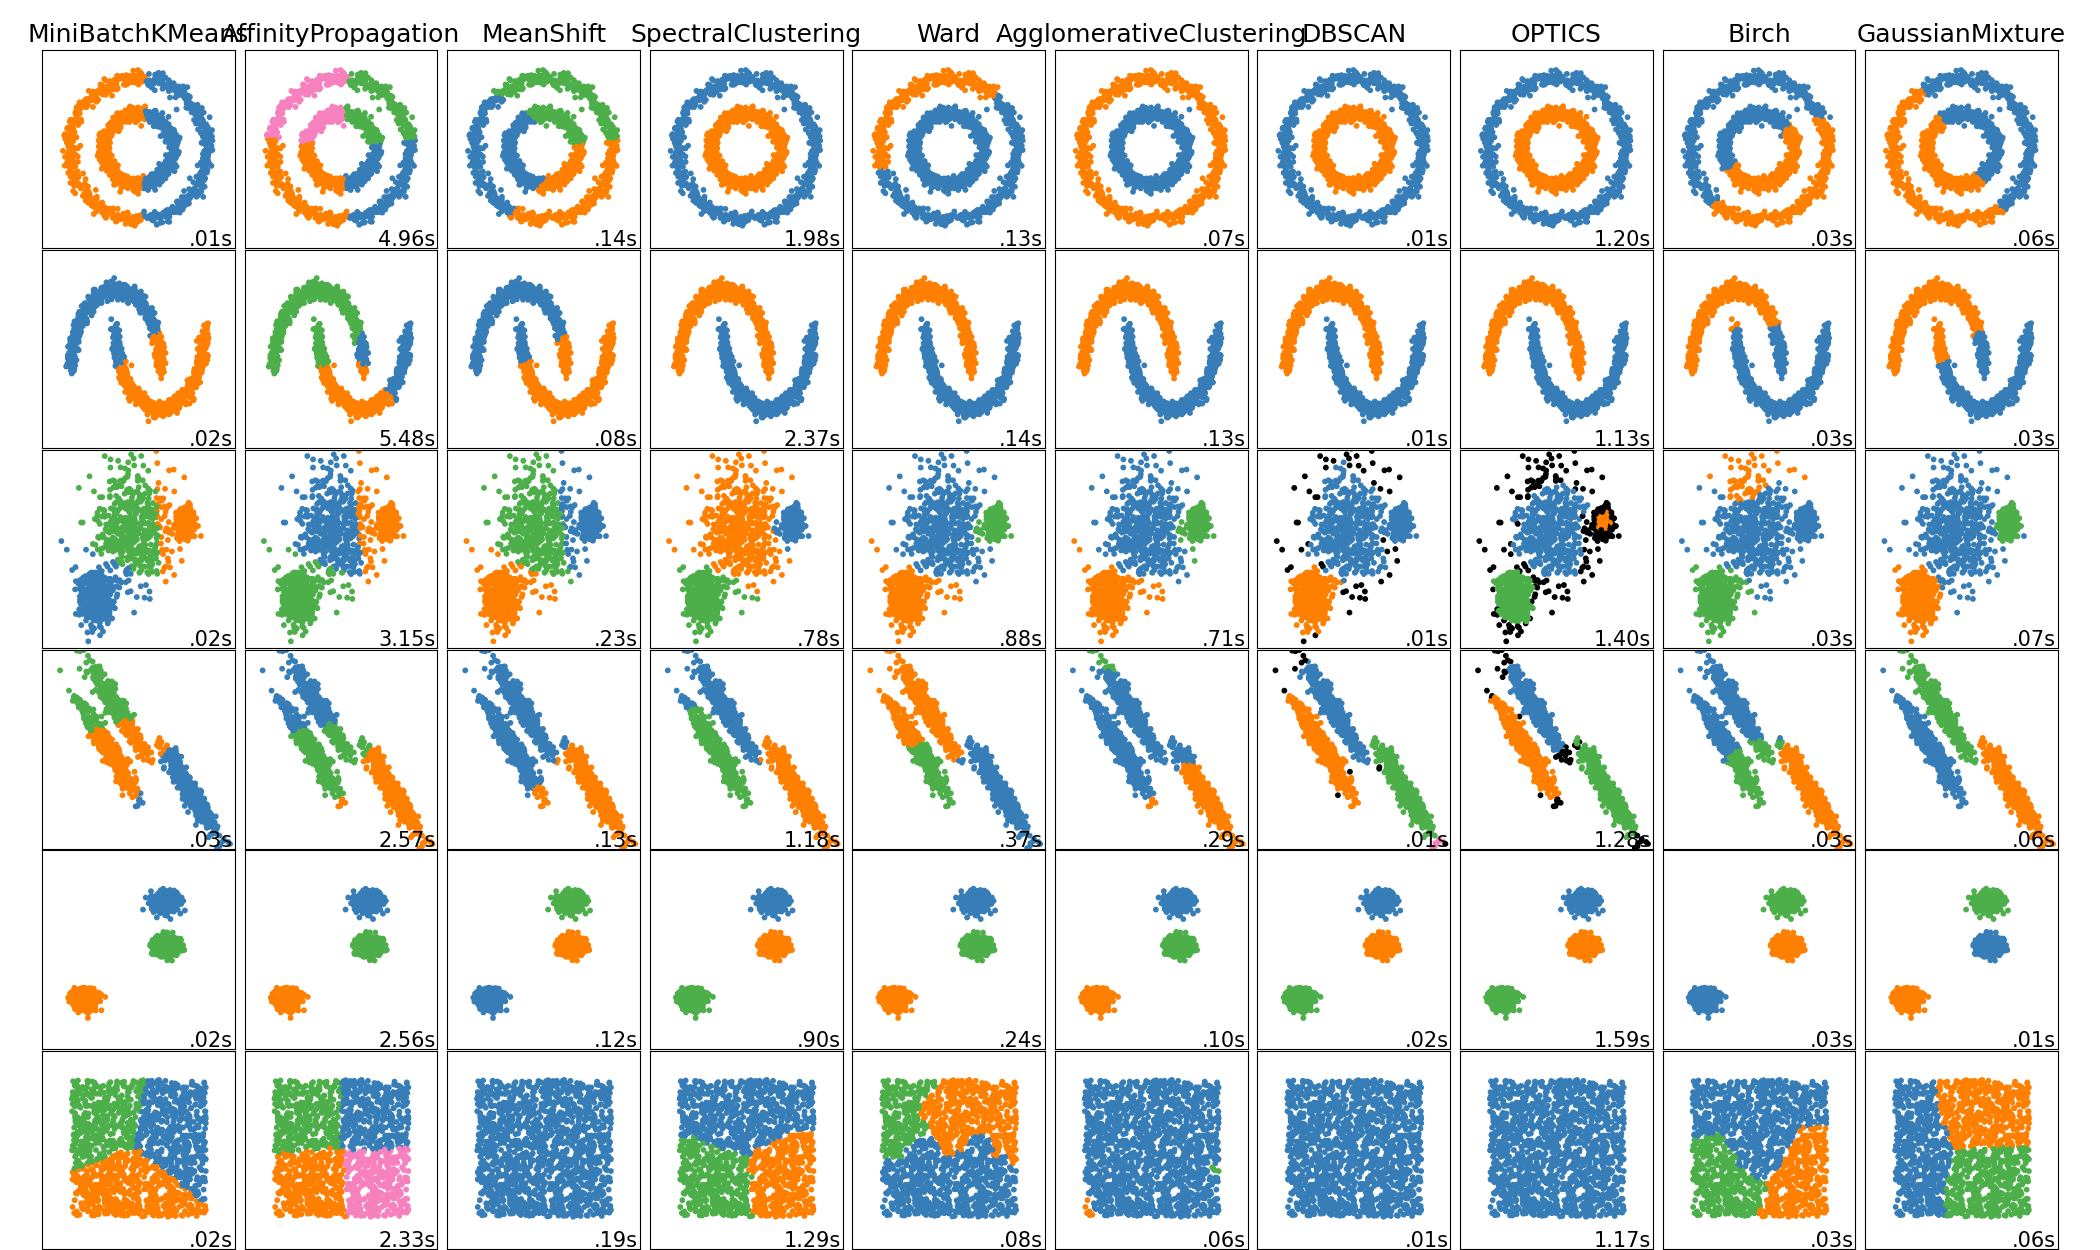

Tomado de: https://qu4nt.github.io/sklearn-doc-es/auto_examples/cluster/plot_cluster_comparison.html
 

###  K-means

Este es un método de agrupación no supervisado que busca dividir un conjunto de datos en ***k* grupos distintos**. El algoritmo funciona **iterativamente**, asignando cada punto de datos al centroide más cercano (generalmente usuando la distancia euclidiana) y luego recalculando las posiciones de los centroides (inicialmente, calculados tomando los promedios de los puntos asignados a los respectivos grupos y que después se vuelven referentes para la siguente iteración). Este proceso se repite hasta que los centroides se estabilizan (no se mueven significativamente) o se alcanza un número máximo de iteraciones. Haciendo una analogía con conceptos de otras ciencias, un centroide sería el "centro de masa" de los puntos de datos en un determinado grupo o cluster; minimizando la suma de las distancias cuadradas entre los puntos y el centroide.

Es una técnica no jerárquica computacionalmente eficiente y fácil de interpretar - como todo, tiene ventajas y limitaciones:

- Crea una partición plana de los datos, donde todos los grupos están al mismo nivel. 

- A diferencia de los métodos jerárquicos, K-means no produce una estructura de árbol o dendrograma que muestre relaciones entre grupos.

- Se debe especificar el número *k* clusters de antemano (aleatoriamente, por conocimiento de dominio del usuario o por el uso de alguna heurística), y este número permanece constante durante todo el proceso.

- Cada punto de datos se asigna directamente a un cluster, sin considerar subgrupos o supergrupos.

- El algoritmo refina iterativamente las asignaciones de grupos, en lugar de construir una jerarquía paso a paso.

- No permite examinar fácilmente diferentes niveles de granularidad en la estructura de los datos.

##### Valor óptimo de *k* (aglomeraciones)

Busco la cantidad óptima de *k* clusters (representados por sus centroides) que mejor caracterizan el conjunto de datos. Para ello, dispongo de una serie de procedimientos heurísticos, - en este caso 5 métricas diferentes que se comparan para apoyar o sustentar la toma de decisión sobre la calidad y cantidad de los grupos: 

- El método del codo (Elbow method)
- El coeficiente de silueta (Silhouette coefficient)
- El índice de Calinski-Harabasz
- El índice de Davies-Bouldin
- El criterio de información bayesiano (BIC)


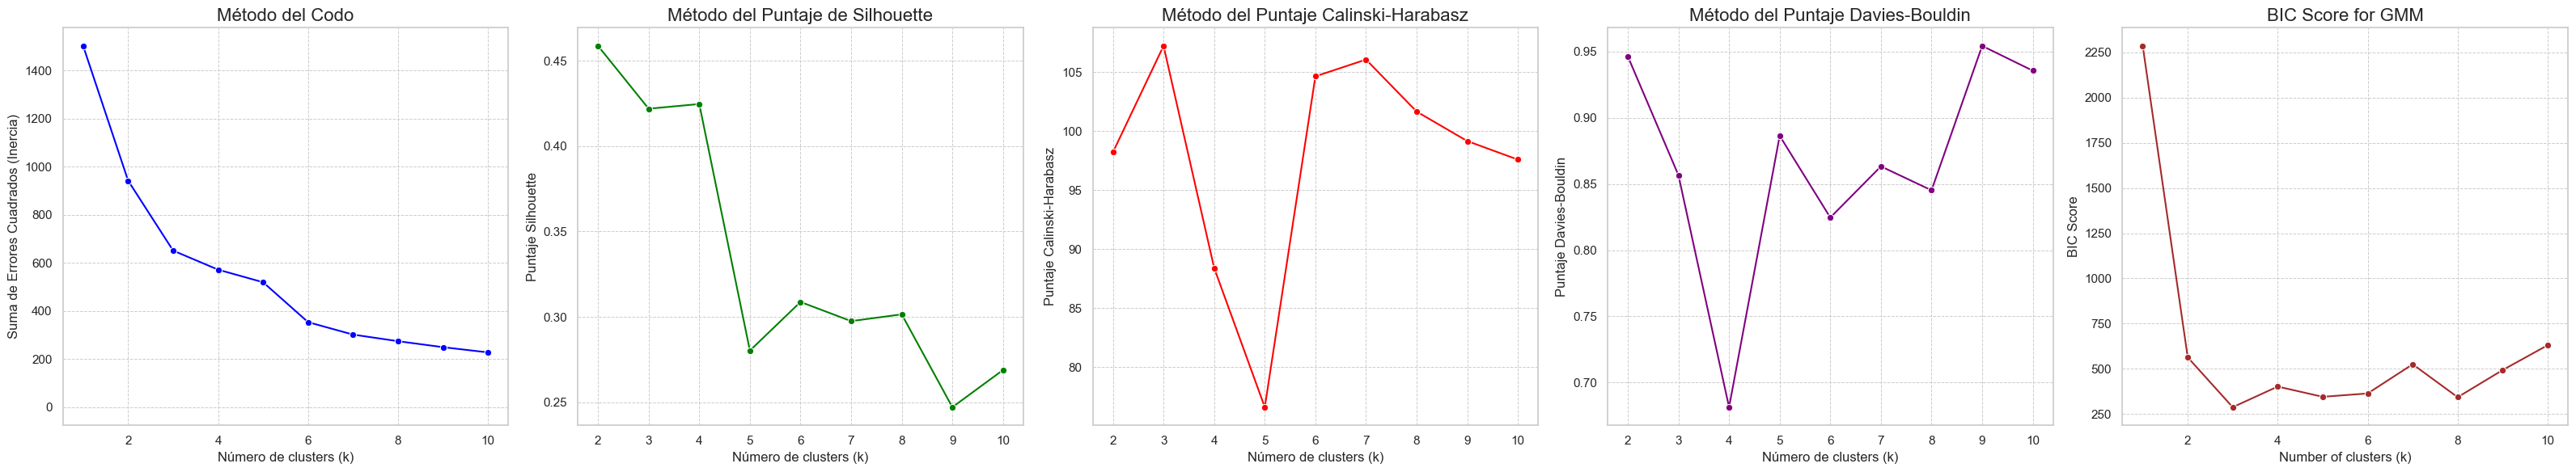

El número óptimo de clusters según el Método del Codo es: 3


In [265]:
# Import Davies-Bouldin Score
# !pip install kneed # OJO ACTIVAR EN GOOGLE COLAB
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Configuración inicial para K-means
sse = {}
sil = []
calinski = []
davies_bouldin = []  # Nueva lista para Davies-Bouldin
bic_scores = []
kmax = 10

# Crear figura y subplots
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(32, 6))  # Ajustar para 5 subplots

# Elbow Method
for k in range(1, kmax + 1):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(df_clean_scaled)
    sse[k] = kmeans.inertia_  # Inercia: Suma de distancias a los centros más cercanos

# Usar KneeLocator para identificar el codo
x = list(sse.keys())
y = list(sse.values())
knee = KneeLocator(x, y, curve='convex', direction='decreasing')

# Gráfico Elbow Method con KneeLocator
sns.lineplot(x=x, y=y, marker='o', color='blue', ax=ax[0])
ax[0].vlines(knee.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', color='red')
ax[0].set_title('Método del Codo', fontsize=16)
ax[0].set_xlabel("Número de clusters (k)", fontsize=12)
ax[0].set_ylabel("Suma de Errores Cuadrados (Inercia)", fontsize=12)
ax[0].grid(True, which='both', linestyle='--', linewidth=0.7)

# Silhouette Score Method
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(df_clean_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_clean_scaled, labels, metric='euclidean'))

# Gráfico Silhouette Score Method
sns.lineplot(x=range(2, kmax + 1), y=sil, marker='o', color='green', ax=ax[1])
ax[1].set_title('Método del Puntaje de Silhouette', fontsize=16)
ax[1].set_xlabel("Número de clusters (k)", fontsize=12)
ax[1].set_ylabel("Puntaje Silhouette", fontsize=12)
ax[1].grid(True, which='both', linestyle='--', linewidth=0.7)

# Calinski-Harabasz Score Method
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(df_clean_scaled)
    labels = kmeans.labels_
    calinski.append(calinski_harabasz_score(df_clean_scaled, labels))

# Gráfico Calinski-Harabasz Score
sns.lineplot(x=range(2, kmax + 1), y=calinski, marker='o', color='red', ax=ax[2])
ax[2].set_title('Método del Puntaje Calinski-Harabasz', fontsize=16)
ax[2].set_xlabel("Número de clusters (k)", fontsize=12)
ax[2].set_ylabel("Puntaje Calinski-Harabasz", fontsize=12)
ax[2].grid(True, which='both', linestyle='--', linewidth=0.7)

# Davies-Bouldin Score Method
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(df_clean_scaled)
    labels = kmeans.labels_
    davies_bouldin.append(davies_bouldin_score(df_clean_scaled, labels))

# Gráfico Davies-Bouldin Score
sns.lineplot(x=range(2, kmax + 1), y=davies_bouldin, marker='o', color='purple', ax=ax[3])
ax[3].set_title('Método del Puntaje Davies-Bouldin', fontsize=16)
ax[3].set_xlabel("Número de clusters (k)", fontsize=12)
ax[3].set_ylabel("Puntaje Davies-Bouldin", fontsize=12)
ax[3].grid(True, which='both', linestyle='--', linewidth=0.7)


# Bayesian Information Criterion (BIC) with Gaussian Mixture Models (GMM)
from sklearn.mixture import GaussianMixture

for k in range(1, kmax + 1):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(df_clean_scaled)
    bic_scores.append(gmm.bic(df_clean_scaled))

# Gráfico BIC
sns.lineplot(x=range(1, kmax + 1), y=bic_scores, marker='o', color='brown', ax=ax[4])
ax[4].set_title('BIC Score for GMM', fontsize=16)
ax[4].set_xlabel("Number of clusters (k)", fontsize=12)
ax[4].set_ylabel("BIC Score", fontsize=12)
ax[4].grid(True, which='both', linestyle='--', linewidth=0.7)

optimal_k_bic = range(1, kmax + 1)[np.argmin(bic_scores)]


# Ajustar los subplots para que no se superpongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Mostrar el número óptimo de clusters según el Elbow Method
print(f"El número óptimo de clusters según el Método del Codo es: {knee.knee}")

Consideraciones:
En este análisis, se evalúan cinco métricas para determinar el número óptimo de clusters del conjunto de datos utilizando el algoritmo K-Means.

* Método del Codo: sugiere el número óptimo de clusters en el punto donde se observa una disminución notable en la inercia. El KneeLocator identifica el "codo" en el gráfico (aproximación visual), indicando el número de clusters más apropiado antes de que la reducción de la inercia se vuelva marginal.

* Puntaje Silhouette: Evalúa qué tan bien separados están los clusters y qué tan cohesionados son internamente. Un puntaje más alto indica una mejor estructura de clusters. El número de clusters óptimo corresponde al valor de k con el puntaje más alto.

* Puntaje Calinski-Harabasz: Mide la dispersión entre clusters en relación con la dispersión dentro de los clusters. Valores más altos indican una mejor separación. El número óptimo de clusters se asocia con el puntaje más alto.

* Puntaje Davies-Bouldin: Mide la relación entre la distancia media entre clusters y la variación dentro de los clusters. Un puntaje más bajo indica una mejor separación entre los clusters. El número óptimo se asocia con el puntaje mínimo.

* Criterio de Información Bayesiano (BIC): Utiliza Modelos de Mezcla Gaussiana para evaluar la adecuación del número de clusters, penalizando la complejidad del modelo. El número óptimo de clusters corresponde al valor de k con el BIC más bajo.


#### Análisis de agrupamiento

In [266]:
# Creación de diccionario para guardar resultados de los 5 procedimientos heurísticos.
results = {
    'Num_Clusters': list(range(1, kmax + 1)),
    'Elbow_Method': list(sse.values()),
    'Silhouette_Score': [np.nan] + sil,
    'Calinski_Harabasz': [np.nan] + calinski,
    'Davies_Bouldin': [np.nan] + davies_bouldin,
    'BIC_Score': bic_scores
}

# DataFrame de resultados
df_results = pd.DataFrame(results)

# Valor óptimo de k para cada método
optimal_clusters = {
    'Elbow_Method': knee.knee,
    'Silhouette_Score': np.argmax(sil) + 2,  # +2 because Silhouette starts from k=2
    'Calinski_Harabasz': np.argmax(calinski) + 2,  # +2 because Calinski-Harabasz starts from k=2
    'Davies_Bouldin': np.argmin(davies_bouldin) + 2,  # +2 because Davies-Bouldin starts from k=2
    'BIC_Score': optimal_k_bic
}

# DataFrame con los valores óptimos de k por cada método
optimal_row = pd.DataFrame({'Num_Clusters': ['Optimal'], **{k: [v] for k, v in optimal_clusters.items()}})

# DataFrame original con las filas óptimas
df_results = pd.concat([df_results, optimal_row], ignore_index=True)


print(df_results.to_string(index=False))

Num_Clusters  Elbow_Method  Silhouette_Score  Calinski_Harabasz  Davies_Bouldin   BIC_Score
           1   1503.000000               NaN                NaN             NaN 2286.430318
           2    942.206601          0.458633          98.206604        0.946378  562.977457
           3    651.382052          0.421862         107.206933        0.856631  287.068210
           4    572.126620          0.424614          88.402553        0.681384  401.297830
           5    519.751473          0.280295          76.616551        0.886390  344.542246
           6    353.703134          0.308773         104.628304        0.824631  363.135161
           7    301.998492          0.297558         106.049228        0.863297  524.603791
           8    274.522756          0.301515         101.645428        0.845221  342.399389
           9    249.657031          0.247180          99.150116        0.954319  492.647830
          10    227.941889          0.268919          97.580487        0.935585 

**Decisión final con 3 de 5 "votos" de métodos *k* : 3 clusters**

#### Clustering K-means

In [267]:
# Inicializando el algoritmo K-means
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=42, verbose=1).fit(df_clean_scaled)

# Número de iteraciones óptimas
optimal_iterations = kmeans.n_iter_

print(f"El algoritmo K-means alcanzó la convergencia después de {optimal_iterations} iteraciones.")

# Extracción de asignaciones de clusters de los datos en una lista
pred = kmeans.labels_

# Centroides (3)
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(data=centroids, columns = [df_clean_scaled.columns]).T

print("Centroid values for each cluster:")
print(centroids_df)

Initialization complete
Iteration 0, inertia 929.0940649032802.
Iteration 1, inertia 685.0724997716804.
Iteration 2, inertia 667.6191216606853.
Iteration 3, inertia 658.4273432058599.
Iteration 4, inertia 653.4144110816173.
Iteration 5, inertia 652.1031635118441.
Iteration 6, inertia 651.6656127385181.
Iteration 7, inertia 651.382051583014.
Converged at iteration 7: strict convergence.
El algoritmo K-means alcanzó la convergencia después de 8 iteraciones.
Centroid values for each cluster:
                   0         1         2
child_mort  1.326610 -0.826294 -0.445506
exports    -0.365042  1.317948 -0.212973
health     -0.524447  1.820945 -0.283659
imports    -0.392817  1.311116 -0.196220
income     -0.689238  1.718701 -0.165277
inflation   0.391812 -0.452334 -0.067490
life_expec -1.276276  1.123170  0.327609
total_fer   1.354342 -0.786618 -0.472342
gdpp       -0.604963  1.923532 -0.272754


In [268]:
# Labels de centroides al DF copia del original 

df_kmeans = df_clean_scaled.copy()
df_kmeans['cluster'] = pred

# Labels de centroides al DF copia del PCA (con los 4 componentes identificados) 

df_4_pca_kmeans = df_4_pca.copy()
df_4_pca_kmeans['cluster'] = df_kmeans['cluster']
df_4_pca_kmeans['country'] = df_kmeans.index

# Reduciendo la dimensionalidad de los centroides en el espacio PCA
centroids_4_pca_kmeans = pca.transform(centroids)

In [269]:
df_kmeans

child_mort   exports    health   imports    income  \
country                                                                   
Afghanistan            1.291532 -0.411011 -0.565040 -0.432276 -0.808245   
Albania               -0.538949 -0.350191 -0.439218 -0.313677 -0.375369   
Algeria               -0.272833 -0.318526 -0.484826 -0.353720 -0.220844   
Angola                 2.007808 -0.291375 -0.532363 -0.345953 -0.585043   
Antigua and Barbuda   -0.695634 -0.104331 -0.178771  0.040735  0.101732   
...                         ...       ...       ...       ...       ...   
Vanuatu               -0.225578 -0.336864 -0.501562 -0.342488 -0.738527   
Venezuela             -0.526514 -0.199393 -0.219310 -0.287205 -0.033542   
Vietnam               -0.372315 -0.361463 -0.538488 -0.377572 -0.658404   
Yemen                  0.448417 -0.392166 -0.550596 -0.418479 -0.658924   
Zambia                 1.114951 -0.383952 -0.540498 -0.418445 -0.721358   

                     inflation  life_expec  total_fer      gdpp  cluster  
country                                                                   
Afghanistan           0.157336   -1.619092   1.902882 -0.679180        0  
Albania              -0.312347    0.647866  -0.859973 -0.485623        2  
Algeria               0.789274    0.670423  -0.038404 -0.465376        2  
Angola                1.387054   -1.179234   2.128151 -0.516268        0  
Antigua and Barbuda  -0.601749    0.704258  -0.541946 -0.041817        2  
...                        ...         ...        ...       ...      ...  
Vanuatu              -0.489784   -0.852161   0.365754 -0.546913        2  
Venezuela             3.616865    0.546361  -0.316678  0.029323        2  
Vietnam               0.409732    0.286958  -0.661206 -0.637754        2  
Yemen                 1.500916   -0.344633   1.140944 -0.637754        0  
Zambia                0.590015   -2.092785   1.624609 -0.629546        0  

[167 rows x 10 columns]

In [270]:
df_4_pca_kmeans

desarrollo_eco  bienestar_dispar  inflación  gasto_salud  \
country                                                                         
Afghanistan               -2.635575          1.472267  -0.549489     0.242326   
Albania                   -0.024206         -1.429892  -0.014123    -0.450645   
Algeria                   -0.459557         -0.675495   0.959355    -0.218456   
Angola                    -2.722630          2.172332   0.600215     0.433978   
Antigua and Barbuda        0.648597         -1.023437  -0.257430    -0.289201   
...                             ...               ...        ...          ...   
Vanuatu                   -1.175210         -0.275652  -0.667131    -0.279628   
Venezuela                 -0.314228         -0.016266   3.680273    -0.011835   
Vietnam                   -0.594449         -1.076335   0.528875    -0.508854   
Yemen                     -1.802372          0.588729   1.180851     0.020241   
Zambia                    -2.644505          1.571953  -0.174685     0.178965   

                     cluster              country  
country                                            
Afghanistan                0          Afghanistan  
Albania                    2              Albania  
Algeria                    2              Algeria  
Angola                     0               Angola  
Antigua and Barbuda        2  Antigua and Barbuda  
...                      ...                  ...  
Vanuatu                    2              Vanuatu  
Venezuela                  2            Venezuela  
Vietnam                    2              Vietnam  
Yemen                      0                Yemen  
Zambia                     0               Zambia  

[167 rows x 6 columns]

In [271]:
# Conteo acumulado de países por label de cluster K-means (-1 representa ruido)
print(df_kmeans['cluster'].value_counts())

cluster
2    91
0    48
1    28
Name: count, dtype: int64


#### Vis. de K-means + PCA

##### 2D

In [272]:
import plotly.express as px
import plotly.graph_objects as go

# 2D Scatter plot
fig = px.scatter(df_4_pca_kmeans, x='desarrollo_eco', y='bienestar_dispar', color='cluster',
                 hover_name=df_4_pca_kmeans.index,  # This will show country names on hover
                 labels={'PC1': 'Desarrollo Económico', 'PC2': 'Bienestar y Disparidad'},
                 title='K-Means Clustering con PCA (primeras 2 componentes)')

# Centroides con 'x' 
fig.add_trace(go.Scatter(
    x=centroids_4_pca_kmeans[:, 0],
    y=centroids_4_pca_kmeans[:, 1],
    mode='markers',
    marker=dict(color='red', size=15, symbol='x', line=dict(width=2)),
    name='Centroids'
))

# Customize the layout
fig.update_layout(
    title_font_size=16,
    title_font_family="Arial",
    legend_title_text='Cluster',
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    legend_title_font_size=12
)

# Update marker properties for data points
fig.update_traces(marker=dict(size=7, line=dict(width=1, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

# Show the plot
fig.show()

##### 3D

In [273]:
centroids_df

0         1         2
child_mort  1.326610 -0.826294 -0.445506
exports    -0.365042  1.317948 -0.212973
health     -0.524447  1.820945 -0.283659
imports    -0.392817  1.311116 -0.196220
income     -0.689238  1.718701 -0.165277
inflation   0.391812 -0.452334 -0.067490
life_expec -1.276276  1.123170  0.327609
total_fer   1.354342 -0.786618 -0.472342
gdpp       -0.604963  1.923532 -0.272754

In [274]:
centroids_4_pca_kmeans

array([[-2.27738534e+00,  1.23125847e+00, -2.11436405e-01,
         1.69222515e-01,  2.26950239e-02,  4.68040766e-02,
        -3.96968550e-02, -3.89071073e-03, -7.01372132e-03],
       [ 3.93008967e+00,  6.28064186e-01, -2.51973038e-02,
         5.88565148e-01,  7.31883781e-02, -6.89256443e-03,
         2.41711317e-02,  4.08782688e-03, -1.70283901e-02],
       [-8.00016107e-03, -8.42705534e-01,  1.19279911e-01,
        -2.70357196e-01, -3.44905026e-02, -2.25670755e-02,
         1.35017292e-02,  7.94450138e-04,  8.93904994e-03]])

In [275]:
# 3D scatter plot for K-means clusters

fig = px.scatter_3d(df_4_pca_kmeans,
                    x='desarrollo_eco',
                    y='bienestar_dispar',
                    z='inflación',
                    color='cluster',
                    hover_name='country',  # Shows country name on hover
                    title="K-Means Clustering con PCA (primeras 3 componentes)",
                    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
                    template='plotly_dark',  # Aesthetic style
                    size_max=20)

# Centroides con 'x' 
fig.add_scatter3d(x=centroids_4_pca_kmeans[:, 0],
                  y=centroids_4_pca_kmeans[:, 1],
                  z=centroids_4_pca_kmeans[:, 2],
                  mode='markers',
                  marker=dict(symbol='x', size=10, color='red', line=dict(width=2, color='black')),
                  name='Centroids')


# Update marker properties for data points
fig.update_traces(marker=dict(size=6, line=dict(width=1, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))


# Show the interactive 3D plot for K-means
fig.show()


##### Choropleth

In [276]:
fig = px.choropleth(df_4_pca_kmeans,
                    locations='country',
                    locationmode='country names', 
                    color='cluster', 
                    hover_name='country', 
                    color_continuous_scale='Viridis',
                    title='Clusters by Country K-MEANS')


# Customize the color bar
fig.update_coloraxes(
    colorbar_title= None ,  # Change the title of the color bar
    colorbar_tickvals=[0, 1, 2, 3],  # Adjust tick values if you know the clusters range
    colorbar_ticktext=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'],  # Add custom labels
    colorbar_len=0.5,  # Adjust the length of the color bar (0.5 means half the length)
    colorbar_thickness=5  # Adjust the thickness of the color bar
)



fig.show()

In [277]:
df_clean

country  child_mort  exports    health   imports  income  \
0            Afghanistan        90.2    55.30   41.9174   248.297    1610   
1                Albania        16.6  1145.20  267.8950  1987.740    9930   
2                Algeria        27.3  1712.64  185.9820  1400.440   12900   
3                 Angola       119.0  2199.19  100.6050  1514.370    5900   
4    Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   
..                   ...         ...      ...       ...       ...     ...   
162              Vanuatu        29.2  1384.02  155.9250  1565.190    2950   
163            Venezuela        17.1  3847.50  662.8500  2376.000   16500   
164              Vietnam        23.3   943.20   89.6040  1050.620    4490   
165                Yemen        56.3   393.00   67.8580   450.640    4480   
166               Zambia        83.1   540.20   85.9940   451.140    3280   

     inflation  life_expec  total_fer   gdpp      Continent  
0         9.44        56.2       5.82    553           Asia  
1         4.49        76.3       1.65   4090         Europe  
2        16.10        76.5       2.89   4460         Africa  
3        22.40        60.1       6.16   3530         Africa  
4         1.44        76.8       2.13  12200  North America  
..         ...         ...        ...    ...            ...  
162       2.62        63.0       3.50   2970        Oceania  
163      45.90        75.4       2.47  13500  South America  
164      12.10        73.1       1.95   1310           Asia  
165      23.60        67.5       4.67   1310           Asia  
166      14.00        52.0       5.40   1460         Africa  

[167 rows x 11 columns]

In [278]:
df_kmeans['cluster']

country
Afghanistan            0
Albania                2
Algeria                2
Angola                 0
Antigua and Barbuda    2
                      ..
Vanuatu                2
Venezuela              2
Vietnam                2
Yemen                  0
Zambia                 0
Name: cluster, Length: 167, dtype: int32

In [279]:
# Agrupación de data por cluster después de K-means y promedio de cada característica (en términos reales, no escalados)

numeric_cols = df_clean.select_dtypes(include=[np.number])

numeric_cols['kmeans_cluster'] = pred

df_grouped = numeric_cols.groupby('kmeans_cluster').mean()

print(df_grouped)


                child_mort       exports       health       imports  \
kmeans_cluster                                                        
0                91.610417    879.063521   114.821765    827.028771   
1                 5.046429  31038.239286  4327.163214  25818.100000   
2                20.357143   3604.149434   547.279455   3710.446386   

                      income  inflation  life_expec  total_fer          gdpp  
kmeans_cluster                                                                
0                3897.354167  11.911146   59.239583   4.992083   1909.208333  
1               50178.571429   3.014679   80.514286   1.760714  48114.285714  
2               13968.021978   7.070549   73.460440   2.235055   7979.912088  


Identificación visual de grupos K-means con características promedio normalizadas:

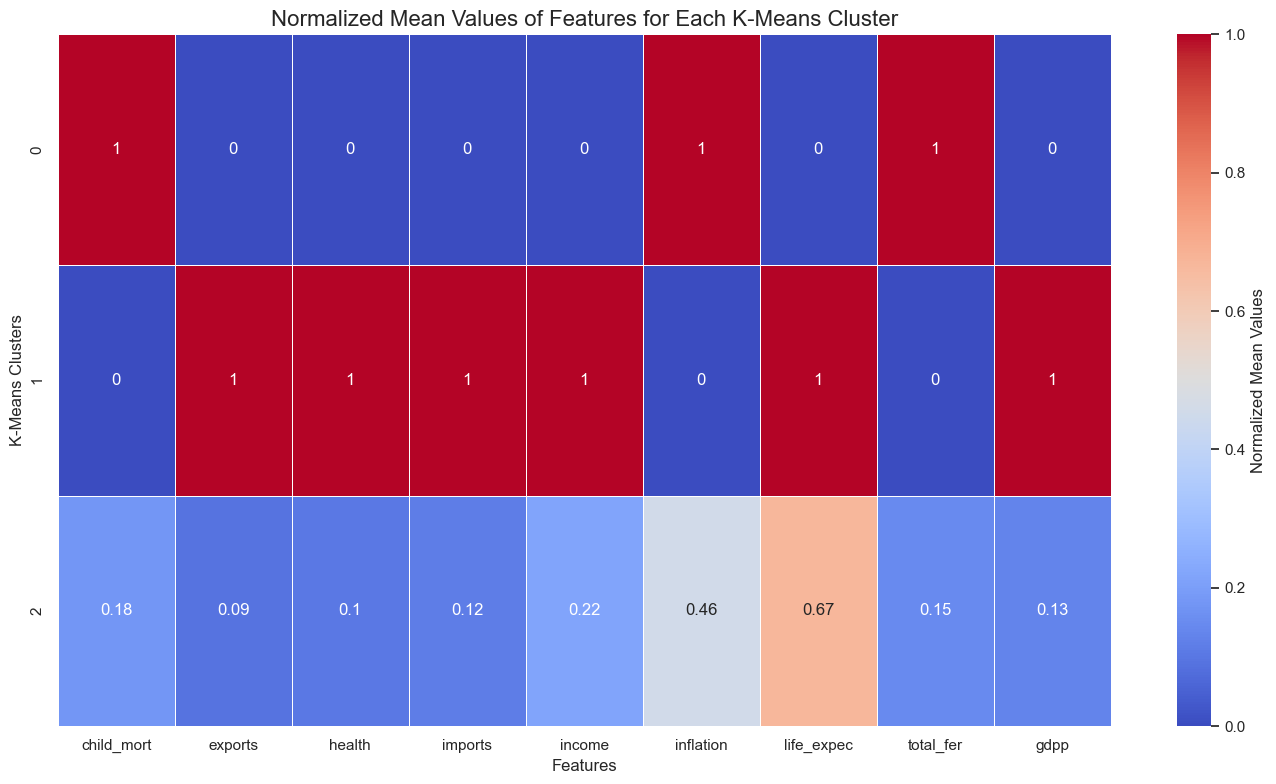

In [280]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar los promedios con rango [0, 1] usando MinMaxScaler
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_grouped), columns=df_grouped.columns, index=df_grouped.index)

# Configurar plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Heatmap 
sns.heatmap(df_normalized, annot=True, cmap="coolwarm", linewidths=0.5, cbar_kws={'label': 'Normalized Mean Values'})

#Título y labels
plt.title('Normalized Mean Values of Features for Each K-Means Cluster', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('K-Means Clusters', fontsize=12)

# Plot
plt.tight_layout()
plt.show()


Resumen K-means

In [281]:
# Países juntos en cada cluster K-means
countries_by_cluster_ok = df_4_pca_kmeans.groupby('cluster')['country'].apply(list).reset_index()

# Número de países por cluster
cluster_counts = df_4_pca_kmeans['cluster'].value_counts().sort_index()

# Número total de países
total_countries = df_4_pca_kmeans['country'].nunique()

# Porcentaje de países en cada cluster
cluster_percentages = (cluster_counts / total_countries) * 100

# DataFrame resumen
cluster_summary = pd.DataFrame({
    'Cluster': cluster_counts.index,
    'Number of Countries': cluster_counts.values,
    'Percentage (%)': cluster_percentages.values
})

# Países agrupados
print(countries_by_cluster_ok)

# Tabla resumen
print(cluster_summary)

   cluster                                            country
0        0  [Afghanistan, Angola, Benin, Botswana, Burkina...
1        1  [Australia, Austria, Belgium, Brunei, Canada, ...
2        2  [Albania, Algeria, Antigua and Barbuda, Argent...
   Cluster  Number of Countries  Percentage (%)
0        0                   48       28.742515
1        1                   28       16.766467
2        2                   91       54.491018


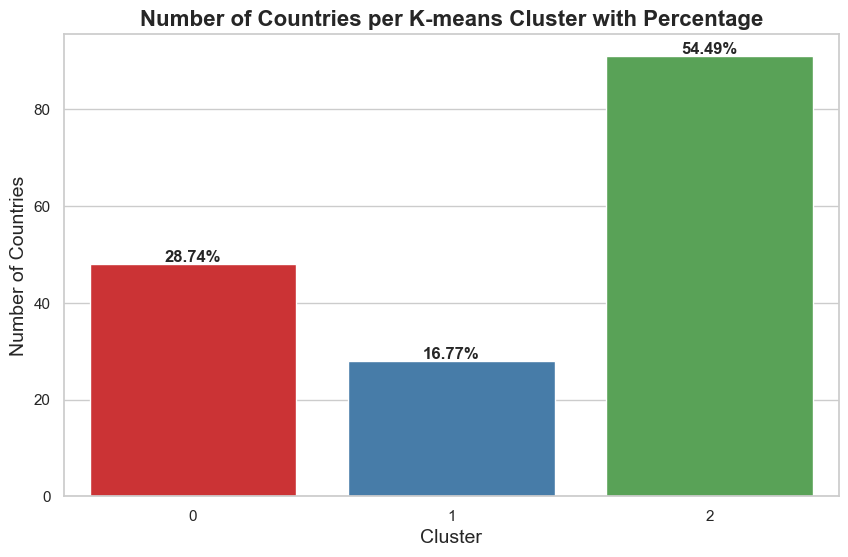

In [282]:
# Plot de países en cada cluster K-means
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_summary['Cluster'],
            y=cluster_summary['Number of Countries'],
            palette='Set1')

# Porcentajes
for index, value in enumerate(cluster_summary['Number of Countries']):
    percentage = cluster_summary['Percentage (%)'].iloc[index]
    plt.text(index, value + 0.5, f'{percentage:.2f}%', ha='center', fontsize=12, weight='bold')

# Labels y títulos
plt.title('Number of Countries per K-means Cluster with Percentage', fontsize=16, weight='bold')
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Number of Countries', fontsize=14)

plt.show()


* Sólo unos pocos países muestran un desarrollo avanzado en los indicadores socioeconómicos de la base de datos (cluster 1). 

* Se podría decir que más de la mitad de los países del mundo están en vía de desarrollo (cluster 2). 

* Y, cerca del 30% de países están muy rezagados (cluster 0), mostrando realidades adversas en la calidad de vida de sus habitantes (p.ej., la diferencia de la esperanza de vida promedio entre grupo 1 y grupo 0 es de ~21.3 años; y en términos de mortalidad infantil promedio por cada 1,000 habitantes, ~86.6 niños menores de 5 años mueren de más en el grupo 0  que en el grupo 1). 

* **Cluster 0 es nuestro target para el envío de ayuda humanitaria**. 

#### Conclusión K-means


In [283]:
# Nuevo DF países que necesitan ayuda urgente.

# Criterios:

# 1. Escogemos solo países en el cluster 0  

df_cluster_0 = df_4_pca_kmeans[df_4_pca_kmeans['cluster'] == 0]

In [284]:
df_cluster_0

desarrollo_eco  bienestar_dispar  inflación  \
country                                                                 
Afghanistan                    -2.635575          1.472267  -0.549489   
Angola                         -2.722630          2.172332   0.600215   
Benin                          -2.363962          1.171696  -1.247192   
Botswana                       -1.129489          0.401611  -0.231994   
Burkina Faso                   -2.751480          1.664991  -0.848207   
Burundi                        -2.762440          1.628790  -0.299329   
Cameroon                       -2.438923          1.288278  -1.226104   
Central African Republic       -3.236946          2.178414  -1.602973   
Chad                           -3.185395          2.354073  -1.078613   
Comoros                        -1.949130          0.606917  -0.774798   
Congo, Dem. Rep.               -3.114930          2.170747   0.361477   
Congo, Rep.                    -2.047343          1.089177   0.717277   
Cote d'Ivoire                  -2.572195          1.497963  -0.955701   
Equatorial Guinea              -1.052542          2.692334   1.048852   
Eritrea                        -1.948339          0.496371  -0.039610   
Gabon                          -1.281841          0.850425   0.514767   
Gambia                         -2.104642          0.826788  -0.762354   
Ghana                          -2.001961          0.753168   0.373761   
Guinea                         -2.712585          1.614803   0.041301   
Guinea-Bissau                  -2.608159          1.406872  -1.195769   
Haiti                          -3.937287          3.036998  -1.756335   
Iraq                           -1.197990          0.365722   0.665672   
Kenya                          -1.736918          0.285212  -0.879188   
Kiribati                       -1.666835          0.238469  -0.966425   
Lao                            -1.637368          0.241847  -0.206803   
Lesotho                        -2.433054          1.162863  -1.149082   
Liberia                        -2.257865          0.935414  -0.767234   
Madagascar                     -1.996653          0.557492  -0.338898   
Malawi                         -2.708924          1.498580  -0.357332   
Mali                           -2.944260          2.010103  -1.142610   
Mauritania                     -2.114560          1.043817   0.594105   
Mozambique                     -2.730326          1.546608  -0.780421   
Namibia                        -1.334642          0.417998  -0.760210   
Niger                          -3.060794          2.105242  -1.325128   
Nigeria                        -3.931802          3.821230   7.928939   
Pakistan                       -1.861969          0.568079  -0.100255   
Rwanda                         -1.748039          0.262548  -0.813253   
Senegal                        -1.862076          0.497110  -0.930076   
Sierra Leone                   -3.223706          2.317240  -0.109186   
Solomon Islands                -1.517840          0.019029  -0.357049   
South Africa                   -1.177907          0.355394  -0.522092   
Sudan                          -2.016917          0.849869   0.699051   
Tanzania                       -2.277293          1.008862  -0.405609   
Timor-Leste                    -2.007669          1.086249   1.385958   
Togo                           -2.243462          0.906540  -1.191994   
Uganda                         -2.620955          1.463192  -0.415173   
Yemen                          -1.802372          0.588729   1.180851   
Zambia                         -2.644505          1.571953  -0.174685   

                          gasto_salud  cluster                   country  
country                                                                   
Afghanistan                  0.242326        0               Afghanistan  
Angola                       0.433978        0                    Angola  
Benin                        0.257106        0                     Benin  


In [285]:
# 2. Se priorizan los 5 que tengan las peores condiciones según los componentes principales analizados. O sea, el más bajo desarrollo_eco, más alto bienestar_dispar, la más alta inflación y menor gasto_salud: 


# Function to create and sort a DataFrame for a specific PC
def create_sorted_df(df, pc):
    df_sorted = df[['cluster', 'country', pc]].sort_values(['cluster', pc], ascending=[True, False])
    df_sorted = df_sorted.reset_index(drop=True)
    return df_sorted

# Create four DataFrames for each Principal Component
df_pc1 = create_sorted_df(df_cluster_0, 'desarrollo_eco')
df_pc2 = create_sorted_df(df_cluster_0, 'bienestar_dispar')
df_pc3 = create_sorted_df(df_cluster_0, 'inflación')
df_pc4 = create_sorted_df(df_cluster_0, 'gasto_salud')

# Display the DataFrames
print("DataFrame for Desarollo Económico:")
print(df_pc1.to_string(index=False))
print("\nDataFrame for Bienestar y Disparidad:")
print(df_pc2.to_string(index=False))
print("\nDataFrame for Inflación:")
print(df_pc3.to_string(index=False))
print("\nDataFrame for Gasto Salud:")
print(df_pc4.to_string(index=False))

# If you want to save these DataFrames for further use:
# df_pc1.to_csv('pc1_sorted.csv', index=False)
# df_pc2.to_csv('pc2_sorted.csv', index=False)
# df_pc3.to_csv('pc3_sorted.csv', index=False)
# df_pc4.to_csv('pc4_sorted.csv', index=False)

DataFrame for Desarollo Económico:
 cluster                  country  desarrollo_eco
       0        Equatorial Guinea       -1.052542
       0                 Botswana       -1.129489
       0             South Africa       -1.177907
       0                     Iraq       -1.197990
       0                    Gabon       -1.281841
       0                  Namibia       -1.334642
       0          Solomon Islands       -1.517840
       0                      Lao       -1.637368
       0                 Kiribati       -1.666835
       0                    Kenya       -1.736918
       0                   Rwanda       -1.748039
       0                    Yemen       -1.802372
       0                 Pakistan       -1.861969
       0                  Senegal       -1.862076
       0                  Eritrea       -1.948339
       0                  Comoros       -1.949130
       0               Madagascar       -1.996653
       0                    Ghana       -2.001961
       0       

In [286]:

# Desarrollo eco: los 5 más bajos
lowest_5_pc1 = df_pc1.nsmallest(5, 'desarrollo_eco')

# Bienestar y disparidad: los más altos
highest_5_pc2 = df_pc2.nlargest(5, 'bienestar_dispar')

# Inflación: los 5 más altos
highest_5_pc3 = df_pc3.nlargest(5, 'inflación')

# Gasto en salud: los 5 más bajos
lowest_5_pc4 = df_pc4.nsmallest(5, 'gasto_salud')

# Combinar todos los DataFrames seleccionados
df__prioridad_kmeans = pd.concat([lowest_5_pc1, highest_5_pc2, highest_5_pc3, lowest_5_pc4])

# Resetear el índice si es necesario
#nuevo_df = nuevo_df.reset_index(drop=True)


df__prioridad_kmeans

cluster                   country  desarrollo_eco  bienestar_dispar  \
47        0                     Haiti       -3.937287               NaN   
46        0                   Nigeria       -3.931802               NaN   
45        0  Central African Republic       -3.236946               NaN   
44        0              Sierra Leone       -3.223706               NaN   
43        0                      Chad       -3.185395               NaN   
0         0                   Nigeria             NaN          3.821230   
1         0                     Haiti             NaN          3.036998   
2         0         Equatorial Guinea             NaN          2.692334   
3         0                      Chad             NaN          2.354073   
4         0              Sierra Leone             NaN          2.317240   
0         0                   Nigeria             NaN               NaN   
1         0               Timor-Leste             NaN               NaN   
2         0                     Yemen             NaN               NaN   
3         0         Equatorial Guinea             NaN               NaN   
4         0               Congo, Rep.             NaN               NaN   
47        0           Solomon Islands             NaN               NaN   
46        0                       Lao             NaN               NaN   
45        0                  Kiribati             NaN               NaN   
44        0                  Botswana             NaN               NaN   
43        0                   Namibia             NaN               NaN   

    inflación  gasto_salud  
47        NaN          NaN  
46        NaN          NaN  
45        NaN          NaN  
44        NaN          NaN  
43        NaN          NaN  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  
0    7.928939          NaN  
1    1.385958          NaN  
2    1.180851          NaN  
3    1.048852          NaN  
4    0.717277          NaN  
47        NaN    -0.201590  
46        NaN    -0.146920  
45        NaN    -0.107329  
44        NaN    -0.102647  
43        NaN    -0.098511

In [287]:
# 3. Selección de los 5 primeros países que más aparecen en los "peores condiciones" 
df__prioridad_kmeans['country'].value_counts()

country
Nigeria                     3
Haiti                       2
Sierra Leone                2
Chad                        2
Equatorial Guinea           2
Central African Republic    1
Timor-Leste                 1
Yemen                       1
Congo, Rep.                 1
Solomon Islands             1
Lao                         1
Kiribati                    1
Botswana                    1
Namibia                     1
Name: count, dtype: int64

In [288]:
# los países que más aparecen en los "peores condiciones" 

sele_ayuda_kmeans = ['Nigeria', 'Haiti', 'Sierra Leone', 'Chad', 'Equatorial Guinea']

# DataFrame
df_sele_ayuda_kmeans = df_clean[df_clean['country'].isin(sele_ayuda_kmeans)]

# Choropleth 
fig = px.choropleth(df_sele_ayuda_kmeans, 
                    locations='country',
                    locationmode='country names', 
                    color= 'country',
                    hover_name='country',
                    hover_data= df_sele_ayuda_kmeans.columns,
                    projection='albers', 
                    title='Los 5 países que necesitan ayuda urgente según K-means + PCA')

fig.show()

In [289]:
fig = px.choropleth(df_sele_ayuda_kmeans, 
                    locations='country',
                    locationmode='country names', 
                    #color= '',
                    hover_name='country',
                    hover_data= df_sele_ayuda_kmeans.columns,
                    scope= 'africa',
                    projection='albers', 
                    title='Son 4 países africanos los que se priorizan')

fig.show()

In [290]:
fig = px.choropleth(df_sele_ayuda_kmeans, 
                    locations='country',
                    locationmode='country names', 
                    # color= 'country',
                    hover_name='country',
                    hover_data= df_sele_ayuda_kmeans.columns,
                    scope='north america',
                    projection='albers', 
                    title='...y Haiti')

fig.show()

### DBSCAN

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) es un algoritmo no paramétrico que funciona agrupando puntos muy juntos (con muchos vecinos cercanos, regiones densas) y marcando los puntos que se encuentran solos como ruido (StatQuest with Josh Starmer, 2022). Fue propuesto en 1996 por Martin Ester, Hans-Peter Kriegel, Jörg Sander y Xiaowei Xu. 

Se podría decir que agrupa imitando "lo que a simple vista se puede ver" (ibid.). Es útil cuando los grupos diferentes están anidados (incluso en dimensiones crecientes por un mayor número de variables), cuando se trabaja con grupos de formas irregulares o cuando hay ruido significativo en los datos (p.ej, valores atípicos) (ibid.). Sin embargo, puede tener dificultades con grupos de densidades muy variables. No requiere especificar el número de grupos de antemano (ibid.).

DBSCAN requiere la selección de dos parámetros básicos: 

* **epsilon (ε)**: define el radio de la vecindad alrededor de un punto. Es, entonces, la distancia máxima entre dos muestras que se considerarán vecinas.
* **min_samples**: el número mínimo de puntos necesarios en la vecindad ε para formar una región densa.

Como conceptos clave tenemos:

* Punto núcleo: Un punto con al menos min_samples puntos dentro de su vecindad ε.
* Punto borde: Un punto dentro de la vecindad ε de un punto núcleo, pero con menos de min_samples puntos en su propia vecindad.
* Punto ruido: Un punto que no es ni núcleo ni borde.

El proceso del algoritmo:

a) Se selecciona un punto arbitrario no visitado del conjunto de datos.
b) Se examina la vecindad ε de este punto:

Si contiene al menos min_samples puntos, se inicia un nuevo grupo.

Si no, se marca como ruido (puede convertirse en borde más tarde).

c) Si el punto es un punto núcleo, se agregan todos los puntos en su vecindad ε al grupo.
d) Se repite el paso c) para cada nuevo punto añadido al grupo, expandiéndolo.
e) Cuando no se pueden añadir más puntos al grupo actual, se selecciona otro punto no visitado y se repite el proceso.
f) El algoritmo termina cuando todos los puntos han sido visitados.

#### Selección de puntos mínimos

Según Sefidian (2022) y stataiml (2024), aunque no hay métodos predeterminados para ecoger este parámetro, una orientación es configurarlo para que sea mayor o igual al número de dimensiones D del conjunto de datos. Es decir, en nuestro caso después de aplicar el PCA, tenemos que MinPts ≥ 4(D) + 1. También es una buena práctica es tener 2*D para iniciar el algoritmo (ibid.).

Valores mínimos como 1 y 2, no son tan efectivos para formar clusters significativos (ibid). 

In [291]:
min_samples_ok = 8

#### Epsilon óptimo

El valor óptimo de **epsilon (ε)** en el algoritmo **DBSCAN** se puede determinar utilizando el **gráfico de k-distancia**. 

Primero, se calculan las distancias a los k vecinos más cercanos para cada punto del conjunto de datos, donde **k** es el valor de **MinPts** o **min_samples**. O sea, las distancias de los 8 puntos más cercanos a para cada punto, en este caso.

Luego, estas distancias se ordenan y se grafican, creando una curva que muestra cómo las distancias cambian entre puntos. 

El punto del **elbow** en esta curva —donde la pendiente cambia más abruptamente— indica el valor óptimo de **ε**, ya que representa la distancia a partir de la cual los puntos empiezan a formar clústeres más densos. 

Este valor puede identificarse **visualmente** o mediante el uso de algoritmos como **KneeLocator**.

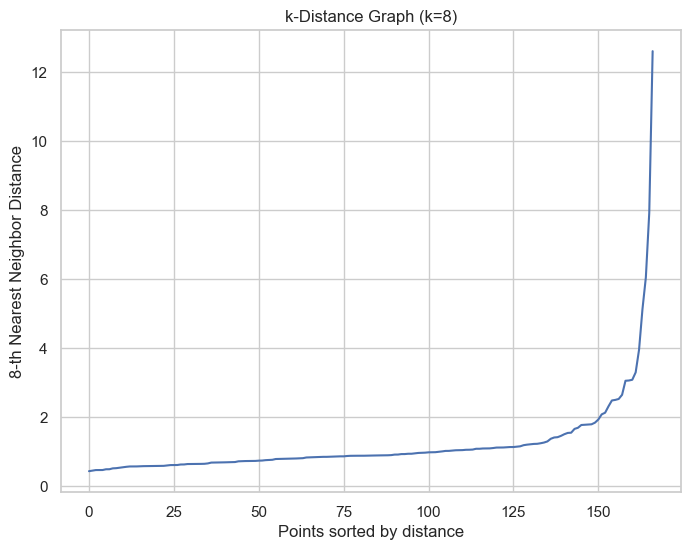

Optimal epsilon: 3.0855945273143734


In [292]:
from sklearn.neighbors import NearestNeighbors

# Computar k-nearest neighbors distances

vecinos = NearestNeighbors(n_neighbors=min_samples_ok)
vecinos_fit = vecinos.fit(df_clean_scaled) # ajuste del modelo
distances, indices = vecinos_fit.kneighbors(df_clean_scaled)

# Sort and plot the k-distance graph
distances = np.sort(distances[:, min_samples_ok - 1], axis=0)  # Get the k-th nearest distance
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title(f"k-Distance Graph (k={min_samples_ok})")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{min_samples_ok}-th Nearest Neighbor Distance")
plt.grid(True)
plt.show()


# Programmatically find the elbow point (optimal epsilon)
from kneed import KneeLocator

# Detect the elbow point
kneedle = KneeLocator(range(len(distances)), distances, curve='convex', direction='increasing')
optimal_epsilon = distances[kneedle.elbow]

print(f"Optimal epsilon: {optimal_epsilon}")


* **NOTA**: Intenté con el epsilon = 3.094 y min_samples = 8 y el resultado no es muy informativo (sólo produce dos clusters, uno gigante y unos pocos puntos de ruido). Por lo tanto, lo que sigue es el resultado de experimentar con diversos valores de epsilon, manteniendo el min_samples.


#### Clustering DBSCAN

In [293]:
from sklearn.cluster import DBSCAN

# Inicialización del algoritmo
dbscan = DBSCAN(eps=0.9, min_samples= 8) # eps= 0.9 da unos resultados más granulares


dbscan_labels = dbscan.fit_predict(df_clean_scaled)

In [294]:
# Labels al DF copia del original 

df_dbscan = df_kmeans.copy()
df_dbscan['dbscan_cluster'] = dbscan_labels

# Labels al DF copia del PCA (con los 4 componentes identificados) 

df_4_pca_dbscan = df_4_pca.copy()
df_4_pca_dbscan['dbscan_cluster'] = df_dbscan['dbscan_cluster']
df_4_pca_dbscan['country'] = df_kmeans.index

In [295]:
df_dbscan

child_mort   exports    health   imports    income  \
country                                                                   
Afghanistan            1.291532 -0.411011 -0.565040 -0.432276 -0.808245   
Albania               -0.538949 -0.350191 -0.439218 -0.313677 -0.375369   
Algeria               -0.272833 -0.318526 -0.484826 -0.353720 -0.220844   
Angola                 2.007808 -0.291375 -0.532363 -0.345953 -0.585043   
Antigua and Barbuda   -0.695634 -0.104331 -0.178771  0.040735  0.101732   
...                         ...       ...       ...       ...       ...   
Vanuatu               -0.225578 -0.336864 -0.501562 -0.342488 -0.738527   
Venezuela             -0.526514 -0.199393 -0.219310 -0.287205 -0.033542   
Vietnam               -0.372315 -0.361463 -0.538488 -0.377572 -0.658404   
Yemen                  0.448417 -0.392166 -0.550596 -0.418479 -0.658924   
Zambia                 1.114951 -0.383952 -0.540498 -0.418445 -0.721358   

                     inflation  life_expec  total_fer      gdpp  cluster  \
country                                                                    
Afghanistan           0.157336   -1.619092   1.902882 -0.679180        0   
Albania              -0.312347    0.647866  -0.859973 -0.485623        2   
Algeria               0.789274    0.670423  -0.038404 -0.465376        2   
Angola                1.387054   -1.179234   2.128151 -0.516268        0   
Antigua and Barbuda  -0.601749    0.704258  -0.541946 -0.041817        2   
...                        ...         ...        ...       ...      ...   
Vanuatu              -0.489784   -0.852161   0.365754 -0.546913        2   
Venezuela             3.616865    0.546361  -0.316678  0.029323        2   
Vietnam               0.409732    0.286958  -0.661206 -0.637754        2   
Yemen                 1.500916   -0.344633   1.140944 -0.637754        0   
Zambia                0.590015   -2.092785   1.624609 -0.629546        0   

                     dbscan_cluster  
country                              
Afghanistan                       0  
Albania                           1  
Algeria                           1  
Angola                           -1  
Antigua and Barbuda               1  
...                             ...  
Vanuatu                           1  
Venezuela                        -1  
Vietnam                           1  
Yemen                            -1  
Zambia                            0  

[167 rows x 11 columns]

In [296]:
df_4_pca_dbscan

desarrollo_eco  bienestar_dispar  inflación  gasto_salud  \
country                                                                         
Afghanistan               -2.635575          1.472267  -0.549489     0.242326   
Albania                   -0.024206         -1.429892  -0.014123    -0.450645   
Algeria                   -0.459557         -0.675495   0.959355    -0.218456   
Angola                    -2.722630          2.172332   0.600215     0.433978   
Antigua and Barbuda        0.648597         -1.023437  -0.257430    -0.289201   
...                             ...               ...        ...          ...   
Vanuatu                   -1.175210         -0.275652  -0.667131    -0.279628   
Venezuela                 -0.314228         -0.016266   3.680273    -0.011835   
Vietnam                   -0.594449         -1.076335   0.528875    -0.508854   
Yemen                     -1.802372          0.588729   1.180851     0.020241   
Zambia                    -2.644505          1.571953  -0.174685     0.178965   

                     dbscan_cluster              country  
country                                                   
Afghanistan                       0          Afghanistan  
Albania                           1              Albania  
Algeria                           1              Algeria  
Angola                           -1               Angola  
Antigua and Barbuda               1  Antigua and Barbuda  
...                             ...                  ...  
Vanuatu                           1              Vanuatu  
Venezuela                        -1            Venezuela  
Vietnam                           1              Vietnam  
Yemen                            -1                Yemen  
Zambia                            0               Zambia  

[167 rows x 6 columns]

In [297]:
# Conteo acumulado de países por label de cluster DBSCAN (-1 representa ruido)
print(df_dbscan['dbscan_cluster'].value_counts())

dbscan_cluster
 1    86
-1    42
 0    26
 2    13
Name: count, dtype: int64


#### Vis. de DBSCAN + PCA

##### 2D

In [298]:
# 2D Scatter plot
fig = px.scatter(df_4_pca_dbscan, x='desarrollo_eco', y='bienestar_dispar', color='dbscan_cluster',
                 hover_name=df_4_pca_dbscan.index,  # This will show country names on hover
                 labels={'PC1': 'Desarrollo Económico', 'PC2': 'Bienestar y Disparidad'},
                 title='DBSCAN Clustering con PCA (primeras 2 componentes)')


# Update marker properties for data points
fig.update_traces(marker=dict(size=7, line=dict(width=1, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))


# Show the plot
fig.show()

##### 3D

In [299]:
# 3D scatter plot for DBSCAN clusters
fig_dbscan = px.scatter_3d(df_4_pca_dbscan,
                          x='desarrollo_eco',
                          y='bienestar_dispar',
                          z='inflación',
                          color='dbscan_cluster',
                          hover_name='country',  # Shows country names on hover
                          title="DBSCAN Clustering con PCA (primeras 3 componentes)",
                          labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
                          template='plotly_dark')

# Update marker properties for data points
fig_dbscan.update_traces(marker=dict(size=6, line=dict(width=1, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

# Show the interactive 3D plot for DBSCAN
fig_dbscan.show()


##### Choropleth

In [300]:
fig = px.choropleth(df_4_pca_dbscan,
                    locations='country',
                    locationmode='country names', 
                    color='dbscan_cluster', 
                    hover_name='country', 
                    color_continuous_scale='Viridis',
                    title='Clusters by Country DBSCAN')


# Customize the color bar
fig.update_coloraxes(
    colorbar_title= None ,  # Change the title of the color bar
    colorbar_tickvals=[0, 1, 2, 3],  # Adjust tick values if you know the clusters range
    colorbar_ticktext=['Cluster -1','Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'],  # Add custom labels
    colorbar_len=0.5,  # Adjust the length of the color bar (0.5 means half the length)
    colorbar_thickness=5  # Adjust the thickness of the color bar
)


fig.show()

In [301]:
df_dbscan['dbscan_cluster']

country
Afghanistan            0
Albania                1
Algeria                1
Angola                -1
Antigua and Barbuda    1
                      ..
Vanuatu                1
Venezuela             -1
Vietnam                1
Yemen                 -1
Zambia                 0
Name: dbscan_cluster, Length: 167, dtype: int64

In [302]:
# Agrupación de data por cluster después de DBSCAN y promedio de cada característica (en términos reales, no escalados)

numeric_cols = df_clean.select_dtypes(include=[np.number])

numeric_cols['dbscan_cluster'] = dbscan_labels

df_grouped_dbscan = numeric_cols.groupby('dbscan_cluster').mean()

print(df_grouped_dbscan)

                child_mort       exports       health       imports  \
dbscan_cluster                                                        
-1               52.895238  18073.459810  1752.462317  14230.811810   
 0               87.261538    267.375269    59.201208    420.082500   
 1               21.472093   3342.843936   532.529842   3659.328617   
 2                4.161538  14286.284615  4271.863846  13610.484615   

                      income  inflation  life_expec  total_fer          gdpp  
dbscan_cluster                                                                
-1              29005.976190  14.593548   68.733333   3.442857  22557.047619  
 0               1974.307692   6.815577   59.319231   5.141923    913.307692  
 1              12749.767442   5.721279   73.224419   2.223721   7458.976744  
 2              38238.461538   1.338615   81.261538   1.752308  42492.307692  


Identificación visual de grupos DBSCAN con características promedio normalizadas:

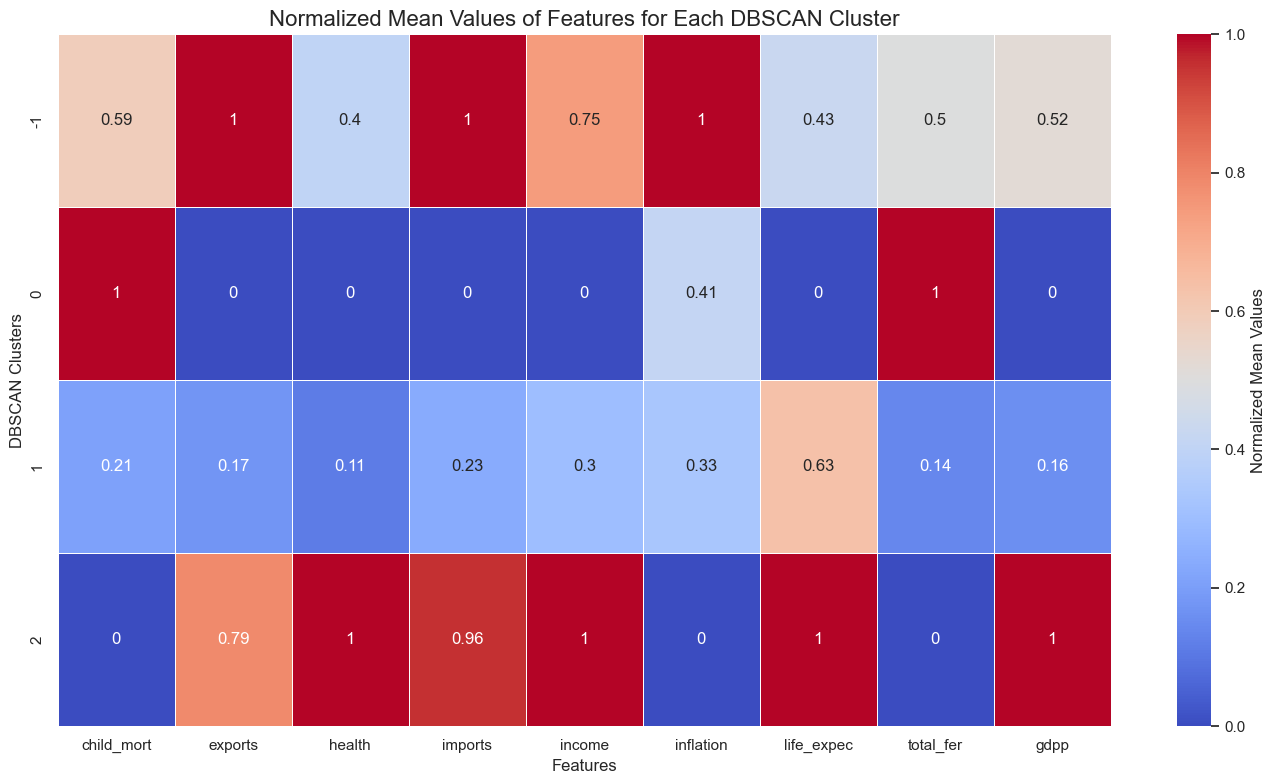

In [303]:
# Normalizar los promedios con rango [0, 1] usando MinMaxScaler
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_grouped_dbscan), columns=df_grouped_dbscan.columns, index=df_grouped_dbscan.index)

# Configurar plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Heatmap
sns.heatmap(df_normalized, annot=True, cmap="coolwarm", linewidths=0.5, cbar_kws={'label': 'Normalized Mean Values'})

# Título y labels
plt.title('Normalized Mean Values of Features for Each DBSCAN Cluster', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('DBSCAN Clusters', fontsize=12)

# Plot
plt.tight_layout()
plt.show()

Resumen DBSCAN

In [304]:
# Países juntos en cada cluster DBSCAN
countries_by_cluster_ok = df_4_pca_dbscan.groupby('dbscan_cluster')['country'].apply(list).reset_index()

# Número de países por cluster
cluster_counts = df_4_pca_dbscan['dbscan_cluster'].value_counts().sort_index()

# Número total de países
total_countries = df_4_pca_dbscan['country'].nunique()

# Porcentaje de países en cada cluster
cluster_percentages = (cluster_counts / total_countries) * 100

# DataFrame resumen
cluster_summary = pd.DataFrame({
    'Cluster': cluster_counts.index,
    'Number of Countries': cluster_counts.values,
    'Percentage (%)': cluster_percentages.values
})

# Países agrupados
print(countries_by_cluster_ok)

# Tabla resumen
print(cluster_summary)

   dbscan_cluster                                            country
0              -1  [Angola, Bahrain, Belgium, Botswana, Brunei, C...
1               0  [Afghanistan, Benin, Burkina Faso, Burundi, Ca...
2               1  [Albania, Algeria, Antigua and Barbuda, Argent...
3               2  [Australia, Austria, Canada, Finland, France, ...
   Cluster  Number of Countries  Percentage (%)
0       -1                   42       25.149701
1        0                   26       15.568862
2        1                   86       51.497006
3        2                   13        7.784431


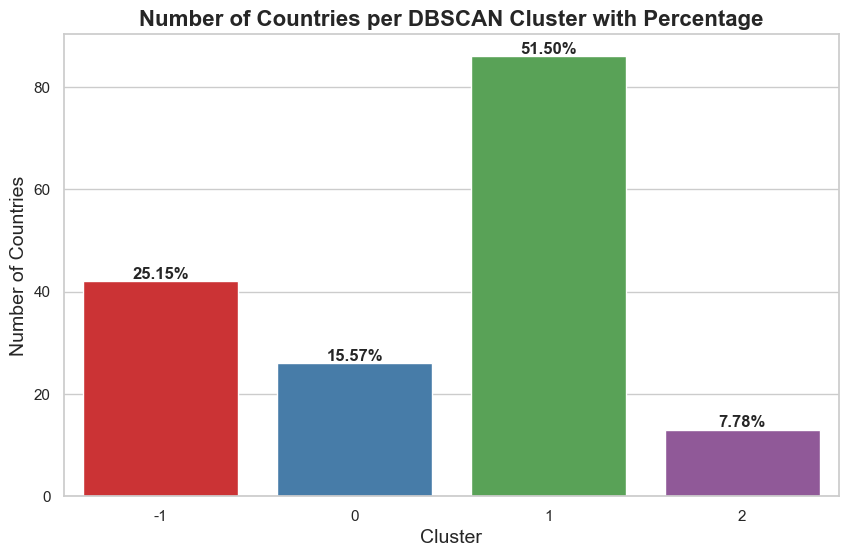

In [305]:
# Plot de países en cada cluster DBSCAN
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_summary['Cluster'],
            y=cluster_summary['Number of Countries'],
            palette='Set1')

# Porcentajes
for index, value in enumerate(cluster_summary['Number of Countries']):
    percentage = cluster_summary['Percentage (%)'].iloc[index]
    plt.text(index, value + 0.5, f'{percentage:.2f}%', ha='center', fontsize=12, weight='bold')

# Labels y títulos
plt.title('Number of Countries per DBSCAN Cluster with Percentage', fontsize=16, weight='bold')
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Number of Countries', fontsize=14)

plt.show()



Los resultados de los clústeres generados por DBSCAN revelan:

* El cluster -1 representa principalmente puntos considerados como ruido, con un nivel medio de mortalidad infantil (47.74), alto ingreso (29,601.09) y un PIB per cápita elevado (24,063.74), lo que sugiere países con características mixtas que no encajan en otros clústeres. 

* El clúster 0 agrupa a países con la más alta mortalidad infantil (87.26), bajo ingreso (1,974.31), baja esperanza de vida (59.32) y un PIB per cápita muy bajo (913.31), lo que sugiere que son países con mayores necesidades. 

* El clúster 1 presenta niveles relativamente bajos de mortalidad infantil (14.32), un ingreso medio-alto (15,722.58) y una esperanza de vida de 75.14, indicando un nivel intermedio de desarrollo. 

* El clúster 2 muestra características similares a las del clúster 1, pero con un nivel de ingresos y PIB per cápita ligeramente inferiores. 

* Por último, el clúster 3 agrupa a países con muy baja mortalidad infantil (3.96), alto ingreso (40,512.50), baja inflación (1.69) y la más alta esperanza de vida (81.10), representando a países con mayor desarrollo socioeconómico. 

* Aunque sabemos que hay outliers en el grupo -1 que son países con indicadores socioeconómicos malos y que muy probablemente necesiten ayuda, en este ejercicio nos enfocamos en los resultados directos de la agrupación algorítmica y los resultados estadísticos derivados de ello. **Por tanto, nos interesa aquí el cluster 0**. 


#### Conclusión DBSCAN

In [306]:
# Nuevo DF países que necesitan ayuda urgente.

# Criterios:

# 1. Escogemos solo países en el cluster 0  

df_cluster_0_dbscan = df_4_pca_dbscan[df_4_pca_dbscan['dbscan_cluster'] == 0]

In [307]:
df_cluster_0_dbscan

desarrollo_eco  bienestar_dispar  inflación  gasto_salud  \
country                                                                   
Afghanistan         -2.635575          1.472267  -0.549489     0.242326   
Benin               -2.363962          1.171696  -1.247192     0.257106   
Burkina Faso        -2.751480          1.664991  -0.848207     0.345046   
Burundi             -2.762440          1.628790  -0.299329     0.309938   
Cameroon            -2.438923          1.288278  -1.226104     0.226851   
Comoros             -1.949130          0.606917  -0.774798     0.093182   
Cote d'Ivoire       -2.572195          1.497963  -0.955701     0.244931   
Eritrea             -1.948339          0.496371  -0.039610    -0.052654   
Gambia              -2.104642          0.826788  -0.762354     0.201412   
Ghana               -2.001961          0.753168   0.373761    -0.000606   
Guinea              -2.712585          1.614803   0.041301     0.242720   
Guinea-Bissau       -2.608159          1.406872  -1.195769     0.215629   
Kenya               -1.736918          0.285212  -0.879188    -0.047357   
Kiribati            -1.666835          0.238469  -0.966425    -0.107329   
Liberia             -2.257865          0.935414  -0.767234     0.117441   
Madagascar          -1.996653          0.557492  -0.338898    -0.036964   
Malawi              -2.708924          1.498580  -0.357332     0.157729   
Mali                -2.944260          2.010103  -1.142610     0.521593   
Mozambique          -2.730326          1.546608  -0.780421     0.225255   
Namibia             -1.334642          0.417998  -0.760210    -0.098511   
Rwanda              -1.748039          0.262548  -0.813253    -0.022774   
Senegal             -1.862076          0.497110  -0.930076     0.067818   
Tanzania            -2.277293          1.008862  -0.405609     0.132370   
Togo                -2.243462          0.906540  -1.191994     0.096680   
Uganda              -2.620955          1.463192  -0.415173     0.262782   
Zambia              -2.644505          1.571953  -0.174685     0.178965   

               dbscan_cluster        country  
country                                       
Afghanistan                 0    Afghanistan  
Benin                       0          Benin  
Burkina Faso                0   Burkina Faso  
Burundi                     0        Burundi  
Cameroon                    0       Cameroon  
Comoros                     0        Comoros  
Cote d'Ivoire               0  Cote d'Ivoire  
Eritrea                     0        Eritrea  
Gambia                      0         Gambia  
Ghana                       0          Ghana  
Guinea                      0         Guinea  
Guinea-Bissau               0  Guinea-Bissau  
Kenya                       0          Kenya  
Kiribati                    0       Kiribati  
Liberia                     0        Liberia  
Madagascar                  0     Madagascar  
Malawi                      0         Malawi  
Mali                        0           Mali  
Mozambique                  0     Mozambique  
Namibia                     0        Namibia  
Rwanda                      0         Rwanda  
Senegal                     0        Senegal  
Tanzania                    0       Tanzania  
Togo                        0           Togo  
Uganda                      0         Uganda  
Zambia                      0         Zambia

In [308]:
# 2. Se priorizan los 5 que tengan las peores condiciones según los componentes principales analizados. O sea, el más bajo desarrollo_eco, más alto bienestar_dispar, la más alta inflación y menor gasto_salud: 


# Function to create and sort a DataFrame for a specific PC
def create_sorted_df(df, pc):
    df_sorted = df[['dbscan_cluster', 'country', pc]].sort_values(['dbscan_cluster', pc], ascending=[True, False])
    df_sorted = df_sorted.reset_index(drop=True)
    return df_sorted

# Create four DataFrames for each Principal Component
df_pc1 = create_sorted_df(df_cluster_0_dbscan, 'desarrollo_eco')
df_pc2 = create_sorted_df(df_cluster_0_dbscan, 'bienestar_dispar')
df_pc3 = create_sorted_df(df_cluster_0_dbscan, 'inflación')
df_pc4 = create_sorted_df(df_cluster_0_dbscan, 'gasto_salud')

# Display the DataFrames
print("DataFrame for Desarollo Económico:")
print(df_pc1.to_string(index=False))
print("\nDataFrame for Bienestar y Disparidad:")
print(df_pc2.to_string(index=False))
print("\nDataFrame for Inflación:")
print(df_pc3.to_string(index=False))
print("\nDataFrame for Gasto Salud:")
print(df_pc4.to_string(index=False))

DataFrame for Desarollo Económico:
 dbscan_cluster       country  desarrollo_eco
              0       Namibia       -1.334642
              0      Kiribati       -1.666835
              0         Kenya       -1.736918
              0        Rwanda       -1.748039
              0       Senegal       -1.862076
              0       Eritrea       -1.948339
              0       Comoros       -1.949130
              0    Madagascar       -1.996653
              0         Ghana       -2.001961
              0        Gambia       -2.104642
              0          Togo       -2.243462
              0       Liberia       -2.257865
              0      Tanzania       -2.277293
              0         Benin       -2.363962
              0      Cameroon       -2.438923
              0 Cote d'Ivoire       -2.572195
              0 Guinea-Bissau       -2.608159
              0        Uganda       -2.620955
              0   Afghanistan       -2.635575
              0        Zambia       -2.644505

In [309]:
# Desarrollo eco: los 5 más bajos
lowest_5_pc1 = df_pc1.nsmallest(5, 'desarrollo_eco')

# Bienestar y disparidad: los más altos
highest_5_pc2 = df_pc2.nlargest(5, 'bienestar_dispar')

# Inflación: los 5 más altos
highest_5_pc3 = df_pc3.nlargest(5, 'inflación')

# Gasto en salud: los 5 más bajos
lowest_5_pc4 = df_pc4.nsmallest(5, 'gasto_salud')

# Combinar todos los DataFrames seleccionados
df__prioridad_dbscan = pd.concat([lowest_5_pc1, highest_5_pc2, highest_5_pc3, lowest_5_pc4])

# Resetear el índice si es necesario
#nuevo_df = nuevo_df.reset_index(drop=True)


df__prioridad_dbscan

dbscan_cluster       country  desarrollo_eco  bienestar_dispar  inflación  \
25               0          Mali       -2.944260               NaN        NaN   
24               0       Burundi       -2.762440               NaN        NaN   
23               0  Burkina Faso       -2.751480               NaN        NaN   
22               0    Mozambique       -2.730326               NaN        NaN   
21               0        Guinea       -2.712585               NaN        NaN   
0                0          Mali             NaN          2.010103        NaN   
1                0  Burkina Faso             NaN          1.664991        NaN   
2                0       Burundi             NaN          1.628790        NaN   
3                0        Guinea             NaN          1.614803        NaN   
4                0        Zambia             NaN          1.571953        NaN   
0                0         Ghana             NaN               NaN   0.373761   
1                0        Guinea             NaN               NaN   0.041301   
2                0       Eritrea             NaN               NaN  -0.039610   
3                0        Zambia             NaN               NaN  -0.174685   
4                0       Burundi             NaN               NaN  -0.299329   
25               0      Kiribati             NaN               NaN        NaN   
24               0       Namibia             NaN               NaN        NaN   
23               0       Eritrea             NaN               NaN        NaN   
22               0         Kenya             NaN               NaN        NaN   
21               0    Madagascar             NaN               NaN        NaN   

    gasto_salud  
25          NaN  
24          NaN  
23          NaN  
22          NaN  
21          NaN  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
25    -0.107329  
24    -0.098511  
23    -0.052654  
22    -0.047357  
21    -0.036964

In [310]:
# 3. Selección de los países que más aparecen en los "peores condiciones" 
df__prioridad_dbscan['country'].value_counts()

country
Burundi         3
Guinea          3
Mali            2
Burkina Faso    2
Zambia          2
Eritrea         2
Mozambique      1
Ghana           1
Kiribati        1
Namibia         1
Kenya           1
Madagascar      1
Name: count, dtype: int64

In [311]:
# los 5 primeros países que más aparecen en los "peores condiciones" 
sele_ayuda_dbscan = ['Burundi', 'Guinea', 'Burkina Faso', 'Mali', 'Eritrea', 'Zambia']

# DataFrame
df_sele_ayuda_dbscan = df_clean[df_clean['country'].isin(sele_ayuda_dbscan)]

# Choropleth 
fig = px.choropleth(df_sele_ayuda_dbscan, 
                    locations='country',
                    locationmode='country names', 
                    color= 'country',
                    hover_name='country',
                    hover_data= df_sele_ayuda_dbscan.columns,
                    projection='albers', 
                    title='Los 6 países que necesitan ayuda urgente según DBSCAN + PCA')

fig.show()

### Agglomerative Hierachical Clustering (AHC)

AHC es el método más común de los métodos jeráquicos de agrupamiento. Éste forma una jerarquía de grupos mediante un enfoque ascendente (bottom-up)  y también es conocido como Agglomerative Nesting - AGNES (Kassambara,2018). Su inverso es el clustering por Divisive Analysis  - DIANA (ibid.). AHC o AGNES es útil para detectar clusters pequeños y DIANA para clusters grandes (ibid.). Los métodos jerárquicos de agrupamiento se han ido desarrollando desde los 1950. 


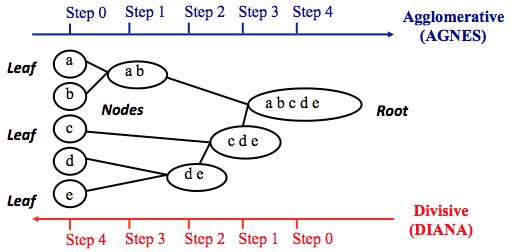 

Tomado de (Kassambara, 2018).


En resumen, la agrupación jerárquica aglomerativa comienza tratando a cada país como su propio clúster (leaves). Luego fusiona iterativamente los pares de clústeres más cercanos (nodes) hasta que todos los países estén en un solo clúster (root) o hasta que se alcance un número predefinido de grupos. Esto resulta en un dendograma, una representación visual de árbol (invertido) que se vuelve una herramienta interpretativa sobre un sistema de clasificación.

Pasos generales:

1. Inicialización: Si hay n puntos de datos, habrá inicialmente n clústeres, cada uno con un solo punto.

2. Cálculo de la Matriz de Distancias: Se calcula una matriz de distancias que mide la similitud (o disimilitud) entre cada par de clústeres utilizando una métrica de distancia (p.ej., distancia euclidiana).

3. Fusión de Clústeres más Cercanos: Se identifican los dos clústeres que tienen la menor distancia (es decir, los más similares entre sí) y se fusionan en un nuevo clúster. La fusión de clústeres reduce el número total de clústeres en uno.

4. Actualización de la Matriz de Distancias: Se recalcula la matriz de distancias para reflejar las distancias entre el nuevo clúster y los clústeres restantes. Esto se hace utilizando uno de los siguientes criterios de enlace:

 - Enlace completo: La distancia máxima entre puntos de diferentes clústeres (puntos más lejanos).

 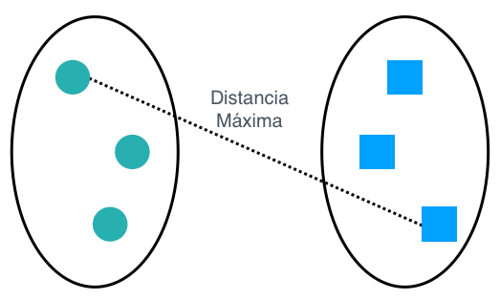 

 - Enlace simple: La distancia mínima entre puntos de diferentes clústeres (puntos más cercanos).

 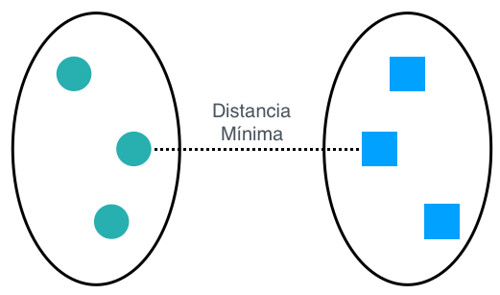
    
 - Enlace promedio: La distancia promedio entre puntos de diferentes clústeres.

 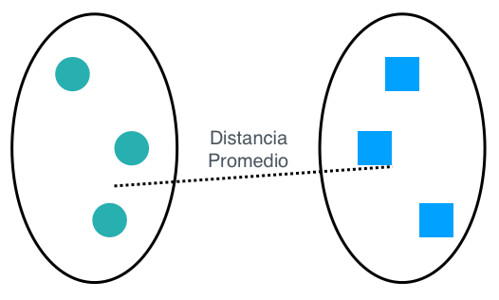

 - Enlace centroide: La distancia entre los centroides de los clústeres.

 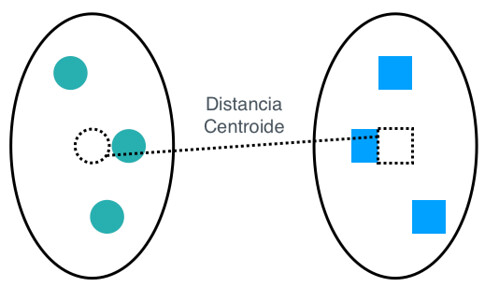 

 - Método de Ward.

 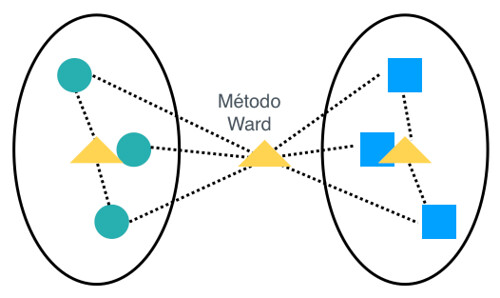  

 Imágenes tomadas de (Gonzalez, 2020). 

5. Repetición del Proceso: Se repiten los pasos 3 y 4, fusionando clústeres en cada iteración, hasta que solo quede un único clúster que contenga todos los puntos de datos, o hasta alcanzar un número predefinido de clústeres.

6. Dendrograma: Los resultados del proceso de fusión se representan mediante un dendrograma, que es un gráfico que muestra las uniones entre clústeres y la distancia a la que se realiza cada fusión. Este gráfico permite identificar la estructura jerárquica de los clústeres.

7. Selección de Clústeres: Para determinar el número óptimo de clústeres, se corta el dendrograma a una cierta altura, lo que define los grupos finales. Esto puede basarse en la mayor distancia vertical sin fusión (corte en el "codo" del dendrograma) o en un número predefinido de clústeres deseados.

#### Selección de enlance

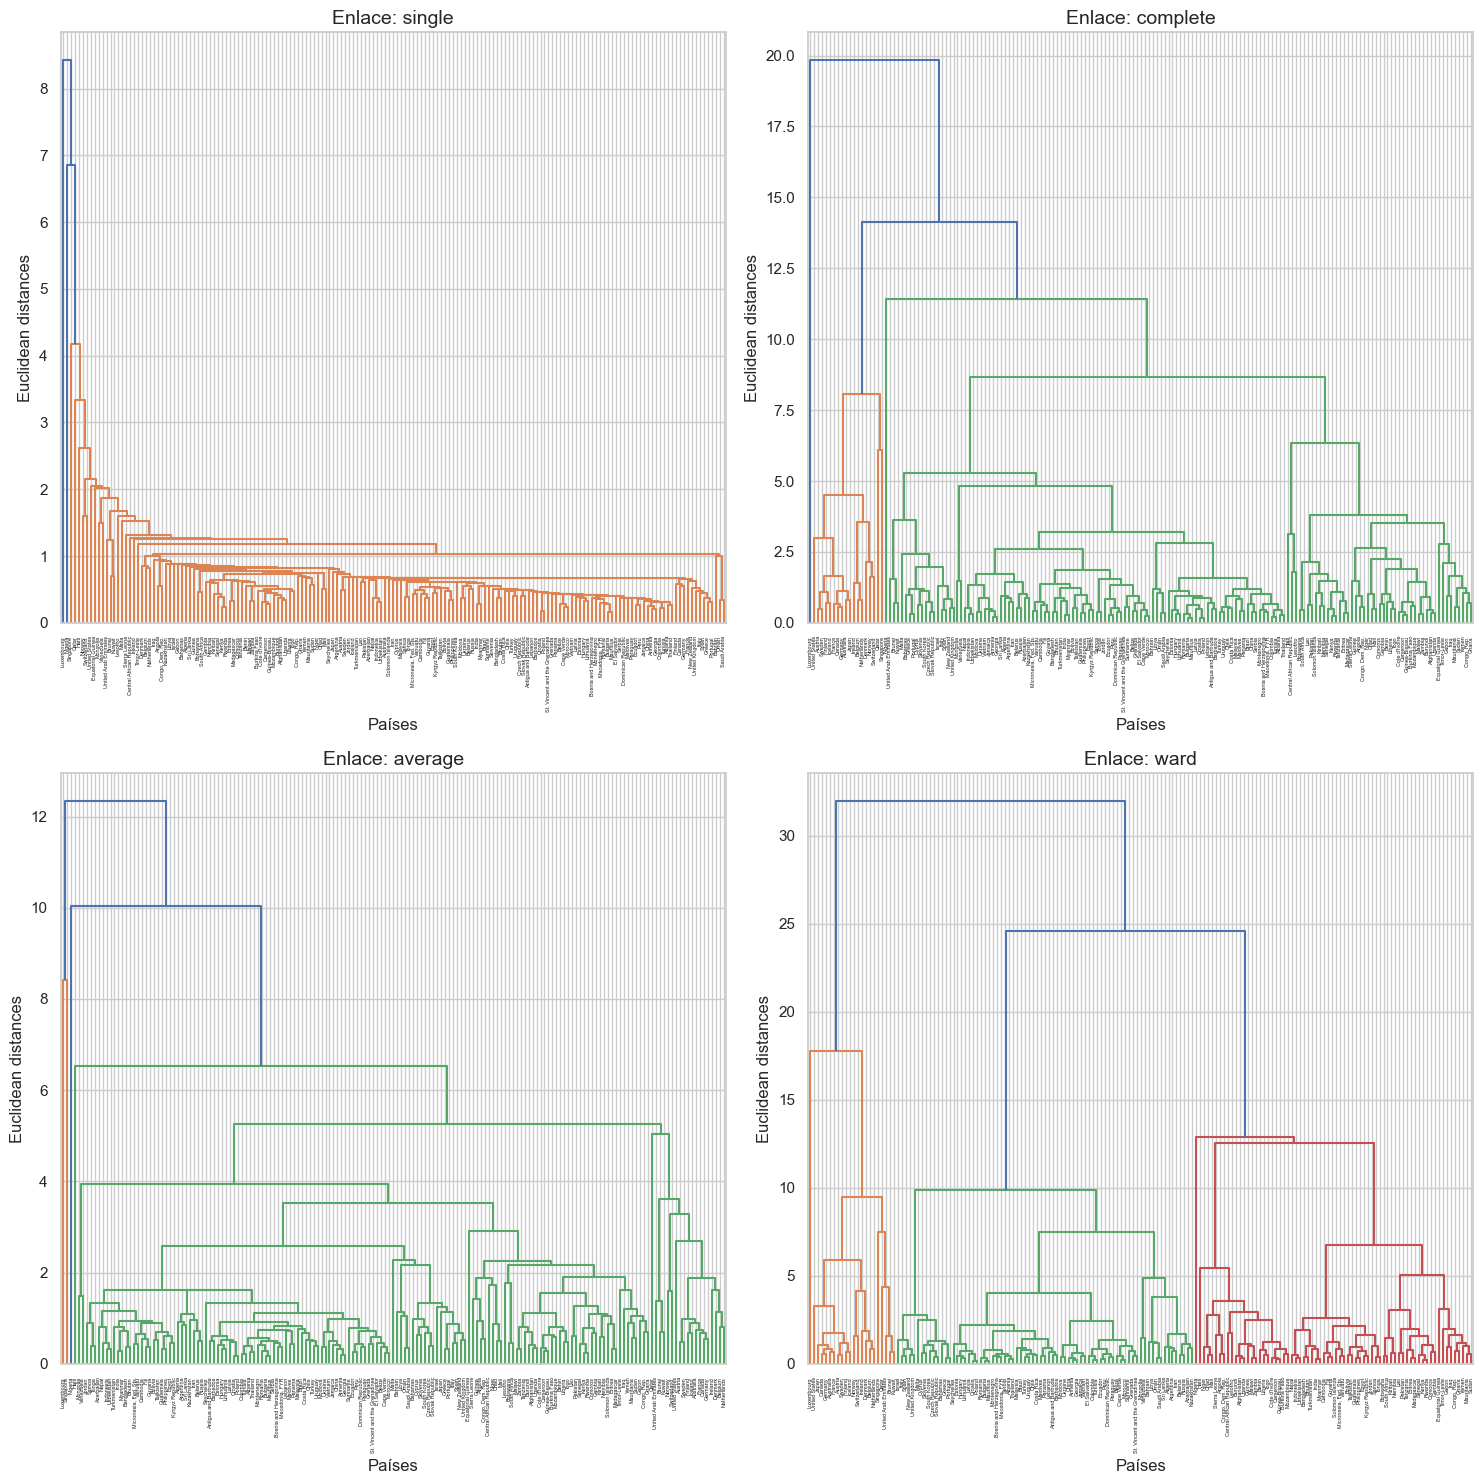

In [312]:
# Nota: el método de centroides no está directamente disponible en sklearn para la agrupación aglomerativa
linkage_methods = ['single', 'complete', 'average', 'ward']

# Crear subplots para visualizar todos los dendrogramas
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.flatten()

for i, method in enumerate(linkage_methods):
    Z = linkage(df_clean_scaled, method=method)
    axes[i].set_title(f'Enlace: {method}', fontsize=14)
    axes[i].set_xlabel('Países') 
    axes[i].set_ylabel('Euclidean distances')  
    
    dendrogram(Z, ax=axes[i], labels= df_clean_scaled.index, leaf_rotation=90, leaf_font_size=4)

# Ajustar el último subplot vacío si hay un número impar de métodos
if len(linkage_methods) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


In [313]:
# Evaluar cada método con AgglomerativeClustering y calcular el coeficiente de silueta

for method in linkage_methods:
    clustering = AgglomerativeClustering(linkage=method, n_clusters=4)  # Ajusta el número de clusters
    labels = clustering.fit_predict(df_clean_scaled)
    silhouette_avg = silhouette_score(df_clean_scaled, labels)
    print(f'Método: {method}, Coeficiente de Silueta: {silhouette_avg}')


Método: single, Coeficiente de Silueta: 0.5857802788378672
Método: complete, Coeficiente de Silueta: 0.4833975964209095
Método: average, Coeficiente de Silueta: 0.5857802788378672
Método: ward, Coeficiente de Silueta: 0.35429357393844646


Decido usar el método de **enlace ward** a pesar de que tiene el coeficiente de silueta más bajo (0.35) en comparación con los otros métodos. Su enfoque en minimizar la varianza dentro de cada clúster es adecuado para crear grupos más compactos y homogéneos (también se ven en la comparativa de dendogramas). O sea, para que los países dentro de cada clúster sean lo más parecidos entre sí. 

Aunque el coeficiente de silueta más bajo sugiere una menor separación entre los clústeres, considero que la homogeneidad interna que proporciona el método ward es prioritaria para interpretar los resultados y reflejar la diversidad de los datos.

#### Valor óptimo de clusters

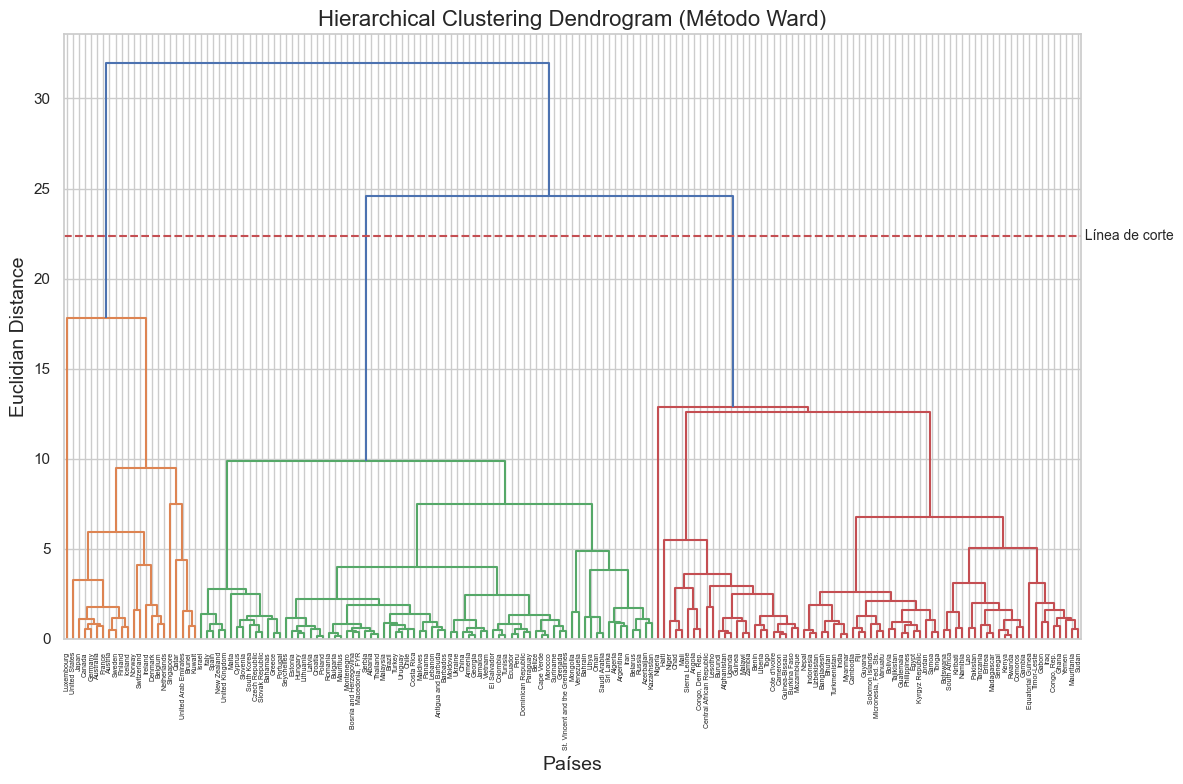

Número de clusters: 3


In [314]:

# Crear el dendrograma
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=df_clean_scaled.index, leaf_rotation=90, leaf_font_size=5)
plt.title('Hierarchical Clustering Dendrogram (Método Ward)', fontsize=16)
plt.xlabel('Países', fontsize=14)
plt.ylabel('Euclidian Distance', fontsize=14)
plt.grid(True)

# Detectar el punto de corte
max_d = 0.7 * max(Z[:, 2])  # Por ejemplo, 70% de la distancia máxima
plt.axhline(y=max_d, c='r', linestyle='--')

# Añadir una leyenda para la línea de corte
plt.text(plt.xlim()[1], max_d, ' Línea de corte', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Opcional: obtener los clusters basados en el punto de corte
clusters = fcluster(Z, max_d, criterion='distance')
print(f"Número de clusters: {len(np.unique(clusters))}")

#### Clustering

In [315]:
# Inicialización del algoritmo

n_clusters = 3
agglo = AgglomerativeClustering(n_clusters=n_clusters)
agglo_labels = agglo.fit_predict(df_scaled)

In [316]:
# # Labels al DF copia del original
df_ahc = df_dbscan.copy()
df_ahc ['ahc_cluster'] = agglo_labels  

# Labels al DF copia del PCA (con los 4 componentes identificados) 

df_4_pca_ahc= df_4_pca.copy()
df_4_pca_ahc['ahc_cluster'] =df_ahc ['ahc_cluster']
df_4_pca_ahc['country']= df_dbscan.index


In [317]:
df_ahc

child_mort   exports    health   imports    income  \
country                                                                   
Afghanistan            1.291532 -0.411011 -0.565040 -0.432276 -0.808245   
Albania               -0.538949 -0.350191 -0.439218 -0.313677 -0.375369   
Algeria               -0.272833 -0.318526 -0.484826 -0.353720 -0.220844   
Angola                 2.007808 -0.291375 -0.532363 -0.345953 -0.585043   
Antigua and Barbuda   -0.695634 -0.104331 -0.178771  0.040735  0.101732   
...                         ...       ...       ...       ...       ...   
Vanuatu               -0.225578 -0.336864 -0.501562 -0.342488 -0.738527   
Venezuela             -0.526514 -0.199393 -0.219310 -0.287205 -0.033542   
Vietnam               -0.372315 -0.361463 -0.538488 -0.377572 -0.658404   
Yemen                  0.448417 -0.392166 -0.550596 -0.418479 -0.658924   
Zambia                 1.114951 -0.383952 -0.540498 -0.418445 -0.721358   

                     inflation  life_expec  total_fer      gdpp  cluster  \
country                                                                    
Afghanistan           0.157336   -1.619092   1.902882 -0.679180        0   
Albania              -0.312347    0.647866  -0.859973 -0.485623        2   
Algeria               0.789274    0.670423  -0.038404 -0.465376        2   
Angola                1.387054   -1.179234   2.128151 -0.516268        0   
Antigua and Barbuda  -0.601749    0.704258  -0.541946 -0.041817        2   
...                        ...         ...        ...       ...      ...   
Vanuatu              -0.489784   -0.852161   0.365754 -0.546913        2   
Venezuela             3.616865    0.546361  -0.316678  0.029323        2   
Vietnam               0.409732    0.286958  -0.661206 -0.637754        2   
Yemen                 1.500916   -0.344633   1.140944 -0.637754        0   
Zambia                0.590015   -2.092785   1.624609 -0.629546        0   

                     dbscan_cluster  ahc_cluster  
country                                           
Afghanistan                       0            1  
Albania                           1            2  
Algeria                           1            2  
Angola                           -1            1  
Antigua and Barbuda               1            2  
...                             ...          ...  
Vanuatu                           1            1  
Venezuela                        -1            2  
Vietnam                           1            2  
Yemen                            -1            1  
Zambia                            0            1  

[167 rows x 12 columns]

In [318]:
df_4_pca_ahc

desarrollo_eco  bienestar_dispar  inflación  gasto_salud  \
country                                                                         
Afghanistan               -2.635575          1.472267  -0.549489     0.242326   
Albania                   -0.024206         -1.429892  -0.014123    -0.450645   
Algeria                   -0.459557         -0.675495   0.959355    -0.218456   
Angola                    -2.722630          2.172332   0.600215     0.433978   
Antigua and Barbuda        0.648597         -1.023437  -0.257430    -0.289201   
...                             ...               ...        ...          ...   
Vanuatu                   -1.175210         -0.275652  -0.667131    -0.279628   
Venezuela                 -0.314228         -0.016266   3.680273    -0.011835   
Vietnam                   -0.594449         -1.076335   0.528875    -0.508854   
Yemen                     -1.802372          0.588729   1.180851     0.020241   
Zambia                    -2.644505          1.571953  -0.174685     0.178965   

                     ahc_cluster              country  
country                                                
Afghanistan                    1          Afghanistan  
Albania                        2              Albania  
Algeria                        2              Algeria  
Angola                         1               Angola  
Antigua and Barbuda            2  Antigua and Barbuda  
...                          ...                  ...  
Vanuatu                        1              Vanuatu  
Venezuela                      2            Venezuela  
Vietnam                        2              Vietnam  
Yemen                          1                Yemen  
Zambia                         1               Zambia  

[167 rows x 6 columns]

In [319]:
# Conteo acumulado de países por label de cluster AHC
print(df_ahc['ahc_cluster'].value_counts())

ahc_cluster
2    75
1    70
0    22
Name: count, dtype: int64


#### Vis. de AHC + PCA


##### 2D


In [320]:
# 2D Scatter plot
fig = px.scatter(df_4_pca_ahc, x='desarrollo_eco', y='bienestar_dispar', color='ahc_cluster',
                 hover_name=df_4_pca_ahc.index,  # This will show country names on hover
                 labels={'PC1': 'Desarrollo Económico', 'PC2': 'Bienestar y Disparidad'},
                 title='AHC Clustering con PCA (primeras 2 componentes)')


# Update marker properties for data points
fig.update_traces(marker=dict(size=7, line=dict(width=1, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))


# Show the plot
fig.show()

##### 3D


In [321]:
# 3D scatter plot for AHC clusters
fig_dbscan = px.scatter_3d(df_4_pca_ahc,
                          x='desarrollo_eco',
                          y='bienestar_dispar',
                          z='inflación',
                          color='ahc_cluster',
                          hover_name='country',  # Shows country names on hover
                          title="AHC Clustering con PCA (primeras 3 componentes)",
                          labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
                          template='plotly_dark')

# Update marker properties for data points
fig_dbscan.update_traces(marker=dict(size=6, line=dict(width=1, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

# Show the interactive 3D plot for DBSCAN
fig_dbscan.show()

##### Choropleth


In [322]:
fig = px.choropleth(df_4_pca_ahc,
                    locations='country',
                    locationmode='country names', 
                    color='ahc_cluster', 
                    hover_name='country', 
                    color_continuous_scale='Viridis',
                    title='Clusters by Country AHC')


# Customize the color bar
fig.update_coloraxes(
    colorbar_title= None ,  # Change the title of the color bar
    colorbar_tickvals=[0, 1, 2],  # Adjust tick values if you know the clusters range
    colorbar_ticktext=['Cluster 0', 'Cluster 1', 'Cluster 2'],  # Add custom labels
    colorbar_len=0.5,  # Adjust the length of the color bar (0.5 means half the length)
    colorbar_thickness=5  # Adjust the thickness of the color bar
)


fig.show()

In [323]:
df_ahc['ahc_cluster']


country
Afghanistan            1
Albania                2
Algeria                2
Angola                 1
Antigua and Barbuda    2
                      ..
Vanuatu                1
Venezuela              2
Vietnam                2
Yemen                  1
Zambia                 1
Name: ahc_cluster, Length: 167, dtype: int64

In [324]:
# Agrupación de data por cluster después de AHC y promedio de cada característica (en términos reales, no escalados)

numeric_cols = df_clean.select_dtypes(include=[np.number])

numeric_cols['ahc_cluster'] = agglo_labels

df_grouped_ahc = numeric_cols.groupby('ahc_cluster').mean()

print(df_grouped_ahc)

             child_mort       exports       health       imports  \
ahc_cluster                                                        
0              5.077273  35604.322727  4727.385455  28787.290909   
1             74.984286    871.003679   118.028773    928.270030   
2             13.740000   5266.373200   856.132680   5359.406667   

                   income  inflation  life_expec  total_fer          gdpp  
ahc_cluster                                                                
0            54800.000000   3.308727   80.427273   1.800000  52554.545455  
1             4328.471429  10.488071   62.241429   4.374429   2022.628571  
2            18060.933333   6.568120   75.420000   1.953333  11563.066667  


Identificación visual de grupos AHC con características promedio normalizadas:

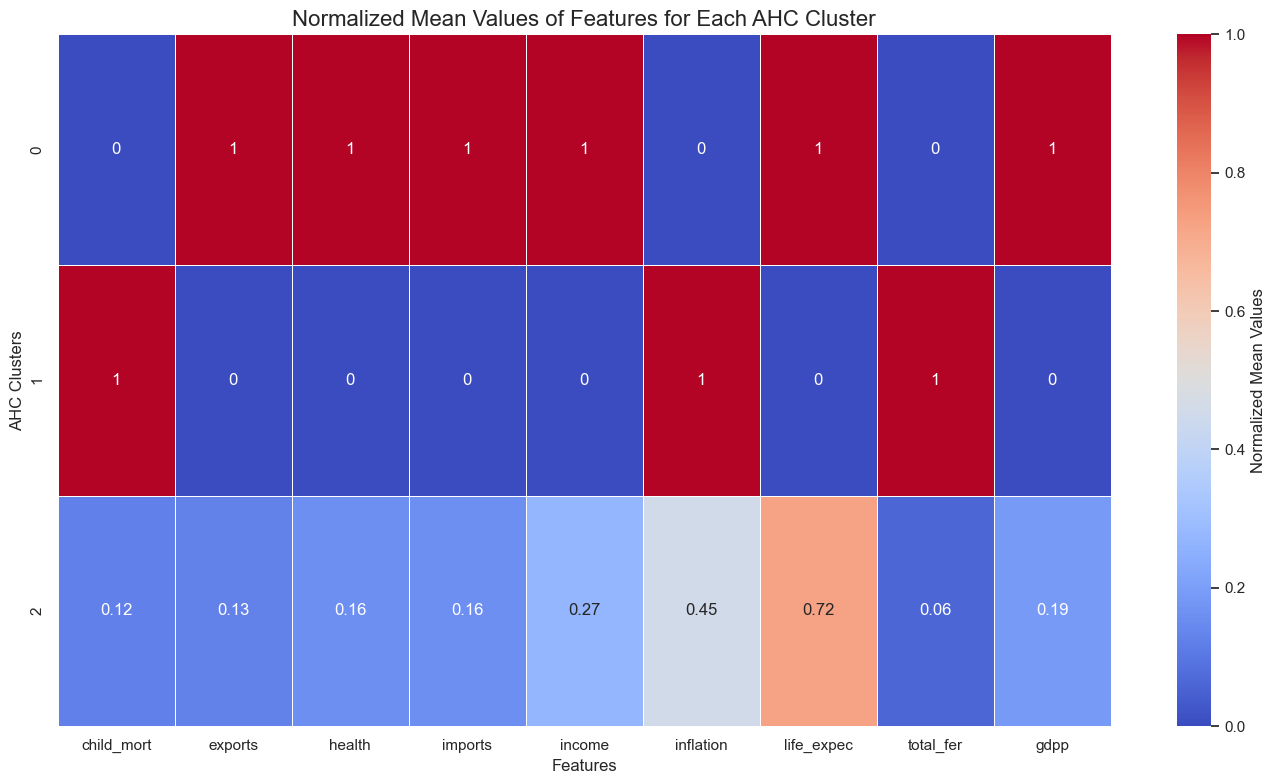

In [325]:
# Normalizar los promedios con rango [0, 1] usando MinMaxScaler
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_grouped_ahc), columns=df_grouped_ahc.columns, index=df_grouped_ahc.index)

# Configurar plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Heatmap
sns.heatmap(df_normalized, annot=True, cmap="coolwarm", linewidths=0.5, cbar_kws={'label': 'Normalized Mean Values'})

# Título y labels
plt.title('Normalized Mean Values of Features for Each AHC Cluster', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('AHC Clusters', fontsize=12)

# Plot
plt.tight_layout()
plt.show()

Resumen AHC

In [326]:
# Países juntos en cada cluster AHC
countries_by_cluster_ok = df_4_pca_ahc.groupby('ahc_cluster')['country'].apply(list).reset_index()

# Número de países por cluster
cluster_counts = df_4_pca_ahc['ahc_cluster'].value_counts().sort_index()

# Número total de países
total_countries = df_4_pca_ahc['country'].nunique()

# Porcentaje de países en cada cluster
cluster_percentages = (cluster_counts / total_countries) * 100

# DataFrame resumen
cluster_summary = pd.DataFrame({
    'Cluster': cluster_counts.index,
    'Number of Countries': cluster_counts.values,
    'Percentage (%)': cluster_percentages.values
})

# Países agrupados
print(countries_by_cluster_ok)

# Tabla resumen
print(cluster_summary)

   ahc_cluster                                            country
0            0  [Australia, Austria, Belgium, Brunei, Canada, ...
1            1  [Afghanistan, Angola, Bangladesh, Benin, Bhuta...
2            2  [Albania, Algeria, Antigua and Barbuda, Argent...
   Cluster  Number of Countries  Percentage (%)
0        0                   22       13.173653
1        1                   70       41.916168
2        2                   75       44.910180


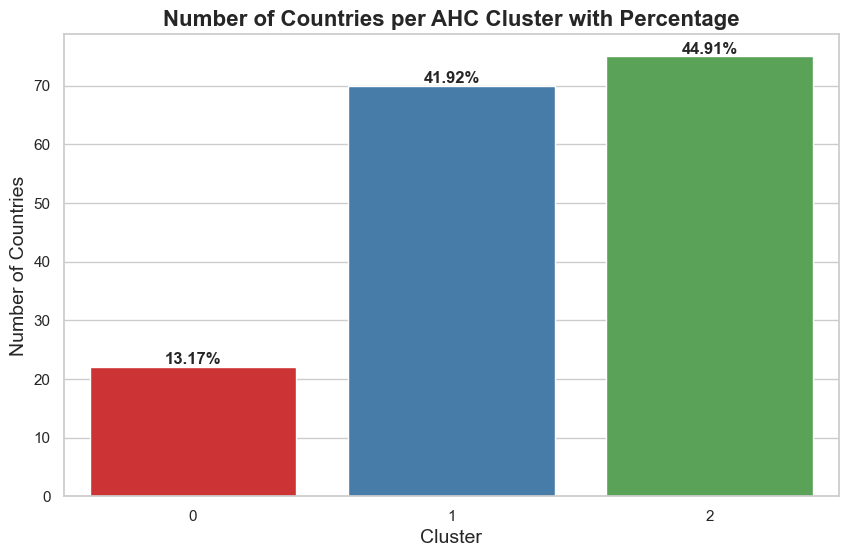

In [327]:
# Plot de países en cada cluster AHC
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_summary['Cluster'],
            y=cluster_summary['Number of Countries'],
            palette='Set1')

# Porcentajes
for index, value in enumerate(cluster_summary['Number of Countries']):
    percentage = cluster_summary['Percentage (%)'].iloc[index]
    plt.text(index, value + 0.5, f'{percentage:.2f}%', ha='center', fontsize=12, weight='bold')

# Labels y títulos
plt.title('Number of Countries per AHC Cluster with Percentage', fontsize=16, weight='bold')
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Number of Countries', fontsize=14)

plt.show()

Basado en el clustering AHC:

Cluster 0:
- Tiene la mortalidad infantil más baja (5.077)
- Los niveles más altos de exportaciones e importaciones
- El gasto en salud más alto
- El ingreso más alto y el PIB per cápita más alto
- La inflación más baja
- La esperanza de vida más alta
- La tasa de fertilidad más baja

Este cluster agrupa a países desarrollados con economías fuertes, sistemas de salud avanzados y alta calidad de vida.

Cluster 1:
- Tiene la mortalidad infantil más alta (74.984286)
- Los niveles más bajos de exportaciones e importaciones
- El gasto en salud más bajo
- El ingreso más bajo y el PIB per cápita más bajo
- La inflación más alta
- La esperanza de vida más baja
- La tasa de fertilidad más alta

Este cluster representa países con severos desafíos económicos y de salud significativos.

Cluster 2:
- Tiene valores intermedios en la mayoría de los indicadores
- Niveles moderados de exportaciones e importaciones
- Gasto en salud, ingresos y PIB per cápita intermedios
- Inflación moderada
- Esperanza de vida y tasa de fertilidad intermedias

Este cluster representa países en una etapa intermedia de desarrollo o economías emergentes.

**De aquí nos interesa el cluster 1**.

#### Conclusión AHC

In [328]:
# Nuevo DF países que necesitan ayuda urgente.

# Criterios:

# 1. Escogemos solo países en el cluster 1  

df_cluster_1_ahc = df_4_pca_ahc[df_4_pca_ahc['ahc_cluster'] == 1]

In [329]:
df_cluster_1_ahc

desarrollo_eco  bienestar_dispar  inflación  gasto_salud  \
country                                                                 
Afghanistan       -2.635575          1.472267  -0.549489     0.242326   
Angola            -2.722630          2.172332   0.600215     0.433978   
Bangladesh        -1.015167         -0.708743  -0.101817    -0.368131   
Benin             -2.363962          1.171696  -1.247192     0.257106   
Bhutan            -0.716048         -0.765607  -0.125975    -0.357155   
...                     ...               ...        ...          ...   
Uganda            -2.620955          1.463192  -0.415173     0.262782   
Uzbekistan        -1.031922         -0.561378   0.763442    -0.381828   
Vanuatu           -1.175210         -0.275652  -0.667131    -0.279628   
Yemen             -1.802372          0.588729   1.180851     0.020241   
Zambia            -2.644505          1.571953  -0.174685     0.178965   

             ahc_cluster      country  
country                                
Afghanistan            1  Afghanistan  
Angola                 1       Angola  
Bangladesh             1   Bangladesh  
Benin                  1        Benin  
Bhutan                 1       Bhutan  
...                  ...          ...  
Uganda                 1       Uganda  
Uzbekistan             1   Uzbekistan  
Vanuatu                1      Vanuatu  
Yemen                  1        Yemen  
Zambia                 1       Zambia  

[70 rows x 6 columns]

In [330]:
# 2. Se priorizan los 5 que tengan las peores condiciones según los componentes principales analizados. O sea, el más bajo desarrollo_eco, más alto bienestar_dispar, la más alta inflación y menor gasto_salud: 


# Function to create and sort a DataFrame for a specific PC
def create_sorted_df(df, pc):
    df_sorted = df[['ahc_cluster', 'country', pc]].sort_values(['ahc_cluster', pc], ascending=[True, False])
    df_sorted = df_sorted.reset_index(drop=True)
    return df_sorted

# Create four DataFrames for each Principal Component
df_pc1 = create_sorted_df(df_cluster_1_ahc, 'desarrollo_eco')
df_pc2 = create_sorted_df(df_cluster_1_ahc, 'bienestar_dispar')
df_pc3 = create_sorted_df(df_cluster_1_ahc, 'inflación')
df_pc4 = create_sorted_df(df_cluster_1_ahc, 'gasto_salud')

# Display the DataFrames
print("DataFrame for Desarollo Económico:")
print(df_pc1.to_string(index=False))
print("\nDataFrame for Bienestar y Disparidad:")
print(df_pc2.to_string(index=False))
print("\nDataFrame for Inflación:")
print(df_pc3.to_string(index=False))
print("\nDataFrame for Gasto Salud:")
print(df_pc4.to_string(index=False))

DataFrame for Desarollo Económico:
 ahc_cluster                  country  desarrollo_eco
           1                   Jordan       -0.523225
           1                   Bhutan       -0.716048
           1                     Fiji       -0.763106
           1                    Egypt       -0.837749
           1                Indonesia       -0.843318
           1                    Samoa       -0.849395
           1                    Tonga       -0.858313
           1                Guatemala       -0.858551
           1             Turkmenistan       -0.895220
           1              Philippines       -0.929805
           1                   Guyana       -0.932673
           1               Bangladesh       -1.015167
           1                  Bolivia       -1.018777
           1               Uzbekistan       -1.031922
           1        Equatorial Guinea       -1.052542
           1          Kyrgyz Republic       -1.091869
           1    Micronesia, Fed. Sts.       -1.

In [331]:
# Desarrollo eco: los 5 más bajos
lowest_5_pc1 = df_pc1.nsmallest(5, 'desarrollo_eco')

# Bienestar y disparidad: los más altos
highest_5_pc2 = df_pc2.nlargest(5, 'bienestar_dispar')

# Inflación: los 5 más altos
highest_5_pc3 = df_pc3.nlargest(5, 'inflación')

# Gasto en salud: los 5 más bajos
lowest_5_pc4 = df_pc4.nsmallest(5, 'gasto_salud')

# Combinar todos los DataFrames seleccionados
df__prioridad_ahc = pd.concat([lowest_5_pc1, highest_5_pc2, highest_5_pc3, lowest_5_pc4])

# Resetear el índice si es necesario
#nuevo_df = nuevo_df.reset_index(drop=True)


df__prioridad_ahc

ahc_cluster                   country  desarrollo_eco  bienestar_dispar  \
69            1                     Haiti       -3.937287               NaN   
68            1                   Nigeria       -3.931802               NaN   
67            1  Central African Republic       -3.236946               NaN   
66            1              Sierra Leone       -3.223706               NaN   
65            1                      Chad       -3.185395               NaN   
0             1                   Nigeria             NaN          3.821230   
1             1                     Haiti             NaN          3.036998   
2             1         Equatorial Guinea             NaN          2.692334   
3             1                      Chad             NaN          2.354073   
4             1              Sierra Leone             NaN          2.317240   
0             1                   Nigeria             NaN               NaN   
1             1               Timor-Leste             NaN               NaN   
2             1                     Yemen             NaN               NaN   
3             1         Equatorial Guinea             NaN               NaN   
4             1                Uzbekistan             NaN               NaN   
69            1                      Fiji             NaN               NaN   
68            1                Uzbekistan             NaN               NaN   
67            1                Bangladesh             NaN               NaN   
66            1                    Guyana             NaN               NaN   
65            1                    Bhutan             NaN               NaN   

    inflación  gasto_salud  
69        NaN          NaN  
68        NaN          NaN  
67        NaN          NaN  
66        NaN          NaN  
65        NaN          NaN  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  
0    7.928939          NaN  
1    1.385958          NaN  
2    1.180851          NaN  
3    1.048852          NaN  
4    0.763442          NaN  
69        NaN    -0.396288  
68        NaN    -0.381828  
67        NaN    -0.368131  
66        NaN    -0.365427  
65        NaN    -0.357155

In [332]:
# 3. Selección de los países que más aparecen en los "peores condiciones" 
df__prioridad_ahc['country'].value_counts()

country
Nigeria                     3
Haiti                       2
Sierra Leone                2
Chad                        2
Equatorial Guinea           2
Uzbekistan                  2
Central African Republic    1
Timor-Leste                 1
Yemen                       1
Fiji                        1
Bangladesh                  1
Guyana                      1
Bhutan                      1
Name: count, dtype: int64

In [333]:
# los 6 primeros países que más aparecen en los "peores condiciones" 
sele_ayuda_ahc = ['Nigeria', 'Haiti', 'Sierra Leone', 'Chad', 'Equatorial Guinea', 'Uzbekistan']

# DataFrame
df_sele_ayuda_ahc = df_clean[df_clean['country'].isin(sele_ayuda_ahc)]

# Choropleth 
fig = px.choropleth(df_sele_ayuda_ahc, 
                    locations='country',
                    locationmode='country names', 
                    color= 'country',
                    hover_name='country',
                    hover_data= df_sele_ayuda_ahc.columns,
                    projection='albers', 
                    title='Los 6 países que necesitan ayuda urgente según AHC + PCA')

fig.show()

# Conclusión

* El dataset refleja una amplia desigualdad entre países. 

* A futuro: podría seguir aplicando algoritmos como Spectral Clustering y Gaussian Mixture Models... 

* Una vez definido el espacio PCA. 


A model's performance is the reflection of the quality of the data feed to it. 

EDA section of this dataset provides a list of insights.

Effect of normalization and standardization is massive on model performance.

Feature engineering is pivotal! For feature combination & PCA data, complexity of methods to achieve it is clearly visible. These processes highlight the various options open and thus requires us to be sensible in choosing the methods depending on the data and the problem statement.
K-Means Clustering, Hierarchical Clustering and DBSCAN Clustering are fundamentally different. They are based on different principles, thus displaying the difference in the model performances. Overall the model performances are not as great.


Notas:
1. Hay una clara correlación entre el ingreso/PIB per cápita y otros indicadores de desarrollo como la esperanza de vida y la mortalidad infantil.

2. Los clusters con mayor desarrollo económico tienden a tener tasas de fertilidad más bajas.
3. La inflación parece ser más alta en los países menos desarrollados.
4. Existe una gran disparidad entre los clusters, especialmente entre el 0 y el 1, lo que sugiere una significativa desigualdad global.


Países con esperanza de vida baja que no reciben ayuda: Lesetho (46.5) y Central African Repblic (47.5).

Solo con PCA se puede 

Normalmente, en Kaggle hacen 3 categorías de países...aquí se ofrece soluciones concretas. 

# Bibliografía